#Ομάδα 80



*   Αχλάτης Στέφανος Σταμάτιος (03116149)
*   Ηλιακοπούλου Νικολέτα Μαρκέλα (03116111)
*   Σταυροπούλου Γεωργία (03116162)



#Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Imports

In [ ]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 174kB 5.9MB/s 
     |████████████████████████████████| 6.8MB 39.5MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import random
from sklearn.base import BaseEstimator, ClassifierMixin
import random
from sklearn.decomposition import PCA
from google.colab import files
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
import sklearn.model_selection
from sklearn.ensemble import VotingClassifier,BaggingClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
import itertools
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from imblearn.pipeline import Pipeline

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


#Μέρος 1ο

##Πληροφορίες Ionosphere DataSet 



>Tο εν λόγω data set δημιουργήκε από μετρήσεις που συλλέχθηκαν από ένα σύστημα στο Goose Bay, Labrador του Καναδά. Το σύστημα αυτό αποτελείται από ένα phased array 16 κεραιών υψηλής συχνότητας, με συνολική εκπεμπόμενη ισχύ της τάξης των 6.4 kW. Οι στόχοι της εκπομπής ήταν ελεύθερα ηλεκτρόνια στην ιονόσφαιρα. "Καλές"("good") αποκρίσεις θεωρούνται αυτές που υποδεικνύουν ύπαρξη κάποιου είδους δομής στην ιονόσφαιρα, ενώ "κακές", θεωρούνται αυτές που δεν φανερώνουν κάποια δομή.

>Τα λαμβανόμενα σήματα επεξεργάστηκαν με τη χρήση μιας συνάρτησης αυτοσυσχέτισης της οποίας τα ορίσματα είναι ο χρόνος του παλμού και ο αριθμός του (συνολικά βρέθηκαν 17 αριθμοί). Τα στιγμιότυπα (δείγματα) αυτού του συνόλου δεδομένων περιγράφονται από 2 ορίσματα ανά αριθμό παλμού που αντιστοιχούν στις μιγαδικές τιμές που επιστρέφονται από τη συνάρτηση, ως αποτέλεσμα του μιγαδικού ηλεκτρομαγνητικού σήματος.(**ερώτημα 1**)

>Ο αριθμός των δειγμάτων είναι 351 και κάθε δείγμα περιγράφεται από 34 συνεχή χαρακτηριστικά(17 παλμοί που περιγράφονται από 2 ορίσματα ο καθένας) συν την κλάση στην οποία ανήκει το δείγμα(good(g)/bad(b)). Απουσιάζουσες τιμές αναφέρεται ότι δεν υπάρχουν.

>*Τα παραπάνω στοιχεία αντλήθηκαν από το ionosphere.names αρχείο το οποίο περιέχει πληροφορίες του data set*

#Βήμα 1: Επεξεργασία δεδομένων

>Θα εισάγουμε τα δεδομένα σε dataframes απευθείας από τα αρχεία που βρίσκονται αποθηκευμένα στο drive μας.

In [ ]:
df1 = pd.read_csv("/content/drive/My Drive/Neural_Networks/lab1/small/ionosphere.data", sep=" ", header=None)

> Στην συνέχεια συνεχίζουμε με μια γενική επσικόπηση του training set για να δούμε την μορφή των πληροφοριών που περιέχει

In [ ]:
df1

,0
0,"1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-..."
1,"1,0,1,-0.18829,0.93035,-0.36156,-0.10868,-0.93..."
2,"1,0,1,-0.03365,1,0.00485,1,-0.12062,0.88965,0...."
3,"1,0,1,-0.45161,1,1,0.71216,-1,0,0,0,0,0,0,-1,0..."
4,"1,0,1,-0.02401,0.94140,0.06531,0.92106,-0.2325..."
...,...
346,"1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-..."
347,"1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-..."
348,"1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,..."
349,"1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,..."


> Επομένως βλέπουμε ότι τα δεδομένα μας δεν είναι χωρισμένα σε κολόνες, όπως θα περιμέναμε, για να γίνεται πιο κατανοητή η αναπαράσταση του διανύσματος, οπότε θα κάνουμε κατάλληλη μετατροπή των δεδομένων διαβάζοντάς τα σε μορφή csv και διαχωρίζοντας τα χαρακτηριστικά σε στήλες (**ερώτημα 5**). Επίσης, τόσο από την παραπάνω μορφή, όσο και από την απευθείας παρατήρηση των δεδομένων από το άνοιγμα του αρχείου ionosphere.data στον υπολογιστή μας, παρατηρούμε ότι δεν υπάρχει αρίθμηση γραμμών αλλά ούτε και επικεφαλίδες στα δείγματα (**ερώτημα 3**).


In [ ]:
mylist=[]
for i in range(0,351):
  mylist.append(df1.values.tolist()[i][0].split(','))

labels = []
for i in range(0,34):
  labels.append("Feature_"+str(i))
labels.append("Label")

In [ ]:
df = pd.DataFrame(mylist, columns = labels)
df

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33,Label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1,-0.03365,1,0.00485,1,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1,-0.45161,1,1,0.71216,-1,0,0,0,0,0,0,-1,0.14516,0.54094,-0.39330,-1,-0.54467,-0.69975,1,0,0,1,0.90695,0.51613,1,1,-0.20099,0.25682,1,-0.32382,1,b
4,1,0,1,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


>Έτσι παρατηρούμε ότι τα features είναι συνεχή αριθμητικά και τα labels των class που ανήκουν τα δεδομένα είναι μη διατεταγμένα(αν θεωρήσουμε το είδος της κλάσης ως χαρακτηριστικό). Με την προηγούμενη ανάλυση βλέπουμε ότι έχουμε 351 δείγματα και οι κολώνες 0-33 περιέχουν τα features (34 features)(**ερώτημα 2**) ενώ η τελευταία κολόνα δηλαδή η 34 περιέχει το όνομα της κλάσης στην οποία ανήκει το κάθε δεδομένο(έχουμε 2 κλάσεις: g για τα good και b για τα bad)(**ερώτημα 4**).<br/>
Παρατηρούμε ότι το προηγούμετο dataframe έχει όλα τα features σε floats τιμές και τα ονόματα των κλάσεων σε string τιμές. Αξίζει να ειπωθεί ότι για τεχνικούς λόγους, λόγω της καθορισμένης διαδικασίας διαβάσματος, τα δεδομένα στο προηγούμενο dataframe είναι τυπωμένα ως strings.

In [ ]:
df.isna().any().any()

False

>Από το παραπάνω output παρατηρούμε ότι δεν υπάρχουν απουσιάζουσες τιμές, όπως άλλωστε αναφερόταν και στις πληροφορίες του data set (**ερώτημα 6**).

## Στατιστική μελέτη Δεδομένων

### Δεδομένα y

In [ ]:
class_list=[]
for i in range(0,351):
  class_list.append(df1.values.tolist()[i][0].split(',')[34])
  #etsi kratame mono ta labels

In [ ]:
y_df = pd.DataFrame(class_list,columns = ["Class"])
y_df

,Class
0,g
1,b
2,g
3,b
4,g
...,...
346,g
347,g
348,g
349,g


In [ ]:
num_of_goods, num_of_bads = y_df["Class"].value_counts()

print("Percentage of data labeled as good: {:.3f}".format(100*num_of_goods/351))
print("Percentage of data labeled as good: {:.3f}".format(100*num_of_bads/351))

Percentage of data labeled as good: 64.103
Percentage of data labeled as good: 35.897


> Από την παραπάνω ανάλυση βλέπουμε ότι ο αριθμός των κλάσεων είναι 2 όπως προαναφέραμε (binary dataset). Το ποσοστό των "καλών" δειγμάτων είναι 64.103% και των "κακών" είναι 35.897%. Θεωρώντας ως μη ισορροπημένο ένα dataset στο οποίο η μια κλάση είναι 1.5 φορά πιο συχνή από την άλλη (δηλαδή 60-40 αναλογία) προκύπτει ότι το εν λόγω data set είναι μη ισορροπημένο. Παρακάτω οπτικοποιούμε τον αριθμό των δειγμάτων ανά κλάση και το ποσοστό των δειγμάτων που αντιστοιχούν σε κάθε μία από αυτές(**ερώτημα 7**).



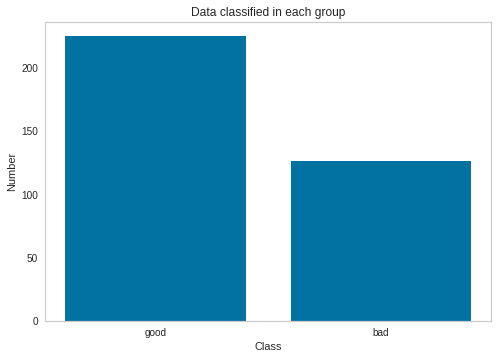

In [ ]:
priors = [num_of_goods, num_of_bads]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x = ['good', 'bad']
plt.bar(x, priors)
plt.xticks(x,x)
plt.title('Data classified in each group')
plt.xlabel('Class')
plt.ylabel('Number')
plt.grid()
plt.show()

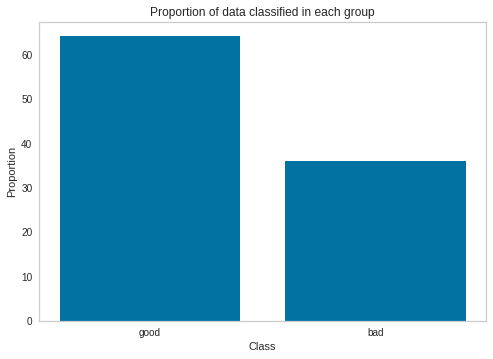

In [ ]:
priors = [100*num_of_goods/351, 100*num_of_bads/351]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x = ['good', 'bad']
plt.bar(x, priors)
plt.xticks(x,x)
plt.title('Proportion of data classified in each group')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.grid()
plt.show()

###Δεδομένα Χ

In [ ]:
feature_list=[]
for i in range(0,351):
  feature_list.append([ float(x) for x in df1.values.tolist()[i][0].split(',') if x!='g' and x!='b'])

feature_names_list = []
for i in range(0,34):
  feature_names_list .append("Feature_"+str(i))

In [ ]:
X_df = pd.DataFrame(feature_list,columns = feature_names_list)
X_df

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33
0,1.0,0.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1.0,0.0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1.0,0.0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1.0,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1.0,0.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,0.0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1.0,0.0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1.0,0.0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1.0,0.0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


Παρακάτω κάνουμε στατιστική ανάλυση των features μέσω της describe() μεθόδου, έχοντας πρώτα αποκλείσει την κλάση από την αναπαράστασή τους.

In [ ]:
X_df.describe()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


>Επομένως παρατηρούμε ότι το feature_1 έχει μέση τιμή και διασπορά ίση με το 0, δηλαδή όλα τα δεδομένα του είναι ίσα με το 0. Επομένως μπορούμε να το απομακρύνουμε καθώς δεν προσθέτει καμία πληροφορία.<br/>
Σε γενικές γραμμές αν η διακύμανση ενός χαρακτηριστικού εισόδου είναι πολύ χαμηλή, δεν μπορεί να προσφέρει σημαντικά στη διαχωριστική ικανότητα του ταξινομητή. Ειδικά στην περίπτωση που η διακύμανση είναι 0, δηλαδή το χαρακτηριστικό έχει σταθερή τιμή για όλα τα δείγματα εκπαίδευσης, δεν χρησιμεύει καθόλου στον ταξινομητή για να αποφασίσει αν ένα δείγμα ανήκει σε μία κλάση ή σε μια άλλη και επιπλέον μπορεί να δυσκολέψει άλλες διαδικασίες της προεπεξεργασίας όπως η κανονικοποίηση των χαρακτηριστικών.<br/>
Γενικά η μεγάλη διαστατικότητα δυσκολεύει τους αλγορίθμους μηχανικής μάθησης, (curse of dimentionality) επομένως τέτοιες "απομακρύνσεις" είναι αρκετά βοηθητικές για το σύστημα.

In [ ]:
X_df.drop(labels="Feature_1",axis=1,inplace=True)
X_df

,Feature_0,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33
0,1.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1.0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1.0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1.0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1.0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1.0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


>Και στην συνέχεια αλλάζουμε τα ονόματα των κολόνων με ένα λεξικό το οποίο αντιστοιχίζει την παλιά ονομασία της κολόνας με την καινούρια

In [ ]:
new_lables_dic = dict()
new_lables_dic.update({"Feature_0": "Feature_0"})
for i in range(2,34):
  old_name = "Feature_"+str(i)
  new_name = "Feature_"+str(i-1)
  new_lables_dic.update({old_name: new_name})

X_df.rename(new_lables_dic,axis=1,inplace=True)
X_df

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32
0,1.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1.0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1.0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1.0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1.0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1.0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


>Παρατηρούμε, επίσης, από το min και max των δεδομένων μας, ότι τα δεδομένα είναι ***κανονικοποιημένα*** επομένως δεν χρειάζεται να κάνουμε κάποια κανονικοποίηση.
Γενικά χαρακτηριστικά με πολύ μεγάλες διαφορές στις απόλυτες τιμές τους μπορούν να προκαλέσουν προβλήματα στην εκπαίδευση και να δώσουν ταξινομητές με μη βέλτιστη απόδοση. Για παράδειγμα, ένα χαρακτηριστικό με πολύ μεγάλες τιμές θα έχει μεγαλύτερη επίδραση στον υπολογισμό της απόστασης στον kNN από ότι ένα με μικρές τιμές, χωρίς αυτό να σημαίνει απαραίτητα ότι είναι περισσότερο καθοριστικό για το διαχωρισμό των κλάσεων.

### split

Στην συνέχεια μετατρέπουμε τα δεδομένα σε μορφή συμβατή ως προς την scikit learn δηλαδή σε τύπο: <class 'numpy.ndarray'>

In [ ]:
X = X_df.values
y = y_df.values.ravel()

Και στην συνέχεια διαχωρίζουμε training και testing (**ερώτημα 8**) δεδομένα σε ποσοστό 80%-20%, όπως μας ζητείται, άρα έχουμε 280 δείγματα στο train set και 71 στο test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=17)

In [ ]:
print("Training feature size {} with type {} and training labels size {} with type {} ".format(X_train.shape, type(X_train), y_train.shape,type(y_train)))

Training feature size (280, 33) with type <class 'numpy.ndarray'> and training labels size (280,) with type <class 'numpy.ndarray'> 


In [ ]:
print("Testing feature size {} with type {} and testing labels size {} with type {} ".format(X_test.shape, type(X_test), y_test.shape,type(y_test)))

Testing feature size (71, 33) with type <class 'numpy.ndarray'> and testing labels size (71,) with type <class 'numpy.ndarray'> 


>Τώρα για να έχουμε μία καλύτερη εικόνα των δεδομένων μας θα τα τυπώσουμε σε ένα 2D επίπεδο. Έτσι θα χρειαστεί να κάνουμε μείωση διαστατικότητας από 33 σε 2. Αυτή η διαδικασία θα γίνει με PC Analysis και θα μας δώσει μια εικόνα για την γεωμετρική κατανομή των δεδομένων.<br/>
Αξίζει να σημειωθεί ότι κανουμε projection  μόνο τα Training δεδομένα, και από δώ και πέρα για να μην εισάγουμε bias στα μοντέλα μας θα αγνοούμε την ύπαρξη των testing δεδομένων. Τα testing δεδομένα θα λαμβάνονται υπόψην μόνο για το evaluation.

The pca shape is: (280, 2)

The first component contains 31.52% of the total information and the second one contains 12.41%
In total the 2 components contains 43.92% of the total information



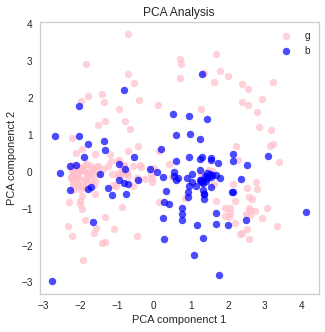

In [ ]:
pca = PCA(n_components=2)
pca_test  = pca.fit_transform(X_train)
print("The pca shape is: {}".format(pca_test.shape))
print()
print("The first component contains {:.2f}% of the total information and the second one contains {:.2f}%".format( (100*pca.explained_variance_ratio_[0]),(100*pca.explained_variance_ratio_[1]) ) )
print("In total the 2 components contains {:.2f}% of the total information".format((100*pca.explained_variance_ratio_[0])+(100*pca.explained_variance_ratio_[1])) )
print()

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel("PCA componenct 1")
ax.set_ylabel("PCA componenct 2")
ax.set_title("PCA Analysis")

classes = ['g','b']
colors = ['pink', 'blue']

for i, color in zip(classes, colors):
  index = np.where(y_train == i)
  first_component = []
  second_component = []
  for i in index[0]:
    first_component.append(pca_test [i][0])
    second_component.append(pca_test [i][1])
  ax.scatter(first_component, second_component, c = color, s = 50,alpha=0.7)
ax.legend(classes)
ax.grid()
fig.savefig('part13b.png')

Μπορούμε να δούμε ότι το PCA μας κρατάει συνολικά περίπου το 44% της συνολικής πληροφορίας και η υπόλοιπη "χανεται" λόγο της μείωσης διαστατικότητας.
Έτσι, μπορούμε να παρατηρήσουμε ότι τα δεδομένα που έχουν κατηγοριοποίηση στην κλάση 'bad' βρίσκονται κυρίως στη μέση.<br/>
Έτσι με αυτή την πολύ απλή ιδέα θα μπορούσαμε να φτιάξουμε έναν πολύ naive classifier ο οποίος θα θεωρεί τα δεδομένα που είναι κοντά στο κέντρο ότι ανήκουν στην κλάση bad ενώ τα υπόλοιπα στην κλάση good. 
Προφανώς ένα τόσο απλοικό μοντέλο δεν θα λειτουγούσε αλλά δείχνει μια απλή προσέγγιση machine learning

Με τον όρο **μη ισορροπημένο** dataset εννοούμε ένα dataset στο οποίο τα πλήθη των δειγμάτων της κάθε κλάσης διαφέρουν σημαντικά μεταξύ τους. Χωρίς να υπάρχει κάποια συνολική απάντηση, όταν ο λόγος μεταξύ του αριθμού των δειγμάτων δύο κλάσεων αρχίζει να είναι μεγαλύτερος από 2:3, μπορούμε να αρχίζουμε να θεωρούμε το dataset μη ισορροπημένο (imbalanced). Στα πραγματικά datasets αυτό είναι κάτι πολύ κοινό. Οι περισσότεροι ταξινομητές ωστόσο εκπαιδεύονται καλύτερα όταν τα δείγματα όλων των κλάσεων είναι σχετικά ισάριθμα.</br>


Έχουμε δύο βασικούς τρόπους για να εξισσοροπούμε ένα dataset, την υποδειγματοληψία (undersampling) και την υπερδειγματοληψία (oversampling). Εν ολίγοις, στο undersampling απλά αφαιρούμε τυχαία δείγματα από όλες τις κατηγορίες που έχουν μεγαλύτερο πλήθος από τη μικρότερη, ενώ στο oversampling επιλέγουμε τυχαία ορισμένα παραδείγματα από τις λιγότερο συχνές κατηγορίες και τα επαναλαμβάνουμε. Στην πρώτη δηλαδή αφαιρούμε δεδομένα ενώ στην άλλη προσθέτουμε. 

Γενικά το oversampling ενδείκνυται περισσότερο, αφού δεν χάνουμε δεδομένα εκπαίδευσης. Επίσης, σε κάποιους αλγορίθμους όπως πχ. random forests, έχει παρατηρηθεί ότι τα αποτελέσματα βελτιώνονται ακόμα και με oversampling με παράγοντες άνω του 2, δηλαδή αντιγράφοντας τα ίδια δεδομένα μπορεί να βοηθάμε τη σύγκλιση. Τα προηγούμενα βέβαια δεν παρατηρούνται σε όλες τις περιπτώσεις.

Ο λόγος αυτός για το dataset μας είναι ο εξής:

In [ ]:
num_of_good= len(np.where(y_train == 'g')[0])
num_of_bad= len(np.where(y_train == 'b')[0])

print("Num of goods in training set = {}".format(num_of_good))
print("Num of bads in training set = {}".format(num_of_bad))
print("Num_of_bad/Num_of_good = {}".format(num_of_bad/num_of_good))

Num of goods in training set = 179
Num of bads in training set = 101
Num_of_bad/Num_of_good = 0.5642458100558659


>Προσοχή! Την ενέργεια αυτή την επιτελούμε μόνο στα δεδομένα εκπαίδευσης και όχι στα δεδομένα testing, για να έχουμε ένα αντικειμενικό μέτρο της επίδοσης του μοντέλου μας.

Έχοντας αναλύσει τα ερωτήματα και παραπάνω, τα συγκεντρώνουμε περιληπτικά εδώ:


1.   Οι πληροφορίες για το data set δίνονται στην παράγραφο **Πληροφορίες Ionoshere DataSet**
2.  Το πλήθος των δειγμάτων είναι 351 και ο αριθμός των χαρακτηριστικών 34. Είναι συνεχή αριθμητικά χαρακτηριστικά και το μόνο μη διατεταγμένο στοιχείο είναι ο τύπος της κλάσης.
3.  Δεν υπάρχει ούτε επικεφαλίδα, ούτε αρίθμηση γραμμών στα χαρακτηριστικά.
4.  Οι ετικέτες των κλάσεων είναι b και g (για τα bad και good δεδομένα) και βρίσκονται στην 35 κολόνα(το index της, έχοντας αρίθμηση από το 0, είναι το 34).
5.  Διαβάσαμε το αρχείο σε μορφή csv, χωρίσαμε τα χαρακτηριστικά σε κολόνες, ονοματοδοτώντας την κάθε κολόνα που αντιστοιχεί σε κάθε χαρακτηριστικό.
6.  Από την παραπάνω ανάλυση παρατηρήσαμε ότι δεν υπάρχουν απουσιάζουσες τιμές στο συγκεκριμένο data set
7.  Ο αριμός των κλάσεων είναι 2 και το ποσοτό των good είναι 64.103 και των bad 35.897.Θεωρώντας ως μη ισορροπημένο ένα dataset στο οποίο η μια κλάση είναι 1.5 φορά πιο συχνή από την άλλη (δηλαδή 60-40 αναλογία) προκύπτει ότι το εν λόγω data set είναι μη ισορροπημένο.
8.  Στο κομμάτι **split**, χωρίσαμε το data set σε training και testing δεδομένα, με αναλογία 80-20%, δηλαδή 280 δεδομένα για training και 71 για testing.



#Βημα 2:Ταξινόμηση

Στο βήμα αυτό, θα εξετάσουμε τους ταξιμομητές dummy(uniform, constant, stratified, most_frequent), Gaussian Naive Bayes και KNN και θα αξιολογήσουμε την απόδοσή τους με τη βοήθεια των μετρικών f1_micro και f1_macro, με απλή αρχικοποίηση, χωρίς να κάνουμε βελτιστοποίηση.

>**Confusion Matrix**<br> H βάση για τις μετρικές απόδοσης των ταξινομητών είναι ο πίνακας σύγχυσης (confusion matrix) και δείχνει αν ο εκάστοτε ταξινομητής "συγχέει" τις κλάσεις του dataset(εδώ ο πίνακας αυτός είναι τετραγωνικός αφού έχουμε binary classification). Κάθε στήλη του πίνακα σύγχυσης αναπαριστά τα δείγματα που προβλέφθηκε ότι ανήκουν στη συγκεκριμένη κλάση, ενώ κάθε γραμμή, αυτά που όντως ανήκουν στην κλάση αυτή. Επομένως, το στοιχείο $C_{i,j}$ είναι ίσο με τα δείγματα που ανήκουν στην κατηγορία i, ενώ προβλέφθηκε ότι ανήκουν στην κατηγορία j. Αν το $i \neq j$, τα πλήθος αυτών των στοιχείων έχει ταξινομηθεί λανθασμένα, ενώ αν $i = j$ (κύρια διαγώνιος) τα δείγματα αυτά έχουν ταξινομηθεί σωστά (ταξινομήθηκαν στην κλάση i και όντως ανήκουν σε αυτή). <i>

>Αξίζει να αναφέρουμε ότι ο ορισμός του confusion matrix της wikipedia με αυτόν του scikit-learn δεν συμπίπτει, γεγονός που καθιστά εύκολη την πραγματοποίηση σοβαρού λάθους<i/>.

>Η παρακάτω συνάρτηση είναι υπεύθυνη για την γραφική απεικόνισή του και οι ταξινομητές που εξετάζουμε την καλούν για να αξιολογήσουν το κατά πόσο επετεύχθηκε η ορθή ταξινόμηση του test set χρησιμοποιώντας τον εκάστοτε ταξινομητή.

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Predicted label')
    plt.xlabel('True label')
    plt.tight_layout()  
    plt.show()

Παράλληλα αναφέρουμε ότι το f1 score, σύμφωνα με το οποίο μας ζητείται να αξιολογήσουμε τους ταξινομητές, ορίζεται ως ο αρμονικός μέσος των γνωστών μας μετρικών Precision(P) και Recall(R) μεταξύ των οποίων υπάρχει συχνά trade-off:$$F1 = 2\frac{P \times R}{P+R}$$
To f1 score επιτυγχάνει να σταθμίζει κατά μία έννοια το precision και το recall μεταξύ των οποίων υπάρχει συνήθως ένα trade-off. Αναφέρουμε για πληρότητα, ότι εδώ, το precision, σύμφωνα με τον τρόπο που έχουμε κατασκευάσει το confusion matrix, μέτράει πόσα από τα δείγματα που ταξινομήσαμε ως bad, άνηκαν όντως σε αυτή την κλάση και το recall πόσα από τα δείγματα που ανήκουν στην κλάση bad, ταξινομήθηκαν ως bad από τον classifier(θεωρώντας ως Positive την κλάση bad).

##Dummy Classifiers


Αρχικά εξετάζουμε τους dummy classifiers με χρήση της κλάσης DummyClassifier, η οποία δέχεται μια παράμετρο που καθορίζει την τακτική της ταξινόμησης ως εξής:

 *   "uniform”: προβλέπει τυχαία και ομοιόμορφα
 *   “constant”: προβλέπει πάντα μία κατηγορία που τη διαλέγει ο χρήστης
 *   “most_frequent”: προβλέπει πάντα την πιο συχνή κατηγορία στο training set
 *   “stratified”: κάνει προβλέψεις διατηρώντας την κατανομή των κλάσεων στο training set

Για τους ταξινομητές αυτούς, δε θα κάνουμε εκτενή ανάλυση των βημάτων και των αριθμητικών και γραφικών αποτελεσμάτων που παράγουν, καθώς σε κάθε run τα outputs των uniform και stratified αλλάζουν. 

###Dummy Uniform

Εξετάζουμε, αρχικά, τον dummy stratified. Αρχικά, "εκπαιδεύουμε" τον ταξινομητή στο σύνολο εκπαίδευσης μέσω της fit και με τη μέθοδο predict παράγουμε προβλέψεις για τα δεδομένα ελέγχου(test set) και τις εκτυπώνουμε.

In [ ]:
clf = DummyClassifier(strategy="uniform")
clf.fit(X_train, y_train)
dc_uniform_predict = clf.predict(X_test)
print("Predictions for Dummy uniform Classifier:"+"\n"+" {}".format(dc_uniform_predict))

Predictions for Dummy uniform Classifier:
 ['g' 'b' 'g' 'b' 'b' 'b' 'b' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'b' 'b' 'g'
 'g' 'b' 'b' 'b' 'b' 'g' 'g' 'b' 'b' 'g' 'b' 'g' 'g' 'g' 'b' 'b' 'b' 'b'
 'b' 'b' 'g' 'b' 'g' 'b' 'g' 'g' 'b' 'g' 'g' 'b' 'b' 'g' 'b' 'g' 'g' 'g'
 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'b' 'b' 'b' 'b' 'b' 'b']


Δημιουργούμε τον πίνακα σύγχησης και καλούμε τη συνάρτηση που δημιουργήσαμε για τη γραφική απεικόνισή του.


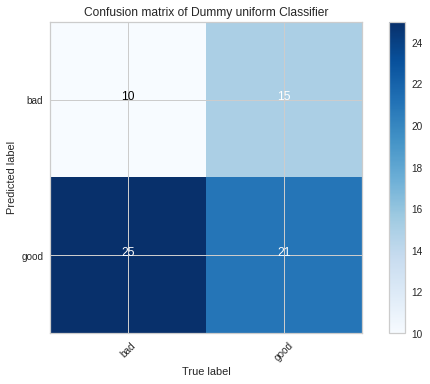

In [ ]:
cm = confusion_matrix(y_test, dc_uniform_predict)
plot_confusion_matrix(cm, ['bad', 'good'],title='Confusion matrix of Dummy uniform Classifier')

In [ ]:
clf.predict(X_test)
cnt=0
for i,val in enumerate(dc_uniform_predict):
  if (val=='g'):
    cnt+=1
print(cnt)

36


Παρακάτω, εφαρμόζουμε τις μετρικές απόδοσης του ταξινομητή.

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, dc_uniform_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_dc_uniform = list(precision_recall_fscore_support(y_test, dc_uniform_predict, average='micro'))
micro_dc_uniform.pop(3) # tou support
precision_micro_dc_uniform = micro_dc_uniform[0]
recall_micro_dc_uniform = micro_dc_uniform[1]
f1_micro_dc_uniform = micro_dc_uniform[2]
print(micro_dc_uniform)

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_dc_uniform = list(precision_recall_fscore_support(y_test, dc_uniform_predict, average='macro'))
macro_dc_uniform.pop(3) # tou support
precision_macro_dc_uniform = macro_dc_uniform[0]
recall_macro_dc_uniform = macro_dc_uniform[1]
f1_macro_dc_uniform = macro_dc_uniform[2]
print(macro_dc_uniform)
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test,dc_uniform_predict, target_names=['bad', 'good'] ,output_dict=True)
print(pd.DataFrame(class_report).T)


(array([0.28571429, 0.58333333]), array([0.4       , 0.45652174]), array([0.33333333, 0.51219512]), array([25, 46])) 

[0.43661971830985913, 0.43661971830985913, 0.43661971830985913]
[0.43452380952380953, 0.42826086956521736, 0.4227642276422764]

All the details shown here:

              precision    recall  f1-score   support
bad            0.285714  0.400000  0.333333  25.00000
good           0.583333  0.456522  0.512195  46.00000
accuracy       0.436620  0.436620  0.436620   0.43662
macro avg      0.434524  0.428261  0.422764  71.00000
weighted avg   0.478538  0.436620  0.449216  71.00000


Η αξιολόγηση του ταξινομητή γίνεται μέσω του f1_micro και f1_macro

In [ ]:
print("Dummy uniform Classifier f1_micro score = {}".format(f1_micro_dc_uniform))
print("Dummy uniform Classifier  f1_macro score = {}".format(f1_macro_dc_uniform))

Dummy uniform Classifier f1_micro score = 0.43661971830985913
Dummy uniform Classifier  f1_macro score = 0.4227642276422764


Παρακάτω φαίνεται η οπτικοποίηση όλων των μετρικών που τυπώσαμε προηγουμένως, σε heatmap.

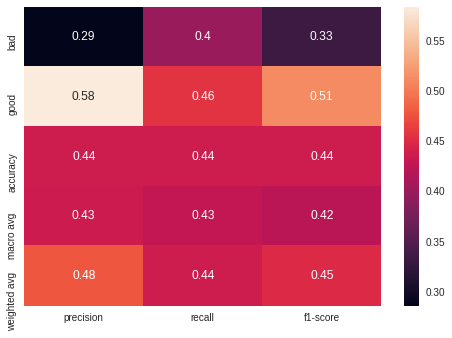

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

###Dummy Constant b

Dummy Constant b: Αρχικά, "εκπαιδεύουμε" τον ταξινομητή στο σύνολο εκπαίδευσης μέσω της fit και με τη μέθοδο predict παράγουμε προβλέψεις για τα δεδομένα ελέγχου(test set) και τις εκτυπώνουμε.


In [ ]:
clf = DummyClassifier(strategy="constant", constant = 'b')
clf.fit(X_train, y_train)
dc_constant_b_predict = clf.predict(X_test)
print("Predictions for Dummy constant_b Classifier:"+"\n"+" {}".format(dc_constant_b_predict))

Predictions for Dummy constant_b Classifier:
 ['b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b'
 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b'
 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b'
 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b']


Δημιουργούμε τον πίνακα σύγχησης και καλούμε τη συνάρτηση που δημιουργήσαμε για τη γραφική απεικόνισή του. 

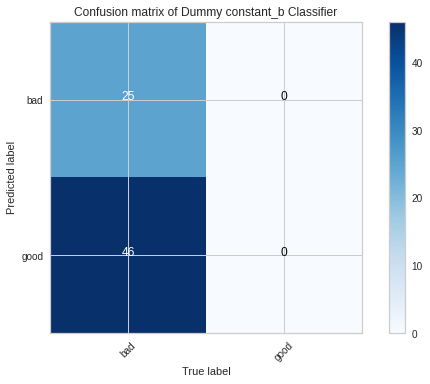

In [ ]:
cm = confusion_matrix(y_test, dc_constant_b_predict)
plot_confusion_matrix(cm, ['bad', 'good'],title='Confusion matrix of Dummy constant_b Classifier')

In [ ]:
clf.predict(X_test)
cnt=0
for i,val in enumerate(dc_constant_b_predict):
  if (val=='g'):
    cnt+=1
print(cnt)

0


Παρακάτω, εφαρμόζουμε τις μετρικές απόδοσης του ταξινομητή.

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, dc_constant_b_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_dc_constant_b = list(precision_recall_fscore_support(y_test, dc_constant_b_predict, average='micro'))
micro_dc_constant_b.pop(3) # tou support
precision_micro_dc_constant_b = micro_dc_constant_b[0]
recall_micro_dc_constant_b = micro_dc_constant_b[1]
f1_micro_dc_constant_b = micro_dc_constant_b[2]
print(micro_dc_constant_b)

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_dc_constant_b = list(precision_recall_fscore_support(y_test, dc_constant_b_predict, average='macro'))
macro_dc_constant_b.pop(3) # tou support
precision_macro_dc_constant_b = macro_dc_constant_b[0]
recall_macro_dc_constant_b = macro_dc_constant_b[1]
f1_macro_dc_constant_b = macro_dc_constant_b[2]
print(macro_dc_constant_b)
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test,  dc_constant_b_predict, target_names=['bad','good'] ,output_dict=True)
print(pd.DataFrame(class_report).T)

(array([0.35211268, 0.        ]), array([1., 0.]), array([0.52083333, 0.        ]), array([25, 46])) 

[0.352112676056338, 0.352112676056338, 0.352112676056338]
[0.176056338028169, 0.5, 0.26041666666666663]

All the details shown here:

              precision    recall  f1-score    support
bad            0.352113  1.000000  0.520833  25.000000
good           0.000000  0.000000  0.000000  46.000000
accuracy       0.352113  0.352113  0.352113   0.352113
macro avg      0.176056  0.500000  0.260417  71.000000
weighted avg   0.123983  0.352113  0.183392  71.000000


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Η αξιολόγηση του ταξινομητή γίνεται μέσω του f1_micro και f1_macro

In [ ]:
print("Dummy constant_b Classifier f1_micro score = {}".format(f1_micro_dc_constant_b))
print("Dummy constant_b Classifier  f1_macro score = {}".format(f1_macro_dc_constant_b))

Dummy constant_b Classifier f1_micro score = 0.352112676056338
Dummy constant_b Classifier  f1_macro score = 0.26041666666666663


Παρακάτω φαίνεται η οπτικοποίηση όλων των μετρικών που τυπώσαμε προηγουμένως, σε heatmap.

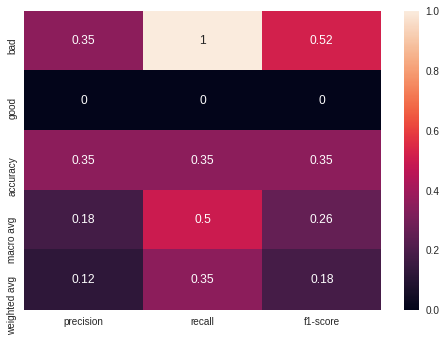

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

###Dummy Constant g

Dummy Constant g: Αρχικά, "εκπαιδεύουμε" τον ταξινομητή στο σύνολο εκπαίδευσης μέσω της fit και με τη μέθοδο predict παράγουμε προβλέψεις για τα δεδομένα ελέγχου(test set) και τις εκτυπώνουμε.


In [ ]:
clf = DummyClassifier(strategy="constant", constant = 'g')
clf.fit(X_train, y_train)
dc_constant_g_predict = clf.predict(X_test)
print("Predictions for Dummy constant_g Classifier:"+"\n"+" {}".format(dc_constant_g_predict))

Predictions for Dummy constant_g Classifier:
 ['g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g'
 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g'
 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g'
 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g']


Δημιουργούμε τον πίνακα σύγχησης και καλούμε τη συνάρτηση που δημιουργήσαμε για τη γραφική απεικόνισή του. 

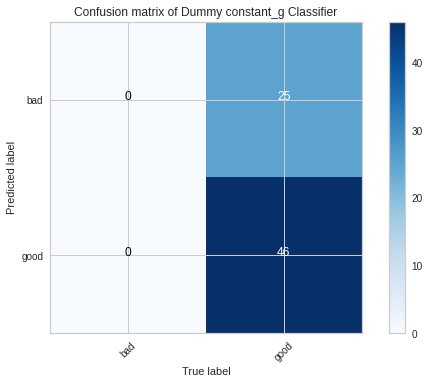

In [ ]:
cm = confusion_matrix(y_test, dc_constant_g_predict)
plot_confusion_matrix(cm, ['bad', 'good'],title='Confusion matrix of Dummy constant_g Classifier')

In [ ]:
clf.predict(X_test)
cnt=0
for i,val in enumerate(dc_constant_g_predict):
  if (val=='g'):
    cnt+=1
print(cnt)

71


Παρακάτω, εφαρμόζουμε τις μετρικές απόδοσης του ταξινομητή.

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, dc_constant_g_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_dc_constant_g = list(precision_recall_fscore_support(y_test, dc_constant_g_predict, average='micro'))
micro_dc_constant_g.pop(3) # tou support
precision_micro_dc_constant_g = micro_dc_constant_g[0]
recall_micro_dc_constant_g = micro_dc_constant_g[1]
f1_micro_dc_constant_g = micro_dc_constant_g[2]
print(micro_dc_constant_g)

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_dc_constant_g = list(precision_recall_fscore_support(y_test, dc_constant_g_predict, average='macro'))
macro_dc_constant_g.pop(3) # tou support
precision_macro_dc_constant_g = macro_dc_constant_g[0]
recall_macro_dc_constant_g = macro_dc_constant_g[1]
f1_macro_dc_constant_g = macro_dc_constant_g[2]
print(macro_dc_constant_g)
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test,  dc_constant_g_predict, target_names=['bad','good'] ,output_dict=True)
print(pd.DataFrame(class_report).T)

(array([0.        , 0.64788732]), array([0., 1.]), array([0.        , 0.78632479]), array([25, 46])) 

[0.647887323943662, 0.647887323943662, 0.647887323943662]
[0.323943661971831, 0.5, 0.39316239316239315]

All the details shown here:

              precision    recall  f1-score    support
bad            0.000000  0.000000  0.000000  25.000000
good           0.647887  1.000000  0.786325  46.000000
accuracy       0.647887  0.647887  0.647887   0.647887
macro avg      0.323944  0.500000  0.393162  71.000000
weighted avg   0.419758  0.647887  0.509450  71.000000


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Η αξιολόγηση του ταξινομητή γίνεται μέσω του f1_micro και f1_macro

In [ ]:
print("Dummy constant_g Classifier f1_micro score = {}".format(f1_micro_dc_constant_g))
print("Dummy constant_g Classifier  f1_macro score = {}".format(f1_macro_dc_constant_g))

Dummy constant_g Classifier f1_micro score = 0.647887323943662
Dummy constant_g Classifier  f1_macro score = 0.39316239316239315


Παρακάτω φαίνεται η οπτικοποίηση όλων των μετρικών που τυπώσαμε προηγουμένως, σε heatmap.

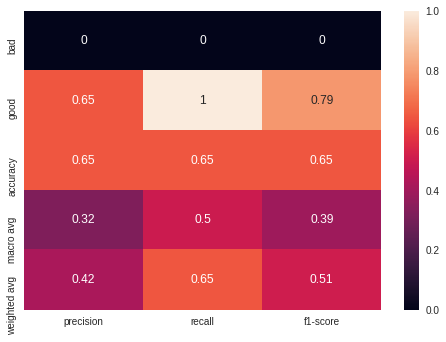

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

###Dummy Most Frequent

Dummy Most Frequent: Αρχικά, "εκπαιδεύουμε" τον ταξινομητή στο σύνολο εκπαίδευσης μέσω της fit και με τη μέθοδο predict παράγουμε προβλέψεις για τα δεδομένα ελέγχου(test set) και τις εκτυπώνουμε.


In [ ]:
clf = DummyClassifier(strategy="most_frequent")
clf.fit(X_train, y_train)
dc_most_frequent_predict = clf.predict(X_test)
print("Predictions for Dummy most_frequent Classifier:"+"\n"+" {}".format(dc_most_frequent_predict))

Predictions for Dummy most_frequent Classifier:
 ['g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g'
 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g'
 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g'
 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g']


Δημιουργούμε τον πίνακα σύγχησης και καλούμε τη συνάρτηση που δημιουργήσαμε για τη γραφική απεικόνισή του. 

0 25 0 46


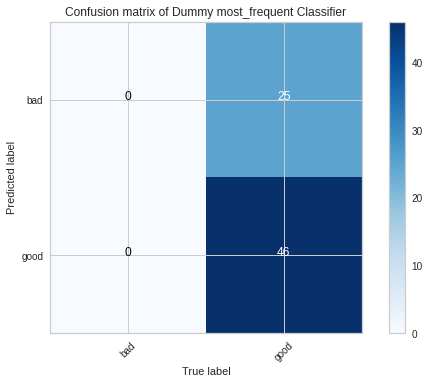

In [ ]:
cm = confusion_matrix(y_test, dc_most_frequent_predict)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
plot_confusion_matrix(cm, ['bad', 'good'],title='Confusion matrix of Dummy most_frequent Classifier')

In [ ]:
clf.predict(X_test)
cnt=0
for i,val in enumerate(dc_most_frequent_predict):
  if (val=='g'):
    cnt+=1
print(cnt)

71


Παρακάτω, εφαρμόζουμε τις μετρικές απόδοσης του ταξινομητή.

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, dc_most_frequent_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_dc_most_frequent = list(precision_recall_fscore_support(y_test, dc_most_frequent_predict, average='micro'))
micro_dc_most_frequent.pop(3) # tou support
precision_micro_dc_most_frequent = micro_dc_most_frequent[0]
recall_micro_dc_most_frequent = micro_dc_most_frequent[1]
f1_micro_dc_most_frequent = micro_dc_most_frequent[2]
print(micro_dc_most_frequent)

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_dc_most_frequent = list(precision_recall_fscore_support(y_test, dc_most_frequent_predict, average='macro'))
macro_dc_most_frequent = list(precision_recall_fscore_support(y_test, dc_most_frequent_predict, average='macro'))
macro_dc_most_frequent.pop(3) # tou support
precision_macro_dc_most_frequent = macro_dc_most_frequent[0]
recall_macro_dc_most_frequent = macro_dc_most_frequent[1]
f1_macro_dc_most_frequent = macro_dc_most_frequent[2]
print(macro_dc_most_frequent)
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test,  dc_most_frequent_predict, target_names=['bad','good'] ,output_dict=True)
print(pd.DataFrame(class_report).T)

(array([0.        , 0.64788732]), array([0., 1.]), array([0.        , 0.78632479]), array([25, 46])) 

[0.647887323943662, 0.647887323943662, 0.647887323943662]
[0.323943661971831, 0.5, 0.39316239316239315]

All the details shown here:

              precision    recall  f1-score    support
bad            0.000000  0.000000  0.000000  25.000000
good           0.647887  1.000000  0.786325  46.000000
accuracy       0.647887  0.647887  0.647887   0.647887
macro avg      0.323944  0.500000  0.393162  71.000000
weighted avg   0.419758  0.647887  0.509450  71.000000


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Η αξιολόγηση του ταξινομητή γίνεται μέσω του f1_micro και f1_macro

In [ ]:
print("Dummy most_frequent Classifier f1_micro score = {}".format(f1_micro_dc_most_frequent))
print("Dummy most_frequent Classifier  f1_macro score = {}".format(f1_macro_dc_most_frequent))

Dummy most_frequent Classifier f1_micro score = 0.647887323943662
Dummy most_frequent Classifier  f1_macro score = 0.39316239316239315


Παρακάτω φαίνεται η οπτικοποίηση όλων των μετρικών που τυπώσαμε προηγουμένως, σε heatmap.

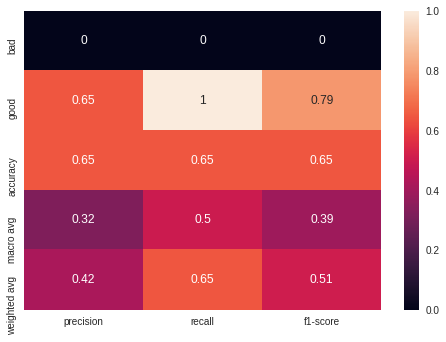

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

Προφανώς εδώ ο most_frequent ταξινομητής ισοδυναμεί με τον constant_g αφού στο data set η πλειοψηφία των διγμάτων είναι good και όταν κάνουμε split τα δεδομένα, η αναλογία αυτή διατηρείται τόσο σε train, όσο και σε test data

###Dummy Stratified


Τέλος, εξετάζουμε τον dummy stratified. Αρχικά, "εκπαιδεύουμε" τον ταξινομητή στο σύνολο εκπαίδευσης μέσω της fit και με τη μέθοδο predict παράγουμε προβλέψεις για τα δεδομένα ελέγχου(test set) και τις εκτυπώνουμε.


In [ ]:
clf = DummyClassifier(strategy="stratified")
clf.fit(X_train, y_train)
dc_stratified_predict = clf.predict(X_test)
print("Predictions for Dummy stratified Classifier:"+"\n"+" {}".format(dc_stratified_predict))

Predictions for Dummy stratified Classifier:
 ['b' 'g' 'b' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g'
 'g' 'g' 'b' 'g' 'g' 'b' 'g' 'b' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'g'
 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'b' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'b'
 'g' 'b' 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'b' 'g' 'b' 'g' 'g' 'g']


Δημιουργούμε τον πίνακα σύγχησης και καλούμε τη συνάρτηση που δημιουργήσαμε για τη γραφική απεικόνισή του. 

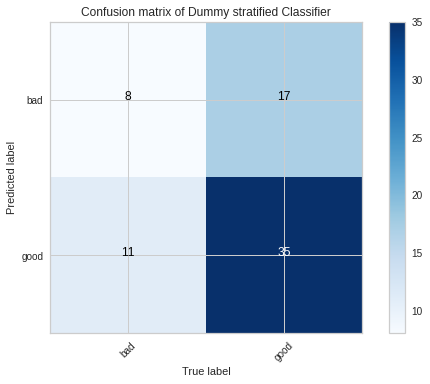

In [ ]:
cm = confusion_matrix(y_test, dc_stratified_predict)
plot_confusion_matrix(cm, ['bad', 'good'],title='Confusion matrix of Dummy stratified Classifier')

In [ ]:
clf.predict(X_test)
cnt=0
for i,val in enumerate(dc_stratified_predict):
  if (val=='g'):
    cnt+=1
print(cnt)

52


Παρακάτω, εφαρμόζουμε τις μετρικές απόδοσης του ταξινομητή.

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, dc_stratified_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_dc_stratified = list(precision_recall_fscore_support(y_test, dc_stratified_predict, average='micro'))
micro_dc_stratified.pop(3) # tou support
precision_micro_dc_stratified = micro_dc_stratified[0]
recall_micro_dc_stratified = micro_dc_stratified[1]
f1_micro_dc_stratified = micro_dc_stratified[2]
print(micro_dc_stratified)

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_dc_stratified = list(precision_recall_fscore_support(y_test, dc_stratified_predict, average='macro'))
macro_dc_stratified.pop(3) # tou support
precision_macro_dc_stratified = macro_dc_stratified[0]
recall_macro_dc_stratified = macro_dc_stratified[1]
f1_macro_dc_stratified = macro_dc_stratified[2]
print(macro_dc_stratified)
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test,  dc_stratified_predict, target_names=['bad','good'] ,output_dict=True)
print(pd.DataFrame(class_report).T)

(array([0.42105263, 0.67307692]), array([0.32      , 0.76086957]), array([0.36363636, 0.71428571]), array([25, 46])) 

[0.6056338028169014, 0.6056338028169014, 0.6056338028169014]
[0.5470647773279352, 0.5404347826086957, 0.538961038961039]

All the details shown here:

              precision    recall  f1-score    support
bad            0.421053  0.320000  0.363636  25.000000
good           0.673077  0.760870  0.714286  46.000000
accuracy       0.605634  0.605634  0.605634   0.605634
macro avg      0.547065  0.540435  0.538961  71.000000
weighted avg   0.584336  0.605634  0.590818  71.000000


Η αξιολόγηση του ταξινομητή γίνεται μέσω του f1_micro και f1_macro

In [ ]:
print("Dummy stratified Classifier f1_micro score = {}".format(f1_micro_dc_stratified))
print("Dummy stratified Classifier  f1_macro score = {}".format(f1_macro_dc_stratified))

Dummy stratified Classifier f1_micro score = 0.6056338028169014
Dummy stratified Classifier  f1_macro score = 0.538961038961039


Παρακάτω φαίνεται η οπτικοποίηση όλων των μετρικών που τυπώσαμε προηγουμένως, σε heatmap.

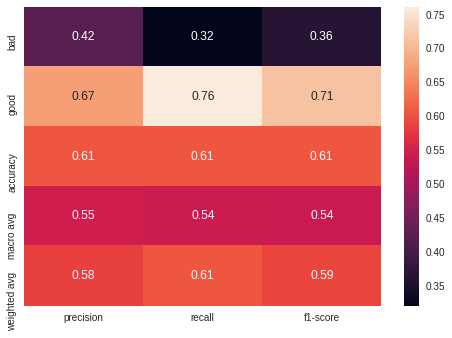

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

##Gaussian Naive Bayes

>Ο Gaussian Naive Bayes ταξινομητής στηρίζεται στο νόμο του Bayes και στην υπόθεση ότι τα χαρακτηριστικά των δεδομένων είναι ανεξάρτητα μεταξύ τους. Ταξινομεί, κάθε δεδομένο στην κλάση y σύμφωνα με τον εξής τύπο: $$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y)$$ δηλαδή κάθε δείγμα ταξινομείται στην κλάση που μεγιστοποιεί τη σχετική συχνότητα της κλάσης αυτής επί το γινόμενο των πιθανοτήτων όλων των χαρακτηριστικών, δεδομένης της κλάσης αυτής(πιθανοφάνεια).

>Θεωρούμε ότι η κατανομή κάθε χαρακτηριστικού ως προς κάθε κλάση ακολουθεί την κανονική κατανομή:
$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$

>Πρακτικά, όσο πιο κοντά στη μέση τιμή του (ως προς το σύνολο του train set)είναι ένα χαρακτηριστικό ενός δείγματος, τόσο πιο κοντά στη μοναδα θα είναι η πιθανοφάνεια του χαρακτηριστικού.

>Τον ταξινομητή αυτόν, θα τον αναλύσουμε περισσότερο ως προς τα αριθμητικά αποτελέσματα που παράγει, καθώς λόγω της κατασκευής του και της συμπεριφοράς του, εξάγει τα ίδια αποτελέσματα σε κάθε ταξινόμηση(κάθε run του κώδικα) που πραγματοποιεί πάνω σε συγκεκριμένο test set, δεδομένου ενός συγκεκριμένου training set. 

Αρχικά, "εκπαιδεύουμε" τον ταξινομητή στο σύνολο εκπαίδευσης μέσω της fit και με τη μέθοδο predict παράγουμε προβλέψεις για τα δεδομένα ελέγχου(test set) και τις εκτυπώνουμε.

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
GaussianNB_predict = clf.predict(X_test)
print("Predictions for KNN classifier:"+"\n"+" {}".format(GaussianNB_predict))

Predictions for KNN classifier:
 ['g' 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'b'
 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'b' 'g' 'g' 'b' 'g' 'g' 'b' 'b' 'b'
 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'b' 'g' 'b' 'g' 'g' 'b' 'g'
 'g' 'b' 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'b' 'b' 'g' 'g' 'g' 'b']


Δημιουργούμε τον πίνακα σύγχησης και καλούμε τη συνάρτηση που δημιουργήσαμε για τη γραφική απεικόνισή του. Από την παρακάτω αναπαράσταση προκύπτει ότι από τα 71 δείγματα του test set, τα 20+44 = 64 ταξινομήθηκαν σωστά (20 ταξινομήθηκαν ως bad και ανήκαν όντως στην κλάση bad, σύμφωνα με το label τους και 44 ταξινομήθηκαν ως good και όντως ανήκαν σε αυτή την κλάση). Τα υπόλοιπα 7 ταξινομήθηκαν λανθασμένα από τον gaussian NB και συγκεκριμένα 2 ανήκαν στην κλάση good και ταξινομήθηκαν ως bad, ενώ 5 ταξινομήθηκαν ως good και ανήκαν στην κλάση bad.

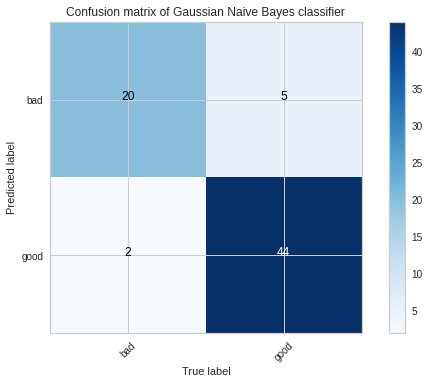

In [ ]:
cm = confusion_matrix(y_test, GaussianNB_predict)
plot_confusion_matrix(cm, ['bad', 'good'],title='Confusion matrix of Gaussian Naive Bayes classifier')

In [ ]:
clf.predict(X_test)
cnt=0
for i,val in enumerate(GaussianNB_predict):
  if (val=='g'):
    cnt+=1
print(cnt)

49


Παρακάτω, εφαρμόζουμε τις μετρικές απόδοσης του ταξινομητή.

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, GaussianNB_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_GNB = list(precision_recall_fscore_support(y_test, GaussianNB_predict, average='micro'))
micro_GNB.pop(3) # tou support
precision_micro_GNB = micro_GNB[0]
recall_micro_GNB = micro_GNB[1]
f1_micro_GNB = micro_GNB[2]
print(micro_GNB)

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_GNB = list(precision_recall_fscore_support(y_test, GaussianNB_predict, average='macro'))
macro_GNB.pop(3) # tou support
precision_macro_GNB = macro_GNB[0]
recall_macro_GNB = macro_GNB[1]
f1_macro_GNB = macro_GNB[2]
print(macro_GNB)
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test,GaussianNB_predict, target_names=['bad','good'] ,output_dict=True)
print(pd.DataFrame(class_report).T)

(array([0.90909091, 0.89795918]), array([0.8       , 0.95652174]), array([0.85106383, 0.92631579]), array([25, 46])) 

[0.9014084507042254, 0.9014084507042254, 0.9014084507042254]
[0.9035250463821892, 0.8782608695652174, 0.8886898096304592]

All the details shown here:

              precision    recall  f1-score    support
bad            0.909091  0.800000  0.851064  25.000000
good           0.897959  0.956522  0.926316  46.000000
accuracy       0.901408  0.901408  0.901408   0.901408
macro avg      0.903525  0.878261  0.888690  71.000000
weighted avg   0.901879  0.901408  0.899819  71.000000


Η αξιολόγηση του Gaussian Naive Bayes (όπως και κάθε άλλου ταξινομητή στην παρούσα άσκηση) γίνεται μέσω των μετρικών f1_micro και f1_macro. Παρατηρούμε ότι δεν είναι ίσα καθώς οι κλάσεις δεν είναι ισορροπημένες.

Αξίζει, για ένα τουλάχιστον παράδειγμα ταξινομητή, να δείξουμε αναλυτικά πώς προκύπτουν οι παρακάτω τιμές.

Από τον παραπάνω πίνακα σύγχυσης έχουμε για κάθε κλάση:


*   Bad: 20 TP και 2 FP και 5 FN
*   Good: 44 TP και 5 FP και 2 FN


οπότε έχουμε 


*   $P_{Bad}=\frac{20}{20+2} = 0.91$
*   $R_{Bad}=\frac{20}{20+5} = 0.80$ 
*   $P_{Good}=\frac{44}{44+5} = 0.90$
*   $R_{Good}=\frac{44}{44+2} = 0.96$.

Οπότε για **macro_average** έχουμε:
$P = \frac{0.91+0.9}{2} = 0.905$  και $R = \frac{0.80+0.96}{2} = 0.88$ άρα το  $f1_{macro} = 2\frac{P \times R}{P+R} = 0.89$

Αντίστοιχα, για το **micro_average** έχουμε: $P = \frac{20+44}{20+44+2+7} = 0.90$ και  $R = \frac{20+44}{20+44+2+7} = 0.90$, άρα και το $f1_{micro} = 2\frac{P \times R}{P+R} = 0.90$.

*Οι αποκλίσεις οφείλονται στις στρογγυλοποιήσεις*


In [ ]:
print("Gaussian Naive Bayes classifier f1_micro score = {}".format(f1_micro_GNB))
print("Gaussian Naive Bayes classifier f1_macro score = {}".format(f1_macro_GNB))

Gaussian Naive Bayes classifier f1_micro score = 0.9014084507042254
Gaussian Naive Bayes classifier f1_macro score = 0.8886898096304592


Παρακάτω φαίνεται η οπτικοποίηση όλων των μετρικών που τυπώσαμε προηγουμένως, σε heatmap.

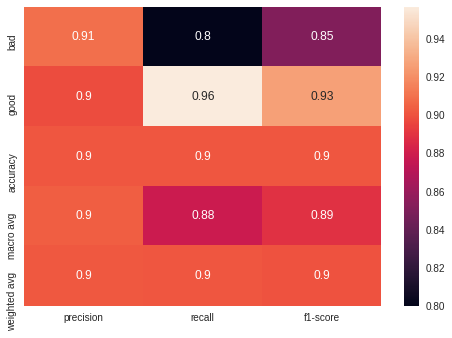

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

##KNN 


>O kNN είναι ένας μη παραμετρικός ταξινομητής βασισμένος σε παραδείγματα (instance-based). Η αρχή λειτουργίας του είναι πολύ απλή. Για ένα νέο δείγμα προς ταξινόμηση, πρώτα υπολογίζουμε τους k πλησιέστερους γείτονές του (στον ν-διάστατο χώρο των χαρακτηριστικών εισόδου) με βάση κάποια συνάρτηση απόστασης, συνήθως ευκλείδεια
$$d(x, x') = \sqrt{\left(x_1 - x'_1 \right)^2 + \left(x_2 - x'_2 \right)^2 + \dotsc + \left(x_n - x'_n \right)^2}$$
Η κλάση του νέου δείγματος θα είναι η κλάση της πλειοψηφίας των k γειτόνων, είτε απλά υπολογισμένη (άθροισμα) είτε (αντίστροφα) ζυγισμένη με βάση την απόσταση του κάθε γείτονα.

>Ο KNN είναι απαιτητικός σε χρόνο και σε χώρο καθώς για να ταξινομήσουμε ένα νέο δείγμα στη φάση test,  πρέπει να συγκρίνουμε την απόστασή του με κάθε δείγμα του train set, τα οποία πρέπει να είναι αποθηκευμένα.

Αρχικά, "εκπαιδεύουμε" τον ταξινομητή στο σύνολο εκπαίδευσης μέσω της fit και με τη μέθοδο predict παράγουμε προβλέψεις για τα δεδομένα ελέγχου(test set) και τις εκτυπώνουμε. Κάνοντας απλή αρχικοποίηση, παίρνουμε ως τιμή της παραμέτρου του πλήθους των γειτόνων(k) την  default, δηλαδή το 5.

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
KNN_predict = clf.predict(X_test)
print("Predictions for KNN classifier:"+"\n"+" {}".format(KNN_predict ))

Predictions for KNN classifier:
 ['g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b'
 'g' 'g' 'g' 'b' 'g' 'g' 'b' 'g' 'g' 'b' 'g' 'g' 'b' 'g' 'g' 'g' 'b' 'b'
 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'b' 'g' 'g' 'g' 'g'
 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'b' 'b' 'g' 'g' 'g' 'b']


Δημιουργούμε τον πίνακα σύγχησης και καλούμε τη συνάρτηση που δημιουργήσαμε για τη γραφική απεικόνισή του. 

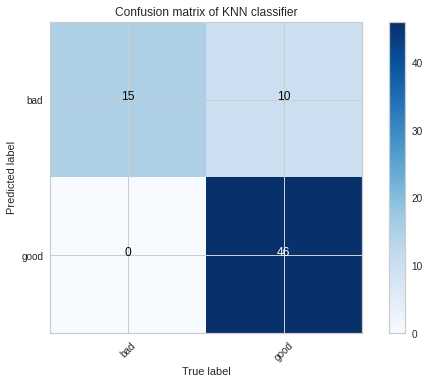

In [ ]:
cm = confusion_matrix(y_test, KNN_predict)
plot_confusion_matrix(cm, ['bad', 'good'],title='Confusion matrix of KNN classifier')

In [ ]:
clf.predict(X_test)
cnt=0
for i,val in enumerate(KNN_predict):
  if (val=='g'):
    cnt+=1
print(cnt)

56


Παρακάτω, εφαρμόζουμε τις μετρικές απόδοσης του ταξινομητή.

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, KNN_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_KNN = list(precision_recall_fscore_support(y_test, KNN_predict, average='micro'))
micro_KNN.pop(3) # tou support
precision_micro_KNN  = micro_KNN [0]
recall_micro_KNN  = micro_KNN [1]
f1_micro_KNN  = micro_KNN [2]
print(micro_KNN )

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_KNN  = list(precision_recall_fscore_support(y_test, KNN_predict, average='macro'))
macro_KNN .pop(3) # tou support
precision_macro_KNN  = macro_KNN [0]
recall_macro_KNN  = macro_KNN [1]
f1_macro_KNN  = macro_KNN [2]
print(macro_KNN )
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test,  KNN_predict, target_names=['bad','good'] ,output_dict=True)
print(pd.DataFrame(class_report).T)

(array([1.        , 0.82142857]), array([0.6, 1. ]), array([0.75      , 0.90196078]), array([25, 46])) 

[0.8591549295774648, 0.8591549295774648, 0.8591549295774648]
[0.9107142857142857, 0.8, 0.8259803921568627]

All the details shown here:

              precision    recall  f1-score    support
bad            1.000000  0.600000  0.750000  25.000000
good           0.821429  1.000000  0.901961  46.000000
accuracy       0.859155  0.859155  0.859155   0.859155
macro avg      0.910714  0.800000  0.825980  71.000000
weighted avg   0.884306  0.859155  0.848453  71.000000


Η αξιολόγηση του ταξινομητή γίνεται μέσω του f1_micro και f1_macro

In [ ]:
print("KNN classifier f1_micro score = {}".format(f1_micro_KNN))
print("KNN classifier f1_macro score = {}".format(f1_macro_KNN))

KNN classifier f1_micro score = 0.8591549295774648
KNN classifier f1_macro score = 0.8259803921568627


Παρακάτω φαίνεται η οπτικοποίηση όλων των μετρικών που τυπώσαμε προηγουμένως, σε heatmap.

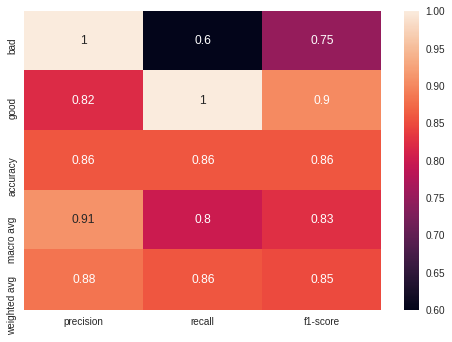

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

## Συγκρίσεις Ταξινομητών

Έχοντας υπολογίσει αναλυτικά στα προηγούμενα βήματα τις μετρικές απόδοσης f1_micro και f1_macro για τους Dummy, Gaussian Naive Bayes και KNN ταξινομητές, παρουσιάζουμε συγκεντρωτικά τα αποτελέσματα με γραφική απαεικόνιση, ώστε να συγκρίνουμε την απόδοσή τους.

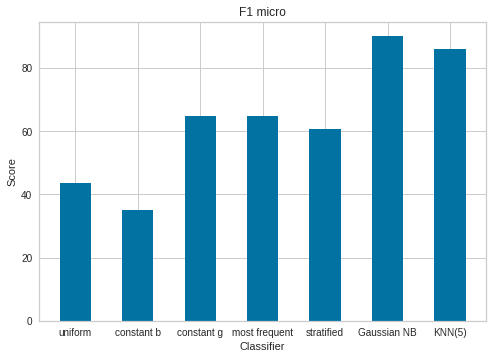

In [ ]:
fig = plt.figure()
x = ['uniform','constant b', 'constant g','most frequent', 'stratified','Gaussian NB','KNN(5)',]
y=[100*f1_micro_dc_uniform, 100*f1_micro_dc_constant_b, 100*f1_micro_dc_constant_g, 100*f1_micro_dc_most_frequent, 100*f1_micro_dc_stratified,100*f1_micro_GNB,100*f1_micro_KNN]
plt.bar(x,y, align='center', width=0.5)
plt.xticks(x,x)
plt.title('F1 micro')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.show()

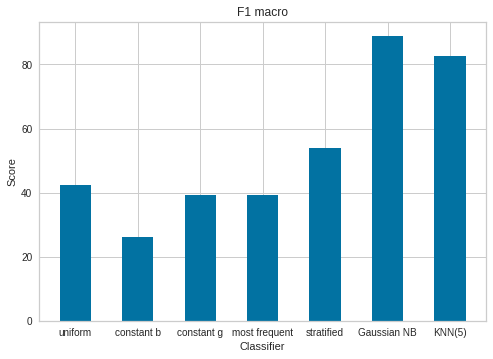

In [ ]:
fig = plt.figure()
x = ['uniform','constant b', 'constant g','most frequent', 'stratified','Gaussian NB','KNN(5)',]
y=[100*f1_macro_dc_uniform, 100*f1_macro_dc_constant_b, 100*f1_macro_dc_constant_g, 100*f1_macro_dc_most_frequent, 100*f1_macro_dc_stratified,100*f1_macro_GNB,100*f1_macro_KNN]
plt.bar(x,y, align='center', width=0.5)
plt.xticks(x,x)
plt.title('F1 macro')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.show()

>Αρχικά, βλέπουμε ότι κάθε ταξινομητής έχει διαφορετικές τιμές για κάθε μετρική, αφού το data set είναι imbalanced.

>Παρατηρούμε ότι την καλύτερη απόδοση έχει ο Gaussian NB και ως προς τις δύο μετρικές και αυτό οφείλεται στο ότι ο αλγόριθμος "μαθαίνει" μέσω της εκπαίδευσης του training set. Επίσης οι αποκλίσεις από τη μέση τιμή και την διασπορά είναι πολύ μικρές αφού τα δεδομένα είναι κανονικοποιημένα στο [-1,1] και ένας λόγος αστοχίας του Gaussian NB είναι οι μεγάλες αυτές αποκλίσεις, που εδώ δεν παρατηρούνται.

>Ο KNN που δεν έχει φάση εκπαίδευσης, ναι μεν εξετάζει όλα τα στοιχεία του train set σε κάθε βήμα, αλλά δεν είναι βελτιστοποιημένος ως προς την υπερπαράμετρο k, η οποία είναι ιδιαιτέρως σημαντική για την απόδοση του ταξινομητή. 

>Και στους δύο αυτούς ταξινομητές έχουμε καλές αποδόσεις και οι λανθασμένες ταξινομήσεις οφείλονται εν μέρει στο γεγονός ότι το set είναι imbalanced και οι ταξινομητές, προβλέπουν κυρίως την επικρατέστερη κλάση που είναι η good(Ο Gaussian NB που έχει 7 λανθασμένες, προβλέπει από αυτές 5 στην good και 2 στην bad και ο kNN έχει 10 και τις προβλέπει όλες ως good).

> Οι dummy classifiers, σε κάθε run παρουσιάζουν διαφορετικές αποδόσεςι και κάθε φορά άλλος εμφανίζεται καλύτερος και άλλος χειρότερος. Πάντως αυτούς που μπορούμε να λάβουμε σοβαρότητα υπόψην μας είναι ο stratified και o uniform. 

> Αναφορικά με το precision και recall στους Gaussian Naive Bayes και kNN, παρατηρούμε ότι το precision (θεωρώντας ως positive το label "bad") είναι αρκετά υψηλό και στις δύο, που σημαίνει ότι το ποσοστό των δειγμάτων που ταξινομήσαμε ως bad και ανήκουν όντως σε αυτή την κλάση, είναι αρκετά υψηλό, ενώ το recall είναι πιο χαμηλό, δηλαδή το ποσοστό των δειγμάτων που ανήκουν στην bad και τα ταξινομήσαμε στην κλάση αυτή δεν είναι πολύ υψηλό. Αυτό είναι λογικό, καθώς υπάρχει μια σχέση trade-off μεταξύ των δύο μεγεθών.

#Βημα 3: Βελτιστοποίηση ταξινομητών

Στο βήμα αυτό, βελτιστοποιούμε ως προς την υπερπαράμετρο k του KNN και αξιολογούμε την απόδοσή του συναρτήσει της παραμέτρου με τη βοήθεια δύο βοηθητικών εργαλείων: το Validation Curve και το Learning Curve. Τέλος, θα συγκρίνουμε τον βελτιστοποιημένο ταξινομητή με τους υπόλοιπους.

*Οι dummy και Gaussian NB δεν έχουν υπερπαραμέτρους προς βελτιστοποίηση*

> Προσοχή: Επίσης κάναμε προσπάθεια βελτιστοποίησης και των δεδομένων εκπαιδευσεις ελέγχοντας το κατα πόσον η μείωση διαστατικότητας που κάνει ο pca θα βοηθούσε στην επίδοση. Ωστόσο επειδή ο χώρος είναι μικρής διάστασης, δηλαδή έχει πολλά features δεν παρατηρηθηκε καποια βελτιστοποίηση. Στο Β μέρος της εργασίας μπορείτε να δείτε το πρωτόκολλο με την εφαρμογή gridsearch στην υπερπαρμάμετρο n του pca.  

Αρχικά θα κάνουμε μια συνοπτική επισκόπηση των δύο εργαλείων Validation Curve και Learning curve.

**Validation Curve:** Αποτελεί σημαντικό εργαλείο απεικόνισης της απόδοσης ενός μοντέλου ως προς μια μετρική, συναρτήσει κάποιας υπερπαραμέτρου. Απεικονίζει 2 καμπύλες: μία για το training set score και μία για το cross-validation score. 

**Learning Curve:** Η καμπύλη αυτή μας δείχνει το training και το testing score του εκτιμητή ως συνάρτηση του μεγέθους των training data. Οπτικοποιεί το πόσο βοηθά το σύστημα η προσθήκη περισσότερων training δεδομένων και το κατά πόσο ο εκτιμητής πάσχει απόό variance ή bias error.

##Βελτιστοποίηση ΚΝΝ

Για τη βελτιστοποίηση του k κάνουμε grid search, με 10-fold cross validation, oρίζoντας ένα πεδίο ορισμού για το k. Για κάθε τιμή k, θα πρέπει να υπολογιστεί ο μέσος όρος του εκτιμητή σε όλα τα folds του cross-validation με βάση το f1_micro και f1_macro και να επιλεχθεί το καλύτερο k. 

Η συγκεκριμένη στρατηγική αναζήτησης των βέλτιστων υπερπαραμέτρων είναι η εξαντλητική αναζήτηση πλέγματος (exhaustive grid search) και είναι προφανώς πολύ ακριβή υπολογιστικά. Υπάρχουν διάφορες τεχνικές για να περιορίζεται η πολυπλοκότητα του grid search, αλλά δεν το αποφεύγουμε γενικά, γιατί οι υπερπαράμετροι είναι ορίσματα των εκτιμητών και δεν μαθαίνονται από την fit.



In [ ]:
param_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]} 

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True,  cv = 10, n_jobs = -1,scoring="f1_micro")
%time grid.fit(X_train, y_train)  # austira to train set!
print("Best parameters regarding f1_micro is = " +str(grid.best_params_))
print()
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True,  cv = 10, n_jobs = -1,scoring="f1_macro")
%time grid.fit(X_train, y_train)  # austira to train set!
print("Best parameters regarding f1_macro is = " +str(grid.best_params_))

CPU times: user 183 ms, sys: 48.8 ms, total: 232 ms
Wall time: 2 s
Best parameters regarding f1_micro is = {'n_neighbors': 2}

CPU times: user 111 ms, sys: 4.73 ms, total: 116 ms
Wall time: 421 ms
Best parameters regarding f1_macro is = {'n_neighbors': 2}


To μοντέλο δουλεύει για k = 2, αν και δε συνηθιζεται να θέτουμε παράμετρο του kΝΝ άρτιους αριθμούς, λόγω του τυχαίου τρόπου που λύνονται οι ισοπαλίες. Αλλά από ότι φαίνεται εδώ, αυτή η τυχαιότητα επιβoηθά το μοντέλο και το σύστημα.

Στη συνέχεια απεικονίζουμε γραφικά τις validation curves για το f1_macro και f1_micro, θεωρώντας ως υπερπαράμετρο το πλήθος των γειτόνων(k) του kNN.

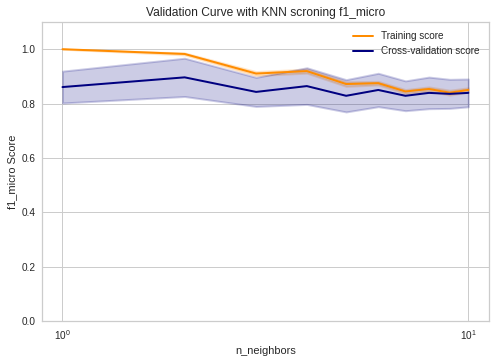

In [ ]:
param_range = [1,2,3,4,5,6,7,8,9,10]
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_train, y_train,  param_name="n_neighbors", param_range=param_range,
    scoring="f1_micro", n_jobs=-1,cv = 10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with KNN scroning f1_micro")
plt.xlabel("n_neighbors")
plt.ylabel("f1_micro Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

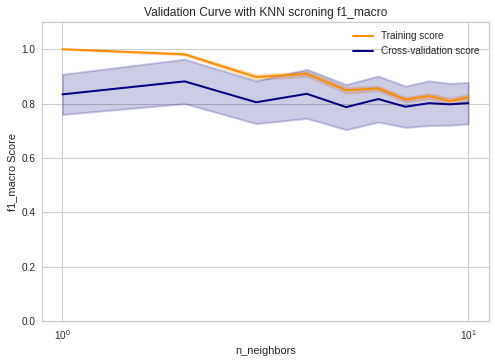

In [ ]:
param_range = [1,2,3,4,5,6,7,8,9,10]
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_train, y_train,  param_name="n_neighbors", param_range=param_range,
    scoring="f1_macro", n_jobs=-1,cv = 10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with KNN scroning f1_macro")
plt.xlabel("n_neighbors")
plt.ylabel("f1_macro Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Από τις δύο παραπάνω καμπύλες παρατηρούμε παρόμοια συμπεριφορά του training και cross-validation score και για τις δύο μετρικές απόδοσης. Γενικά παρατηρούμε ότι οι δύο καμπύλες συγκλίνουν σε μεγάλο βαθμό για όλες τις τιμές της υπερπαραμέτρου, το οποίο μας δείχνει ότι τα δεδομένα είναι fitted αρκετά καλά από τον ταξινομητή. Επίσης, δεν υπάρχουν μεγάλες διακυμάνσεις στις καμπύλες, που σημαίνει ότι το σύστημα είναι ευσταθές ως προς την παράμετρο n_neighbors(robust). Ωστόσο, παρατηρούμε ότι για k = 2, η καμπύλη του validation λαμβάνει τη μέγιστη τιμή, υποδηλώνοντας ότι αυτή είναι η τιμή στην οποία το σύστημα παρουσιάζει την καλύτερη απόδοση, το οποίο συμφωνεί και με το παραπάνω αποτέλεσμα του grid search. Αξίζει να αναφέρουμε ως παρατήρηση ότι υπάρχει μεγαλύτερη σύγκλιση των δύο καμπυλών για μεγαλύτερα k αλλά η απόδοση του cross-validation score, πέφτει.

Παρακάτω απεικονίζουμε γραφικά τις learning curves για το f1_macro και f1_micro, θεωρώντας ότι ο ταξινομητής έχει λειτουργήσει με k=2, δηλαδή με βέλτιστη υπερπαράμετρο.



In [ ]:
def plot_learning_curve(train_scores, test_scores, train_sizes,title):
    plt.figure()
    plt.grid()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Testing score")
    plt.legend(loc="best")
    return

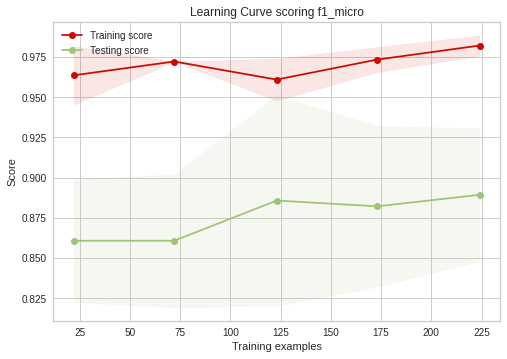

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=2), 
                                              X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 5), 
                                              n_jobs = -1,scoring="f1_micro")
plot_learning_curve(train_scores, test_scores, train_sizes,"Learning Curve scoring f1_micro")

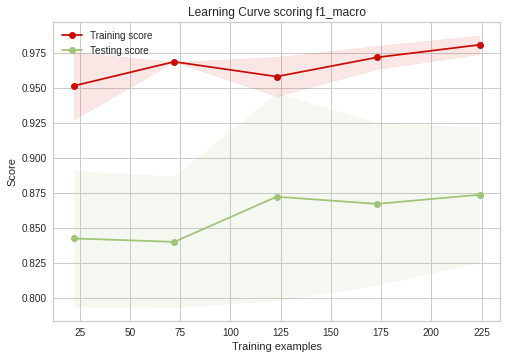

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=2), 
                                              X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 5), 
                                              n_jobs = -1,scoring="f1_macro")
plot_learning_curve(train_scores, test_scores, train_sizes,"Learning Curve scoring f1_macro")

Από τα παραπάνω βλέπουμε ότι και για τις δύο μετρικές, οι καμπύλες δεν συγκλίνουν και η καμπύλη του training score είναι πάνω από το testing, που σημαίνει ότι το μοντέλο είναι underfitted. Αυτό είναι λογικό καθώς έχουμε πολύ μικρό πλήθος δεδομένων, ώστε να δημιουργήσουμε ένα ακριβές και λειτουργικό μοντέλο, το οποίο να σκιαγραφεί την κατανομή των δεδομένων.

Έπειτα κάνουμε fit τα train δεδομένα με τη βέλτιστη τιμή υπερπαραμέτρου και predict με τα test δεδομένα. Παράλληλα, τυπώνουμε και τους χρόνους εκτέλεσης της πρόβλεψης, οι οποίοι παρατηρούμε ότι είναι μικροί.

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2)
%time clf.fit(X_train, y_train)
%time KNN_predict = clf.predict(X_test)
print("Predictions for KNN optimal classifier:"+"\n"+" {}".format(KNN_predict ))

CPU times: user 1.92 ms, sys: 0 ns, total: 1.92 ms
Wall time: 2.57 ms
CPU times: user 7.05 ms, sys: 0 ns, total: 7.05 ms
Wall time: 8.78 ms
Predictions for KNN optimal classifier:
 ['g' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b'
 'g' 'g' 'g' 'b' 'g' 'g' 'b' 'g' 'b' 'b' 'b' 'g' 'b' 'g' 'g' 'g' 'b' 'g'
 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'b' 'b' 'g' 'g' 'g' 'b']


Στη συνέχεια τυπώνουμε κατά τα γνωστά τον πίνακα σύγχησης και παρατηρούμε ότι από τα 71 δεδομένα προβλέπει λάθος μόνο τα 9, που είναι λιγότερα από τις λανθασμένες προβλέψεις του kNN που δεν ήταν βελτιστοποιημένος ως προς την υπερπαράμετρο k και ταξινομούσε 10 δείγματα λάθος.

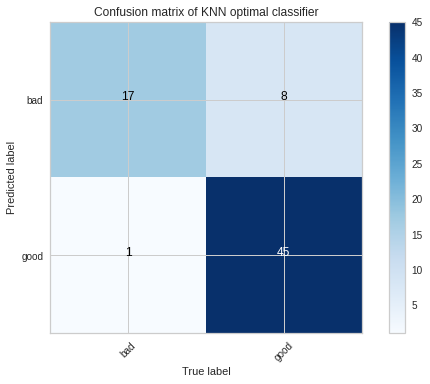

In [ ]:
cm = confusion_matrix(y_test, KNN_predict)
plot_confusion_matrix(cm, ['bad', 'good'],title='Confusion matrix of KNN optimal classifier')

Ο ταξινομητής προβλέπει 53 good ('g') αποτελέσματα

In [ ]:
clf.predict(X_test)
cnt=0
for i,val in enumerate(KNN_predict):
  if (val=='g'):
    cnt+=1
print(cnt)

53


Παρακάτω, φαίνεται το σύνολο των μετρικών απόδοσης τους ταξινομητή μέσω της μεθόδου classification_report.

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, KNN_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_KNN_opt = list(precision_recall_fscore_support(y_test, KNN_predict, average='micro'))
micro_KNN_opt.pop(3) # tou support
precision_micro_KNN_opt  = micro_KNN_opt[0]
recall_micro_KNN_opt  = micro_KNN_opt [1]
f1_micro_KNN_opt  = micro_KNN_opt[2]
print(micro_KNN_opt )

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_KNN_opt = list(precision_recall_fscore_support(y_test, KNN_predict, average='macro'))
macro_KNN_opt .pop(3) # tou support
precision_macro_KNN_opt  = macro_KNN_opt[0]
recall_macro_KNN_opt = macro_KNN_opt[1]
f1_macro_KNN_opt = macro_KNN_opt[2]
print(macro_KNN_opt)
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test,  KNN_predict, target_names=['bad','good'] ,output_dict=True)
print(pd.DataFrame(class_report).T)

(array([0.94444444, 0.8490566 ]), array([0.68      , 0.97826087]), array([0.79069767, 0.90909091]), array([25, 46])) 

[0.8732394366197183, 0.8732394366197183, 0.8732394366197183]
[0.8967505241090147, 0.8291304347826087, 0.849894291754757]

All the details shown here:

              precision    recall  f1-score    support
bad            0.944444  0.680000  0.790698  25.000000
good           0.849057  0.978261  0.909091  46.000000
accuracy       0.873239  0.873239  0.873239   0.873239
macro avg      0.896751  0.829130  0.849894  71.000000
weighted avg   0.882644  0.873239  0.867403  71.000000


H αξιολόγηση της απόδοσης του ταξινομητή γίνεται με τις μετρικές f1_micro και f1_macro και οι τιμές τους φαίνονται παρακάτω.

In [ ]:
print("KNN classifier f1_micro score = {}".format(f1_micro_KNN_opt))
print("KNN classifier f1_macro score = {}".format(f1_macro_KNN_opt))

KNN classifier f1_micro score = 0.8732394366197183
KNN classifier f1_macro score = 0.849894291754757


Παρακάτω φαίνονται τα προηγούμενα αποτελέσματα με heatmap.

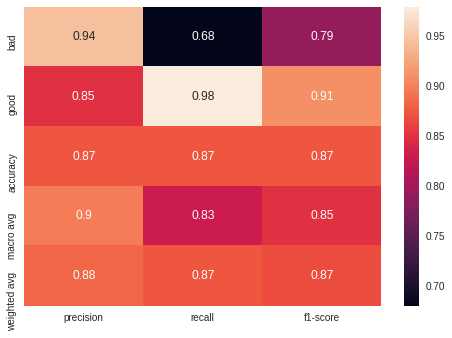

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

Για πληρότητα παρουσιάζουμε και τα αποτελέσματα των dummy stratified και Gaussian Naive Bayes με 10-fold-cross-validation και παρατηρούμε ότι τα αποτελέσματα είναι συγκρίσιμα με τα αντίστοιχα του βήματος 2.

##Dummy stratified

In [ ]:
dc_stratified = DummyClassifier(strategy="stratified")
dc_stratified.fit(X_train, y_train)
dc_stratified_predict = cross_val_predict(dc_stratified, np.concatenate((X_train,X_test), axis=0), 
                           np.concatenate((y_train,y_test), axis=0), cv=KFold(n_splits=10))
print("Predictions for Stratified dummy classifier:"+"\n"+" {}".format(dc_stratified_predict))
print()

scores_most_stratified_micro = cross_val_score(dc_stratified , np.concatenate((X_train,X_test), axis=0), np.concatenate((y_train,y_test), axis=0), 
                         cv=KFold(n_splits=10), 
                         scoring="f1_micro")
scores_most_stratified_macro = cross_val_score(dc_stratified , np.concatenate((X_train,X_test), axis=0), np.concatenate((y_train,y_test), axis=0), 
                         cv=KFold(n_splits=10), 
                         scoring="f1_macro")


print("Stratified dummy classifier CV f1_micro score = %f +-%f" % (100*np.mean(scores_most_stratified_micro), 100*np.std(scores_most_stratified_micro)))
print("Stratified dummy classifier CV f1_macro score = %f +-%f" % (100*np.mean(scores_most_stratified_macro), 100*np.std(scores_most_stratified_macro)))

Predictions for Stratified dummy classifier:
 ['g' 'b' 'g' 'b' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'b'
 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'b' 'g' 'b' 'b' 'b' 'g' 'g' 'g'
 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'b' 'b' 'g' 'b' 'g' 'g' 'b'
 'b' 'g' 'g' 'g' 'g' 'g' 'b' 'b' 'g' 'g' 'b' 'g' 'b' 'b' 'g' 'g' 'b' 'g'
 'g' 'b' 'g' 'b' 'g' 'g' 'b' 'g' 'b' 'b' 'g' 'g' 'b' 'g' 'g' 'g' 'b' 'g'
 'g' 'b' 'b' 'b' 'b' 'g' 'g' 'g' 'b' 'b' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g'
 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'b'
 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g'
 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'b' 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'g'
 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'b' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g'
 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'g'
 'g' 'g' 'g' 'g' 'g' 'b' 'b' 'g' 'g' 'g' 'b' 'b' 'g' 'b' 'g' 'g' 'b' 'g'
 'g' 'b' 'b' 'b' 'g' 'b' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'b' 'b'
 'g' 

45 81 73 152


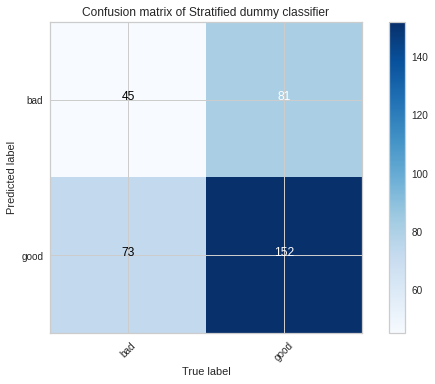

In [ ]:
cm = confusion_matrix(np.concatenate((y_train,y_test), axis=0), dc_stratified_predict)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
plot_confusion_matrix(cm, ['bad', 'good'],title='Confusion matrix of Stratified dummy classifier')

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(np.concatenate((y_train,y_test), axis=0),  dc_stratified_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_dc_stratified= list(precision_recall_fscore_support(np.concatenate((y_train,y_test), axis=0), dc_stratified_predict, average='micro'))
micro_dc_stratified.pop(3) # tou support
precision_micro_dc_stratified  = micro_dc_stratified[0]
recall_micro_dc_stratified  = micro_dc_stratified[1]
f1_micro_dc_stratified = micro_dc_stratified[2]
print(micro_dc_stratified )

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_dc_stratified = list(precision_recall_fscore_support(np.concatenate((y_train,y_test), axis=0), dc_stratified_predict, average='macro'))
macro_dc_stratified .pop(3) # tou support
precision_macro_dc_stratified = macro_dc_stratified[0]
recall_macro_dc_stratified  = macro_dc_stratified[1]
f1_macro_dc_stratified = macro_dc_stratified[2]
print(macro_dc_stratified)
print()
print("All the details shown here:")
print()
print(classification_report(np.concatenate((y_train,y_test), axis=0), dc_stratified_predict, target_names=['bad','good'] ) )

(array([0.38135593, 0.65236052]), array([0.35714286, 0.67555556]), array([0.36885246, 0.66375546]), array([126, 225])) 

[0.5612535612535613, 0.5612535612535613, 0.5612535612535613]
[0.5168582236124245, 0.5163492063492063, 0.5163039587658387]

All the details shown here:

              precision    recall  f1-score   support

         bad       0.38      0.36      0.37       126
        good       0.65      0.68      0.66       225

    accuracy                           0.56       351
   macro avg       0.52      0.52      0.52       351
weighted avg       0.56      0.56      0.56       351



##Gaussian Naive Bayes

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)

#GaussianNB_predict = clf.predict(X_test)
GaussianNB_predict = cross_val_predict(clf, np.concatenate((X_train,X_test), axis=0), 
                           np.concatenate((y_train,y_test), axis=0), cv=KFold(n_splits=10))

print("Predictions for Gaussian Naive Bayes classifier:"+"\n"+" {}".format(GaussianNB_predict))
print()

GaussianNB_micro = cross_val_score(clf, np.concatenate((X_train,X_test), axis=0), np.concatenate((y_train,y_test), axis=0), 
                         cv=KFold(n_splits=10), scoring="f1_micro")
GaussianNB_macro = cross_val_score(clf, np.concatenate((X_train,X_test), axis=0), np.concatenate((y_train,y_test), axis=0), 
                         cv=KFold(n_splits=10), scoring="f1_macro")

print("Gaussian Naive Bayes classifier CV f1_micro score = %f +-%f" % (100*np.mean(GaussianNB_micro), 100*np.std(GaussianNB_micro)))
print("Gaussian Naive Bayes classifier CV f1_macro score = %f +-%f" % (100*np.mean(GaussianNB_macro), 100*np.std(GaussianNB_macro)))

Predictions for Gaussian Naive Bayes classifier:
 ['g' 'g' 'g' 'g' 'g' 'b' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g'
 'g' 'g' 'g' 'g' 'g' 'b' 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'b' 'g' 'b'
 'b' 'b' 'b' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'g'
 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'b' 'b' 'b' 'g' 'g' 'g' 'b' 'g' 'g' 'b' 'g'
 'b' 'g' 'b' 'b' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'b' 'g' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'b' 'g'
 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'g'
 'g' 'g' 'b' 'b' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g'
 'b' 'g' 'g' 'b' 'b' 'b' 'g' 'g' 'b' 'b' 'g' 'b' 'b' 'b' 'g' 'g' 'g' 'g'
 'g' 'b' 'g' 'b' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'b' 'g' 'b' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'b' 'b' 'g' 'b' 'g' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'b' 'g' 'g' 'g'
 'g' 'g' 'b' 'g' 'g' 'g' 'b' 'b' 'g' 'g' 'b' 'g' 'b' 'g' 'g' 'b' 'g' 'g'
 

95 31 6 219


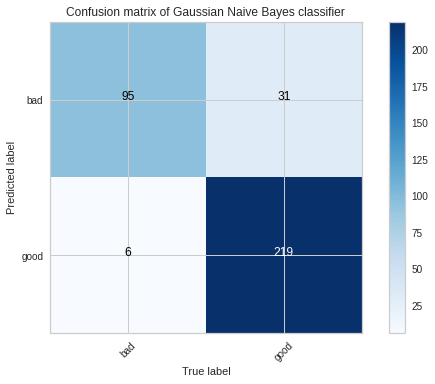

In [ ]:
cm = confusion_matrix(np.concatenate((y_train,y_test), axis=0), GaussianNB_predict)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
plot_confusion_matrix(cm, ['bad', 'good'],title='Confusion matrix of Gaussian Naive Bayes classifier')

In [ ]:
### me ayth thn synarthsh epibabaiwnnw oti evala swsta ta labels
### vlepw ;oti eipa oti 49 data htan good ek twn opoiwn ta 44 htan ontws good
cnt=0
for i,val in enumerate(GaussianNB_predict):
  if (val=='g'):
    cnt+=1
print(cnt)

250


In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(np.concatenate((y_train,y_test), axis=0), GaussianNB_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_GNB = list(precision_recall_fscore_support(np.concatenate((y_train,y_test), axis=0), GaussianNB_predict, average='micro'))
micro_GNB.pop(3) # tou support
precision_micro_GNB = micro_GNB[0]
recall_micro_GNB = micro_GNB[1]
f1_micro_GNB = micro_GNB[2]
print(micro_GNB)

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_GNB = list(precision_recall_fscore_support(np.concatenate((y_train,y_test), axis=0), GaussianNB_predict, average='macro'))
macro_GNB.pop(3) # tou support
precision_macro_GNB = macro_GNB[0]
recall_macro_GNB = macro_GNB[1]
f1_macro_GNB = macro_GNB[2]
print(macro_GNB)
print()
print("All the details shown here:")
print()
print(classification_report(np.concatenate((y_train,y_test), axis=0), GaussianNB_predict, target_names=['bad','good'] ) )

(array([0.94059406, 0.876     ]), array([0.75396825, 0.97333333]), array([0.83700441, 0.92210526]), array([126, 225])) 

[0.8945868945868946, 0.8945868945868946, 0.8945868945868946]
[0.9082970297029702, 0.8636507936507937, 0.8795548342221191]

All the details shown here:

              precision    recall  f1-score   support

         bad       0.94      0.75      0.84       126
        good       0.88      0.97      0.92       225

    accuracy                           0.89       351
   macro avg       0.91      0.86      0.88       351
weighted avg       0.90      0.89      0.89       351



## Σύγκριση Ταξινομητων

Στο σημείο αυτό, παρουσιάζουμε τα συγκεντρωτικά αποτελέσματα της απόδοσης των Dummy Stratified, Gaussian Naive Bayes, kNN και kNN optimal, όπου ο kNN αντιστοιχεί στην default τιμή k = 5 και o kNN_optimal σε αυτό, με βελτιστoποιημένο αριθμό γειτόνων k = 2.

Τη σύγκριση των Dummy, Gaussian Naive Bayes και απλού kNN πραγματοποιήσαμε στο βήμα 3 και εδώ βλέπουμε ότι η απόδοση του νέου ταξινομητή kNN_optimal είναι μεγαλύτερη από τον απλό kNN, όπως αναμέναμε αλλά παραμένει μικρότερη από τον Gaussian Naive Bayes, γεγονός που υποδεικνύει ότι ο ταξινομητής μπορεί να επιδέχεται περαιτέρω βελτίωση που ενδεχομένως να αυξήσει την απόδοσή του, το οποίο και πραγματοποιούμε στο βήμα 4 (Bonus: Extra Βελτιστοποιήσεις). Οι παρατηρήσεις αυτές ισχύουν και για τις δύο μετρικές.

Αναφορικά με τα precision και recall παρατηρούμε τα ίδια φαινόμενα για τον Gaussian και τον kNN, ενώ αξίζει να αναφέρουμε ότι στον Dummy Stratified είναι και τα δύο αρκετά χαμηλά.

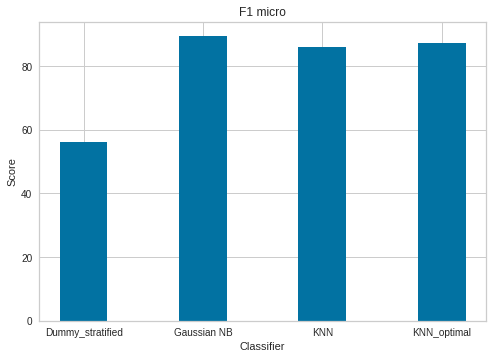

In [ ]:
fig = plt.figure()
x = ['Dummy_stratified','Gaussian NB','KNN','KNN_optimal']
y=[100*f1_micro_dc_stratified,100*f1_micro_GNB,100*f1_micro_KNN,100*f1_micro_KNN_opt]
plt.bar(x,y, align='center', width=0.4)
plt.xticks(x,x)
plt.title('F1 micro')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.show()

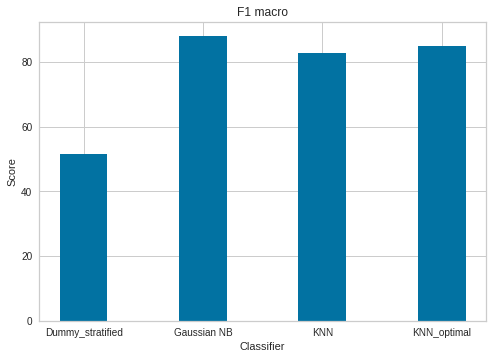

In [ ]:
fig = plt.figure()
x = ['Dummy_stratified','Gaussian NB','KNN','KNN_optimal']
y=[100*f1_macro_dc_stratified,100*f1_macro_GNB,100*f1_macro_KNN,100*f1_macro_KNN_opt]
plt.bar(x,y, align='center', width=0.4)
plt.xticks(x,x)
plt.title('F1 macro')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.show()

## Συγκριση βελτίωσης επίδοσης KNN

Παρακάτω αντιπαραβάλουμε μόνο την απόδοση των δύο kNN (του απλού και του optimal), ώστε να έχουμε μια πιο συμπυκνωμένη εικόνα σύγκρισης. Η διαφορά αυτή έγκειται στο ότι με τη μέθοδο grid search βρήκαμε τη βέλτιστη παράμετρο k και επομένως έχουμε πιο αποδοτικό μοντέλο.

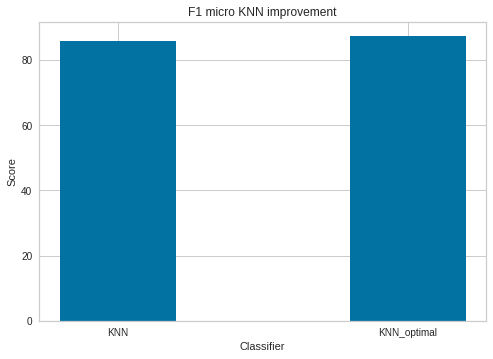

In [ ]:
fig = plt.figure()
x = ['KNN','KNN_optimal']
y=[100*f1_micro_KNN,100*f1_micro_KNN_opt]
plt.bar(x,y, align='center', width=0.4)
plt.xticks(x,x)
plt.title('F1 micro KNN improvement')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.show()

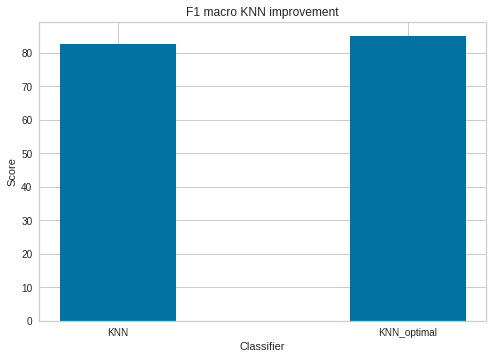

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x = ['KNN','KNN_optimal']
y=[100*f1_macro_KNN,100*f1_macro_KNN_opt]
plt.bar(x,y, align='center', width=0.4)
plt.xticks(x,x)
plt.title('F1 macro KNN improvement')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.show()

# Βήμα 4 Bonus : Extra Βελτισοποιησεις

Στο βήμα αυτό εφαρμόζουμε στάδια προεπεξεργασίας των δεδομένων ώστε ο ταξινομητής να μας δώσει ακόμα καλύτερα αποτελέσματα.

Ωστόσο εφαρμόζουμε εξ αρχής default προεπεξεργασία ορίζοντας σταθερές τιμές στο threshold του variance χωρίς να κάνουμε gridsearch για καθε ταξινομητή. Αυτό είναι κάτι απλοικό, αλλά το σωστό θα ήταν να γίνει gridsearch για να βρεθεί η καταλληλότερη τιμή του για κάθε ταξινομητή.

## Κόβουμε πιο αυστηρά τα Variance

Αρχικά, εφαρμόζουμε την τεχνική Variance Threshold, έτσι ώστε να μειώσουμε τις διαστάσεις των δεδομένων μας, καθώς η ευκλείδια απόσταση με την οποία ο kNN βρίσκει τους κοντινούς του γείτονες το οποίο δεν έχει ιδιαίτερο νόημα για μεγάλη διαστατικότητα ειδικά στην περίπτωσή μας πού έχουμε μικρό data set. Σε γενικές γραμμές αν η διακύμανση ενός χαρακτηριστικού εισόδου είναι πολύ χαμηλή, δεν μπορεί να προσφέρει σημαντικά στη διαχωριστική ικανότητα του ταξινομητή, οπότε μπορούμε να αφαιρέσουμε αυτά τα χαρακτηριστικά.
Πρέπει επίσης να πάρουμε μια μάσκα (index) των χαρακτηριστικών που επιλέγουμε, ώστε να την εφαρμόσουμε και στα δεδομένα train ώστε να έχουν τις ίδιες διαστάσεις. Αυτό δεν σπάει τον κανόνα ότι δεν χρησιμοποιούμε τα δεδομένα test γιατί μπορούμε να θεωρήσουμε ότι ο ταξινομητής απλώς αγνοεί τις εισόδους που δεν περιλαμβάνονται στη μάσκα.

Εδώ επιλέγουμε τυχαία για threshold την τιμή 0.27. Εναλλακτικά, θα μπορούσαμε να χωρίσουμε το data set σε training, testing και validation set και με το τελευταίο να ρυθμίζουμε κατάλληλα τις υπερπαραμέτρους και στη συγκεκριμένη περίπτωση το Variance Threshold.



In [ ]:
from sklearn.feature_selection import VarianceThreshold

# αρχικοποιούμε έναν selector
selector = VarianceThreshold(threshold=0.27)
# όπως κάναμε και με τους ταξινομητές τον κάνουμε fit στα δεδομένα εκπαίδευσης
train_reduced = selector.fit_transform(X_train)
#print(train_reduced)
mask = selector.get_support()
#print(mask)

test_reduced = selector.transform(X_test)
#print(test_reduced)
print(train_reduced .shape)

(280, 17)


Βλέπουμε πως από τα 34 χαρακτηριστικά που είχαμε, με την εφαρμογή κατωφλίου για το Variance, έχουμε πλέον 17 διαστάσεις για τα δεδομένα μας, το οποίο είναι σημαντική μείωση. 

Αξίζει να σημειώσουμε ότι αφού έχουμε επιτύχει μια καλή μείωση της διαστατικότητας και αφού έχουμε μικρό data set, δεν κρίνεται απαραίτητο να εφαρμόσουμε τη μέθοδο PCA για την οποία κάναμε λόγο παραπάνω που μπορεί, ως extra υπερπαράμετρος να μας οδηγήσει σε overfitting. 

## Κάνουμε κανονικοποίηση των δεδομέένων

Στο βήμα αυτό κάνουμε κανονικοποίηση των χαρακτηριστικών. Χαρακτηριστικά με πολύ μεγάλες διαφορές στις απόλυτες τιμές τους μπορούν να προκαλέσουν προβλήματα στην εκπαίδευση και να δώσουν ταξινομητές με μη βέλτιστη απόδοση. Για παράδειγμα, ένα χαρακτηριστικό με πολύ μεγάλες τιμές θα έχει μεγαλύτερη επίδραση στον υπολογισμό της απόστασης στον kNN από ότι ένα με μικρές τιμές, χωρίς αυτό να σημαίνει απαραίτητα ότι είναι περισσότερο καθοριστικό για το διαχωρισμό των κλάσεων. Η κανονικοποίηση μετασχηματίζει τις τιμές των χαρακτηριστικών ώστε να αμβλυνθούν αυτές οι διαφορές.

In [ ]:
from sklearn import preprocessing

# standardization των features του training set
X_train_scaled = preprocessing.scale(train_reduced)
#print(X_train_scaled)
# μέση τιμη και απόκλιση των scaled χαρακτηριστικών
#print(X_train_scaled.mean(axis=0))
#print(X_train_scaled.std(axis=0))

# όριζουμε ένα αντικείμενο scaler και το κάνουμε fit στο train set
scaler = preprocessing.StandardScaler().fit(train_reduced)
# εφαρμόζουμε τον scaler στα δεδομένα test. ΠΡΟΣΟΧΗ μέθοδος transform, όχι fit!
X_test_scaled = scaler.transform(test_reduced)
#print(X_test_scaled)

# και τυπώνουμε τη μέση τιμ;h και απόκλιση του test set 
#print(X_test_scaled.mean(axis=0))
#print(X_test_scaled.std(axis=0))

##Εξισορρόπηση data set

Όπως είδαμε, σύμφωνα με το κριτήριο της εκφώνησης, το σύνολο δεδομένων μας είναι μη ισορροπημένο. 

Όπως γνωρίζουμε, έχουμε δύο βασικούς τρόπους για να εξισσοροπούμε ένα dataset, την υποδειγματοληψία (undersampling) και την υπερδειγματοληψία (oversampling). Εν ολίγοις, στο undersampling απλά αφαιρούμε τυχαία δείγματα από όλες τις κατηγορίες που έχουν μεγαλύτερο πλήθος από τη μικρότερη, ενώ στο oversampling επιλέγουμε τυχαία ορισμένα παραδείγματα από τις λιγότερο συχνές κατηγορίες και τα επαναλαμβάνουμε. Στην πρώτη δηλαδή αφαιρούμε δεδομένα ενώ στην άλλη προσθέτουμε. 

Εδώ κάνουμε oversampling αφού δεν χάνουμε δεδομένα εκπαίδευσης και είναι ιδιαίτερα σημαντικό για τον ταξινομητή μας καθώς όπως γνωρίζουμε ο kNN ταξινομεί ένα δείγμα στην κλάση που έχουν οι περισσότεροι από τους k περισσότερους γείτονές του. Στην περίπτωσή μας που το data set είναι μη ισορροπημένο και έχουμε περισσότερα good από bad δεδομένα, είναι πιθανό κάποιο δείγμα που είναι πιο κοντά σε δείγμα της κλάσης bad, να έχει περισσότερους good γείτονες εξαιτίας του πλήθους των δειγμάτων της κλάσης αυτής.

In [ ]:
ros = RandomOverSampler(random_state=0)

X_train2,y_train2= ros.fit_sample(X_train_scaled,y_train)

num_of_good= len(np.where(y_train2 == 'g')[0])
num_of_bad= len(np.where(y_train2 == 'b')[0])
print("Size of new training dataset: {}".format(y_train2.shape))
print("Num of goods in training set = {}".format(num_of_good))
print("Num of bads in training set = {}".format(num_of_bad))
print("Num_of_bad/Num_of_good = {}".format(num_of_bad/num_of_good))

Size of new training dataset: (358,)
Num of goods in training set = 179
Num of bads in training set = 179
Num_of_bad/Num_of_good = 1.0


In [ ]:
print("Final size of training dataset:{}".format(X_train2.shape))

Final size of training dataset:(358, 17)


## Bέλτιστος kNN

Στο σημείο αυτό, εφαρμόζουμε τα γνωστά μας βήματα ταξινόμησης και γραφικής απεικόνισης των αποτελεσμάτων.

Αρχίκά κάνουμε fit και predict.

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train2, y_train2)
KNN_predict = clf.predict(X_test_scaled)
print("Predictions for KNN classifier:"+"\n"+" {}".format(KNN_predict ))

Predictions for KNN classifier:
 ['g' 'g' 'b' 'g' 'g' 'b' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g'
 'g' 'g' 'g' 'b' 'g' 'g' 'b' 'g' 'b' 'b' 'b' 'b' 'b' 'g' 'g' 'g' 'b' 'g'
 'g' 'g' 'b' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'b' 'b' 'g' 'g' 'b' 'g'
 'g' 'b' 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'b']


Δημιουργούμε τον πίνακα σύγχυσης και βλέπουμε ότι έχουμε μόνο 6 λαθος ταξινομημένα δείγματα.

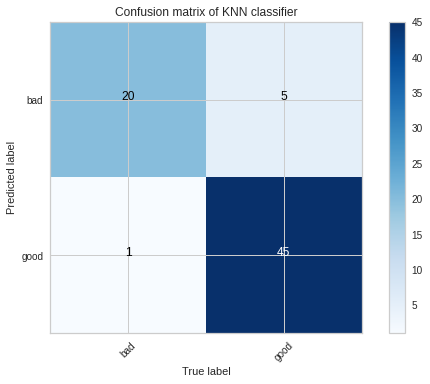

In [ ]:
cm = confusion_matrix(y_test, KNN_predict)
plot_confusion_matrix(cm, ['bad', 'good'],title='Confusion matrix of KNN classifier')

Παρακάτω, εφαρμόζουμε τις μετρικές απόδοσης του ταξινομητή.

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, KNN_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_KNN = list(precision_recall_fscore_support(y_test, KNN_predict, average='micro'))
micro_KNN.pop(3) # tou support
precision_micro_KNN  = micro_KNN [0]
recall_micro_KNN  = micro_KNN [1]
f1_micro_KNN_final  = micro_KNN [2]
print(micro_KNN )

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_KNN  = list(precision_recall_fscore_support(y_test, KNN_predict, average='macro'))
macro_KNN .pop(3) # tou support
precision_macro_KNN  = macro_KNN [0]
recall_macro_KNN  = macro_KNN [1]
f1_macro_KNN_final  = macro_KNN [2]
print(macro_KNN )
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test,  KNN_predict, target_names=['bad','good'] ,output_dict=True)
print(pd.DataFrame(class_report).T)

(array([0.95238095, 0.9       ]), array([0.8       , 0.97826087]), array([0.86956522, 0.9375    ]), array([25, 46])) 

[0.9154929577464789, 0.9154929577464789, 0.9154929577464789]
[0.9261904761904762, 0.8891304347826088, 0.9035326086956521]

All the details shown here:

              precision    recall  f1-score    support
bad            0.952381  0.800000  0.869565  25.000000
good           0.900000  0.978261  0.937500  46.000000
accuracy       0.915493  0.915493  0.915493   0.915493
macro avg      0.926190  0.889130  0.903533  71.000000
weighted avg   0.918444  0.915493  0.913579  71.000000


Η αξιολόγηση του ταξιμομητή γίνεται μέσω του f1_micro και f1_macro.

In [ ]:
print("KNN classifier f1_micro score = {}".format(f1_micro_KNN_final))
print("KNN classifier f1_macro score = {}".format(f1_macro_KNN_final))

KNN classifier f1_micro score = 0.9154929577464789
KNN classifier f1_macro score = 0.9035326086956521


Και τυπώνουμε τον heatmap με τις μετρικές.

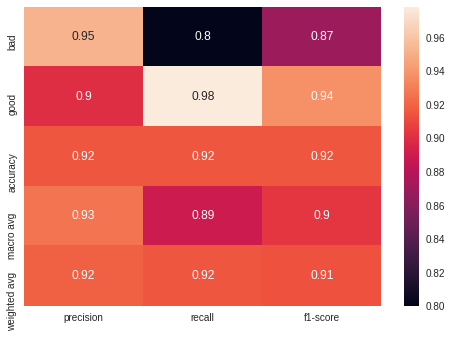

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

## Σύγκριση ταξινομητών

Βλέπουμε, λοιπόν, ότι ο kNN, που εφαρμόζεται σε δεδομένα που έχουν υποστεί επεξεργασία, έχει καλύτερη απόδοση και ως προς τις δύο μετρικές από τον απλό και αυτόν που έχει βελτιωθεί μόνο ως προς την παράμετρο k και έχει εφαρμοστεί στα δεδομένα με την αρχική τους μορφή.

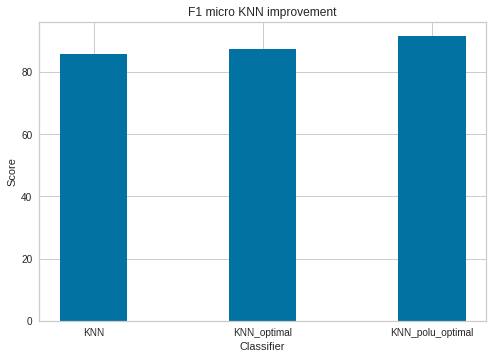

In [ ]:
fig = plt.figure()
x = ['KNN','KNN_optimal','KNN_polu_optimal']
y=[100*f1_micro_KNN,100*f1_micro_KNN_opt,100*f1_micro_KNN_final]
plt.bar(x,y, align='center', width=0.4)
plt.xticks(x,x)
plt.title('F1 micro KNN improvement')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.show()

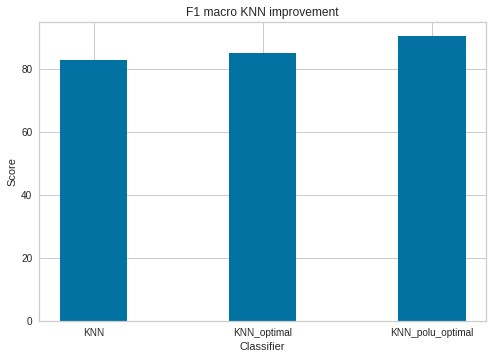

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x = ['KNN','KNN_optimal','KNN_polu_optimal']
y=[100*f1_macro_KNN,100*f1_macro_KNN_opt,100*f1_macro_KNN_final]
plt.bar(x,y, align='center', width=0.4)
plt.xticks(x,x)
plt.title('F1 macro KNN improvement')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.show()

Παρακάτω, βλέπουμε ότι ο βέλτιστος ταξινομητής κατάφερε να ξεπεράσει όλους τους άλλους και ως προς τις δύο τεχνικές, ακόμα και τον Gaussian NB και να γίνει ο καλύτερος ταξινομητής.

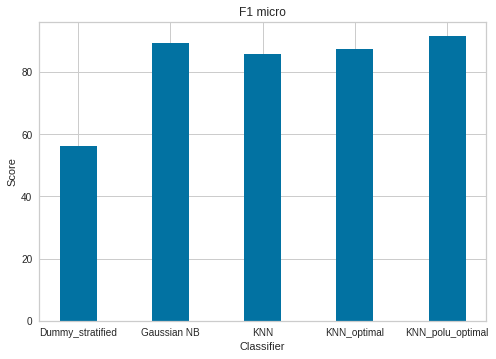

In [ ]:
fig = plt.figure()
x = ['Dummy_stratified','Gaussian NB','KNN','KNN_optimal','KNN_polu_optimal']
y=[100*f1_micro_dc_stratified,100*f1_micro_GNB,100*f1_micro_KNN,100*f1_micro_KNN_opt,100*f1_micro_KNN_final]
plt.bar(x,y, align='center', width=0.4)
plt.xticks(x,x)
plt.title('F1 micro')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.show()

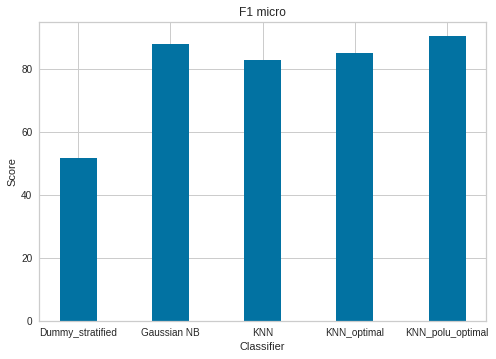

In [ ]:
fig = plt.figure()
x = ['Dummy_stratified','Gaussian NB','KNN','KNN_optimal','KNN_polu_optimal']
y=[100*f1_macro_dc_stratified,100*f1_macro_GNB,100*f1_macro_KNN,100*f1_macro_KNN_opt,100*f1_macro_KNN_final]
plt.bar(x,y, align='center', width=0.4)
plt.xticks(x,x)
plt.title('F1 micro')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.show()

#Βήμα 2 BONUS CV στο Scoring

Στο βήμα αυτό, επαναλαμβάνουμε τα στάδια του βήματος 2 (της ταξινόμησης δηλαδή), χωρίς να χωρίζουμε το set σε 80-20% αναλογία, αλλά εφαρμόζοντας 10-fold cross validation, βελτιώνοντας έτσι τις αποδόσεις.

##Dummy

Θα δοκιμάσουμε πρώτα κάποιες πολύ απλές τακτικές ταξινόμησης. Η κλάση DummyClassifier δέχεται μια παράμετρο που καθορίζει την τακτική της ταξινόμησης ως εξής:
* “uniform”: προβλέπει τυχαία και ομοιόμορφα.
* “constant”: προβλέπει πάντα μία κατηγορία που τη διαλέγει ο χρήστης.
* “most_frequent”: προβλέπει πάντα την πιο συχνή κατηγορία στο training set.
* “stratified”: κάνει προβλέψεις διατηρώντας την κατανομή των κλάσεων στο training set.

### Dummy unifrom 

In [ ]:
dc_uniform = DummyClassifier(strategy="uniform")
model_uniform = dc_uniform.fit(X_train, y_train)
dc_uniform_predict = cross_val_predict(model_uniform, np.concatenate((X_train,X_test), axis=0), 
                           np.concatenate((y_train,y_test), axis=0), cv=KFold(n_splits=10))
print("Predictions for Uniform dummy classifier:"+"\n"+" {}".format(dc_uniform_predict))
print()
scores_uniform_micro = cross_val_score(dc_uniform, np.concatenate((X_train,X_test), axis=0), np.concatenate((y_train,y_test), axis=0), 
                         cv=KFold(n_splits=10), 
                         scoring="f1_micro")
scores_uniform_macro = cross_val_score(dc_uniform, np.concatenate((X_train,X_test), axis=0), np.concatenate((y_train,y_test), axis=0), 
                         cv=KFold(n_splits=10), 
                         scoring="f1_macro")

print("Uniform dummy classifier CV f1_micro score = %f +-%f" % (100*np.mean(scores_uniform_micro), 100*np.std(scores_uniform_micro)))
print("Uniform dummy classifier CV f1_macro score = %f +-%f" % (100*np.mean(scores_uniform_macro), 100*np.std(scores_uniform_macro)))


Predictions for Uniform dummy classifier:
 ['b' 'g' 'g' 'g' 'b' 'b' 'g' 'b' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'b'
 'g' 'b' 'b' 'b' 'g' 'g' 'b' 'g' 'g' 'b' 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'g'
 'g' 'b' 'b' 'b' 'b' 'g' 'b' 'g' 'b' 'g' 'g' 'g' 'b' 'b' 'b' 'b' 'b' 'b'
 'b' 'b' 'g' 'g' 'b' 'b' 'g' 'b' 'b' 'g' 'g' 'b' 'b' 'g' 'b' 'g' 'g' 'b'
 'b' 'g' 'b' 'g' 'b' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'b' 'b' 'b' 'b' 'g'
 'g' 'g' 'b' 'b' 'b' 'b' 'g' 'b' 'g' 'g' 'b' 'g' 'g' 'b' 'b' 'b' 'b' 'b'
 'b' 'g' 'b' 'b' 'g' 'b' 'b' 'g' 'g' 'g' 'g' 'g' 'b' 'b' 'g' 'b' 'b' 'b'
 'g' 'g' 'b' 'b' 'g' 'g' 'b' 'b' 'g' 'g' 'b' 'b' 'g' 'g' 'b' 'b' 'g' 'b'
 'g' 'g' 'g' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'g' 'b' 'b' 'b' 'g' 'b' 'b' 'b'
 'b' 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'b' 'b' 'b' 'g' 'b' 'b' 'g' 'b' 'g' 'g'
 'b' 'b' 'g' 'b' 'b' 'g' 'b' 'b' 'g' 'b' 'b' 'b' 'g' 'g' 'g' 'b' 'b' 'g'
 'b' 'g' 'g' 'g' 'g' 'b' 'b' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'b' 'b' 'g' 'b'
 'b' 'b' 'g' 'g' 'g' 'b' 'b' 'g' 'b' 'b' 'b' 'g' 'g' 'b' 'g' 'g' 'g' 'b'
 'b' 'b'

64 62 124 101


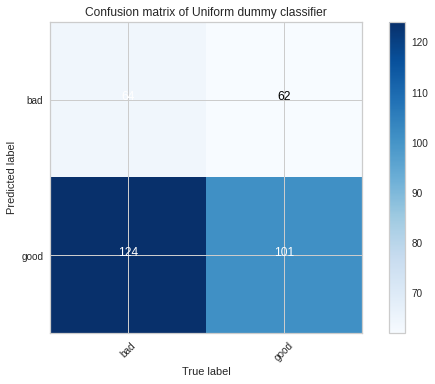

In [ ]:
cm = confusion_matrix(np.concatenate((y_train,y_test), axis=0), dc_uniform_predict)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
plot_confusion_matrix(cm, ['bad', 'good'],title='Confusion matrix of Uniform dummy classifier')

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(np.concatenate((y_train,y_test), axis=0), dc_uniform_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_dc_uniform= list(precision_recall_fscore_support(np.concatenate((y_train,y_test), axis=0), dc_uniform_predict, average='micro'))
micro_dc_uniform .pop(3) # tou support
precision_micro_dc_uniform  = micro_dc_uniform [0]
recall_micro_dc_uniform  = micro_dc_uniform[1]
f1_micro_dc_uniform  = micro_dc_uniform [2]
print(micro_dc_uniform )

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_dc_uniform  = list(precision_recall_fscore_support(np.concatenate((y_train,y_test), axis=0), dc_uniform_predict, average='macro'))
macro_dc_uniform .pop(3) # tou support
precision_macro_dc_uniform  = macro_dc_uniform[0]
recall_macro_dc_uniform  = macro_dc_uniform [1]
f1_macro_dc_uniform = macro_dc_uniform[2]
print(macro_dc_uniform )
print()
print("All the details shown here:")
print()
print(classification_report(np.concatenate((y_train,y_test), axis=0),  dc_uniform_predict, target_names=['bad','good'] ) )

(array([0.34042553, 0.6196319 ]), array([0.50793651, 0.44888889]), array([0.40764331, 0.52061856]), array([126, 225])) 

[0.4700854700854701, 0.4700854700854701, 0.4700854700854701]
[0.4800287168776922, 0.4784126984126984, 0.4641309344014708]

All the details shown here:

              precision    recall  f1-score   support

         bad       0.34      0.51      0.41       126
        good       0.62      0.45      0.52       225

    accuracy                           0.47       351
   macro avg       0.48      0.48      0.46       351
weighted avg       0.52      0.47      0.48       351



### Dummy Constant good 

In [ ]:
dc_constant_g = DummyClassifier(strategy="constant", constant='g')
model_constant_g = dc_constant_g.fit(X_train, y_train)
dc_constant_g_predict = dc_constant_g.predict(X_test)
print("Predictions for Constant 'g' dummy classifie:"+"\n"+" {}".format(dc_constant_g_predict))
print()

scores_constant_g_micro = cross_val_score(model_constant_g, np.concatenate((X_train,X_test), axis=0), np.concatenate((y_train,y_test), axis=0), 
                         cv=KFold(n_splits=10), 
                         scoring="f1_micro")
scores_constant_g_macro = cross_val_score(model_constant_g, np.concatenate((X_train,X_test), axis=0), np.concatenate((y_train,y_test), axis=0), 
                         cv=KFold(n_splits=10), 
                         scoring="f1_macro")

print("Constant 'g' dummy classifie CV f1_micro score = %f +-%f" % (100*np.mean(scores_constant_g_micro), 100*np.std(scores_constant_g_micro)))
print("Constant 'g' dummy classifie CV f1_macro score = %f +-%f" % (100*np.mean(scores_constant_g_macro), 100*np.std(scores_constant_g_macro)))

Predictions for Constant 'g' dummy classifie:
 ['g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g'
 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g'
 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g'
 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g']

Constant 'g' dummy classifie CV f1_micro score = 64.087302 +-6.354289
Constant 'g' dummy classifie CV f1_macro score = 38.962289 +-2.443106


0 25 0 46


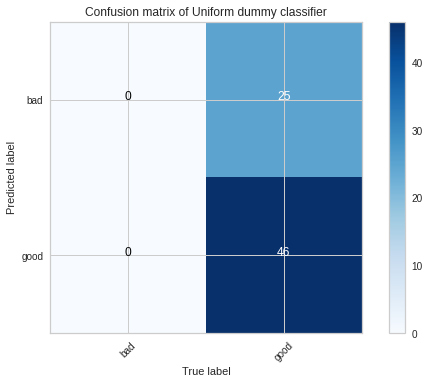

In [ ]:
cm = confusion_matrix(y_test, dc_constant_g_predict)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
plot_confusion_matrix(cm, ['bad', 'good'],title='Confusion matrix of Uniform dummy classifier')

In [ ]:
matrix = classification_report(y_test, dc_constant_g_predict, target_names=['bad','good'])
print(matrix)
matrix_list = matrix.split()
precision_b_dc_constant_g = matrix_list[5]
recall_b_dc_constant_g =matrix_list[6]
f1_b_dc_constant_g = matrix_list[7]
precision_g_dc_constant_g =matrix_list[10]
recall_g_dc_constant_g =matrix_list[11]
f1_g_dc_constant_g = matrix_list[12]

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        25
        good       0.65      1.00      0.79        46

    accuracy                           0.65        71
   macro avg       0.32      0.50      0.39        71
weighted avg       0.42      0.65      0.51        71



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


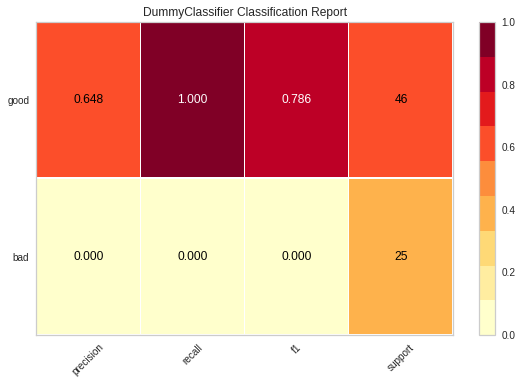

In [ ]:
# plot classification report
visualizer = ClassificationReport(dc_constant_g, classes=['bad','good'], support=True)
visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof();

Αναμενόμενο οι τιμές για το bad να βγουν μηδέν επειδή ο ταξινομιτής βάζει όλα τα data ως 'good'

### Dummy Constant Bad

In [ ]:
dc_constant_b = DummyClassifier(strategy="constant", constant='b')
model_constant_b = dc_constant_b.fit(X_train, y_train)
dc_constant_b_predict = dc_constant_b.predict(X_test)
print("Predictions for Constant 'b' dummy classifie:"+"\n"+" {}".format(dc_constant_b_predict))
print()

scores_constant_b_micro = cross_val_score(model_constant_b, np.concatenate((X_train,X_test), axis=0), np.concatenate((y_train,y_test), axis=0), 
                         cv=KFold(n_splits=10), 
                         scoring="f1_micro")
scores_constant_b_macro = cross_val_score(model_constant_b, np.concatenate((X_train,X_test), axis=0), np.concatenate((y_train,y_test), axis=0), 
                         cv=KFold(n_splits=10), 
                         scoring="f1_macro")

print("Constant 'b' dummy classifie CV f1_micro score = %f +-%f" % (100*np.mean(scores_constant_b_micro), 100*np.std(scores_constant_b_micro)))
print("Constant 'b' dummy classifie CV f1_macro score = %f +-%f" % (100*np.mean(scores_constant_b_macro), 100*np.std(scores_constant_b_macro)))

Predictions for Constant 'b' dummy classifie:
 ['b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b'
 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b'
 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b'
 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b']

Constant 'b' dummy classifie CV f1_micro score = 35.912698 +-6.354289
Constant 'b' dummy classifie CV f1_macro score = 26.267597 +-3.334979


25 0 46 0


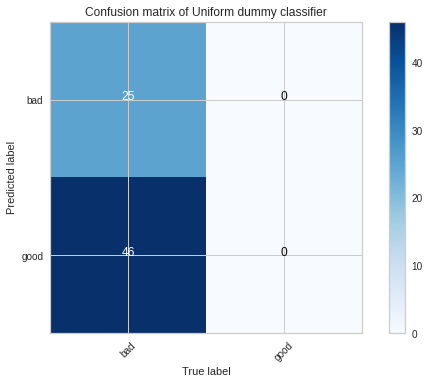

In [ ]:
cm = confusion_matrix(y_test, dc_constant_b_predict)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
plot_confusion_matrix(cm, ['bad', 'good'],title='Confusion matrix of Uniform dummy classifier')

In [ ]:
matrix = classification_report(y_test, dc_constant_b_predict, target_names=['bad','good'])
print(matrix)
matrix_list = matrix.split()
precision_b_dc_constant_b = matrix_list[5]
recall_b_dc_constant_b =matrix_list[6]
f1_b_dc_constant_b = matrix_list[7]
precision_g_dc_constant_b =matrix_list[10]
recall_g_dc_constant_b =matrix_list[11]
f1_g_dc_constant_b = matrix_list[12]

              precision    recall  f1-score   support

         bad       0.35      1.00      0.52        25
        good       0.00      0.00      0.00        46

    accuracy                           0.35        71
   macro avg       0.18      0.50      0.26        71
weighted avg       0.12      0.35      0.18        71



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


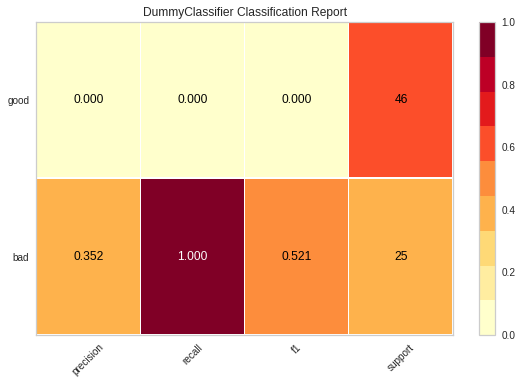

In [ ]:
# plot classification report
visualizer = ClassificationReport(dc_constant_b, classes=['bad','good'], support=True)
visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof();

###Dummy most frequent

In [ ]:
dc_most_frequent = DummyClassifier(strategy="most_frequent")
model_most_frequent = dc_most_frequent.fit(X_train, y_train)
dc_most_frequent_predict = dc_most_frequent.predict(X_test)
print("Predictions for Most frequent dummy classifier:"+"\n"+" {}".format(dc_most_frequent_predict))
print()

scores_most_frequent_micro = cross_val_score(model_most_frequent, np.concatenate((X_train,X_test), axis=0), np.concatenate((y_train,y_test), axis=0), 
                         cv=KFold(n_splits=10), 
                         scoring="f1_micro")
scores_most_frequent_macro = cross_val_score(model_most_frequent, np.concatenate((X_train,X_test), axis=0), np.concatenate((y_train,y_test), axis=0), 
                         cv=KFold(n_splits=10), 
                         scoring="f1_macro")
print("Most frequent dummy classifier CV f1_micro score = %f +-%f" % (100*np.mean(scores_most_frequent_micro), 100*np.std(scores_most_frequent_micro)))
print("Most frequent dummy classifier CV f1_macro score = %f +-%f" % (100*np.mean(scores_most_frequent_macro), 100*np.std(scores_most_frequent_macro)))


Predictions for Most frequent dummy classifier:
 ['g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g'
 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g'
 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g'
 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g']

Most frequent dummy classifier CV f1_micro score = 64.087302 +-6.354289
Most frequent dummy classifier CV f1_macro score = 38.962289 +-2.443106


0 25 0 46


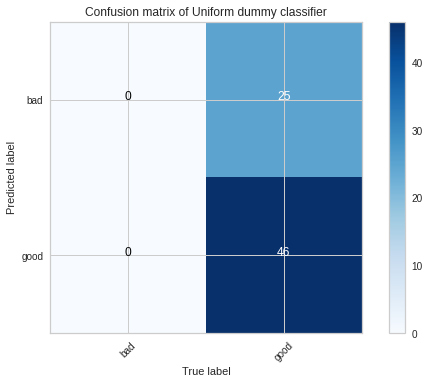

In [ ]:
cm = confusion_matrix(y_test, dc_most_frequent_predict)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
plot_confusion_matrix(cm, ['bad', 'good'],title='Confusion matrix of Uniform dummy classifier')

In [ ]:
matrix = classification_report(y_test, dc_most_frequent_predict, target_names=['bad','good'])
print(matrix)
matrix_list = matrix.split()
precision_b_dc_most_frequent = matrix_list[5]
recall_b_dc_most_frequent =matrix_list[6]
f1_b_dc_most_frequent = matrix_list[7]
precision_g_dc_most_frequent =matrix_list[10]
recall_g_dc_most_frequent =matrix_list[11]
f1_g_dc_most_frequent = matrix_list[12]

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        25
        good       0.65      1.00      0.79        46

    accuracy                           0.65        71
   macro avg       0.32      0.50      0.39        71
weighted avg       0.42      0.65      0.51        71



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


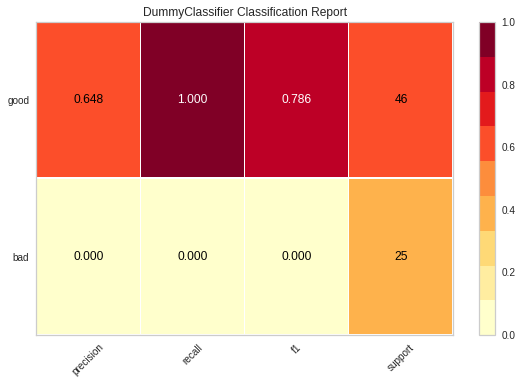

In [ ]:
# plot classification report
visualizer = ClassificationReport(dc_most_frequent, classes=['bad','good'], support=True)
visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof();

###Dummy stratified

In [ ]:
dc_stratified = DummyClassifier(strategy="stratified")
model_stratified = dc_stratified.fit(X_train, y_train)
dc_stratified_predict = dc_stratified.predict(X_test)
print("Predictions for Stratified dummy classifier:"+"\n"+" {}".format(dc_stratified_predict))
print()

scores_most_stratified_micro = cross_val_score(model_stratified , np.concatenate((X_train,X_test), axis=0), np.concatenate((y_train,y_test), axis=0), 
                         cv=KFold(n_splits=10), 
                         scoring="f1_micro")
scores_most_stratified_macro = cross_val_score(model_stratified , np.concatenate((X_train,X_test), axis=0), np.concatenate((y_train,y_test), axis=0), 
                         cv=KFold(n_splits=10), 
                         scoring="f1_macro")


print("Stratified dummy classifier CV f1_micro score = %f +-%f" % (100*np.mean(scores_most_stratified_micro), 100*np.std(scores_most_stratified_micro)))
print("Stratified dummy classifier CV f1_macro score = %f +-%f" % (100*np.mean(scores_most_stratified_macro), 100*np.std(scores_most_stratified_macro)))

Predictions for Stratified dummy classifier:
 ['g' 'b' 'g' 'g' 'g' 'b' 'b' 'g' 'b' 'b' 'g' 'g' 'b' 'g' 'b' 'g' 'g' 'g'
 'b' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g'
 'b' 'g' 'b' 'b' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'b' 'g' 'g' 'g' 'b' 'g'
 'b' 'g' 'g' 'b' 'g' 'b' 'b' 'g' 'g' 'b' 'g' 'g' 'b' 'b' 'b' 'g' 'b']

Stratified dummy classifier CV f1_micro score = 55.000000 +-6.616306
Stratified dummy classifier CV f1_macro score = 49.617673 +-7.225760


6 19 19 27


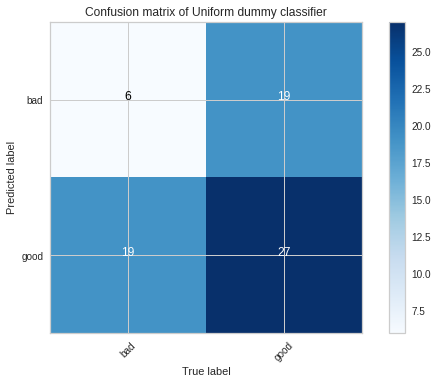

In [ ]:
cm = confusion_matrix(y_test, dc_stratified_predict)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
plot_confusion_matrix(cm, ['bad', 'good'],title='Confusion matrix of Uniform dummy classifier')

In [ ]:
matrix = classification_report(y_test, dc_stratified_predict, target_names=['bad','good'])
print(matrix)
matrix_list = matrix.split()
precision_b_dc_stratified = matrix_list[5]
recall_b_dc_stratified =matrix_list[6]
f1_b_dc_stratified = matrix_list[7]
precision_g_dc_stratified =matrix_list[10]
recall_g_dc_stratified =matrix_list[11]
f1_g_dc_stratified = matrix_list[12]

              precision    recall  f1-score   support

         bad       0.24      0.24      0.24        25
        good       0.59      0.59      0.59        46

    accuracy                           0.46        71
   macro avg       0.41      0.41      0.41        71
weighted avg       0.46      0.46      0.46        71



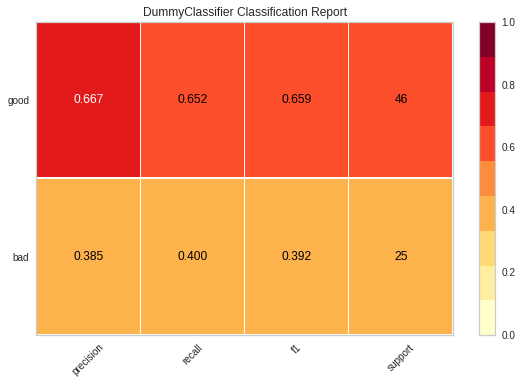

In [ ]:
# plot classification report
visualizer = ClassificationReport(dc_stratified, classes=['bad','good'], support=True)
visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof();

##Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

#GaussianNB_predict = clf.predict(X_test)
GaussianNB_predict = cross_val_predict(clf, np.concatenate((X_train,X_test), axis=0), 
                           np.concatenate((y_train,y_test), axis=0), cv=KFold(n_splits=10))

print("Predictions for Gaussian Naive Bayes classifier:"+"\n"+" {}".format(GaussianNB_predict))
print()

GaussianNB_micro = cross_val_score(clf, np.concatenate((X_train,X_test), axis=0), np.concatenate((y_train,y_test), axis=0), 
                         cv=KFold(n_splits=10), scoring="f1_micro")
GaussianNB_macro = cross_val_score(clf, np.concatenate((X_train,X_test), axis=0), np.concatenate((y_train,y_test), axis=0), 
                         cv=KFold(n_splits=10), scoring="f1_macro")

print("Gaussian Naive Bayes classifier CV f1_micro score = %f +-%f" % (100*np.mean(GaussianNB_micro), 100*np.std(GaussianNB_micro)))
print("Gaussian Naive Bayes classifier CV f1_macro score = %f +-%f" % (100*np.mean(GaussianNB_macro), 100*np.std(GaussianNB_macro)))

Predictions for Gaussian Naive Bayes classifier:
 ['g' 'g' 'g' 'g' 'g' 'b' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g'
 'g' 'g' 'g' 'g' 'g' 'b' 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'b' 'g' 'b'
 'b' 'b' 'b' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'g'
 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'b' 'b' 'b' 'g' 'g' 'g' 'b' 'g' 'g' 'b' 'g'
 'b' 'g' 'b' 'b' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'b' 'g' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'b' 'g'
 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'g'
 'g' 'g' 'b' 'b' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g'
 'b' 'g' 'g' 'b' 'b' 'b' 'g' 'g' 'b' 'b' 'g' 'b' 'b' 'b' 'g' 'g' 'g' 'g'
 'g' 'b' 'g' 'b' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'b' 'g' 'b' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'b' 'b' 'g' 'b' 'g' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'b' 'g' 'g' 'g'
 'g' 'g' 'b' 'g' 'g' 'g' 'b' 'b' 'g' 'g' 'b' 'g' 'b' 'g' 'g' 'b' 'g' 'g'
 

95 31 6 219


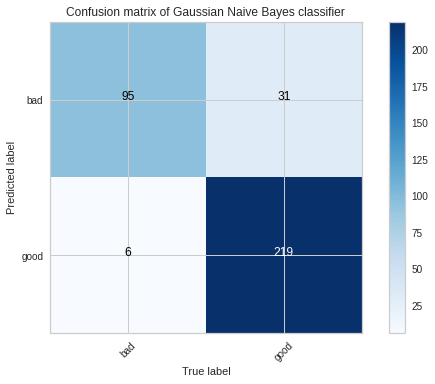

In [ ]:
cm = confusion_matrix(np.concatenate((y_train,y_test), axis=0), GaussianNB_predict)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
plot_confusion_matrix(cm, ['bad', 'good'],title='Confusion matrix of Gaussian Naive Bayes classifier')

In [ ]:
### me ayth thn synarthsh epibabaiwnnw oti evala swsta ta labels
### vlepw ;oti eipa oti 49 data htan good ek twn opoiwn ta 44 htan ontws good
cnt=0
for i,val in enumerate(GaussianNB_predict):
  if (val=='g'):
    cnt+=1
print(cnt)

250


In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(np.concatenate((y_train,y_test), axis=0), GaussianNB_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_GNB = list(precision_recall_fscore_support(np.concatenate((y_train,y_test), axis=0), GaussianNB_predict, average='micro'))
micro_GNB.pop(3) # tou support
precision_micro_GNB = micro_GNB[0]
recall_micro_GNB = micro_GNB[1]
f1_micro_GNB = micro_GNB[2]
print(micro_GNB)

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_GNB = list(precision_recall_fscore_support(np.concatenate((y_train,y_test), axis=0), GaussianNB_predict, average='macro'))
macro_GNB.pop(3) # tou support
precision_macro_GNB = macro_GNB[0]
recall_macro_GNB = macro_GNB[1]
f1_macro_GNB = macro_GNB[2]
print(macro_GNB)
print()
print("All the details shown here:")
print()
print(classification_report(np.concatenate((y_train,y_test), axis=0), GaussianNB_predict, target_names=['bad','good'] ) )

(array([0.94059406, 0.876     ]), array([0.75396825, 0.97333333]), array([0.83700441, 0.92210526]), array([126, 225])) 

[0.8945868945868946, 0.8945868945868946, 0.8945868945868946]
[0.9082970297029702, 0.8636507936507937, 0.8795548342221191]

All the details shown here:

              precision    recall  f1-score   support

         bad       0.94      0.75      0.84       126
        good       0.88      0.97      0.92       225

    accuracy                           0.89       351
   macro avg       0.91      0.86      0.88       351
weighted avg       0.90      0.89      0.89       351



##kΝΝ

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)


#KNN_predict = clf.predict(X_test)
KNN_predict = cross_val_predict(clf, np.concatenate((X_train,X_test), axis=0), 
                           np.concatenate((y_train,y_test), axis=0), cv=KFold(n_splits=10))
print("Predictions for KNN classifier:"+"\n"+" {}".format(KNN_predict ))
print()

KNN_micro = cross_val_score(clf, np.concatenate((X_train,X_test), axis=0), np.concatenate((y_train,y_test), axis=0), 
                         cv=KFold(n_splits=10), 
                         scoring="f1_micro")
KNN_macro = cross_val_score(clf, np.concatenate((X_train,X_test), axis=0), np.concatenate((y_train,y_test), axis=0), 
                         cv=KFold(n_splits=10), 
                         scoring="f1_macro")

print("KNN classifier CV f1_micro score = %f +-%f" % (100*np.mean(KNN_micro), 100*np.std(KNN_micro)))
print("KNN classifier CV f1_macro score = %f +-%f" % (100*np.mean(KNN_macro), 100*np.std(KNN_macro)))


Predictions for KNN classifier:
 ['g' 'g' 'g' 'b' 'b' 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g'
 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'b'
 'b' 'b' 'b' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'g'
 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'b' 'b' 'b' 'g' 'g' 'g' 'b' 'g' 'g' 'b' 'g'
 'b' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'b' 'b' 'g' 'g' 'b' 'g'
 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g'
 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'b'
 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g'
 'b' 'g' 'g' 'b' 'g' 'b' 'g' 'g' 'b' 'b' 'g' 'g' 'b' 'b' 'g' 'g' 'g' 'g'
 'g' 'b' 'g' 'g' 'b' 'b' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'b' 'b' 'b'
 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'b' 'g' 'b' 'b' 'g' 'b' 'g' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'b' 'g' 'g' 'g'
 'g' 'g' 'b' 'g' 'g' 'g' 'b' 'b' 'g' 'g' 'b' 'g' 'b' 'g' 'g' 'b' 'g' 'g'
 'g' 'g' 'b' 'g' '

88 38 6 219


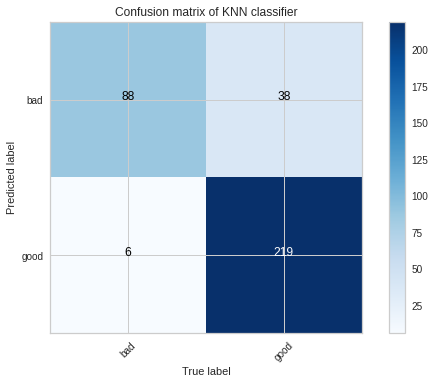

In [ ]:
cm = confusion_matrix(np.concatenate((y_train,y_test), axis=0), KNN_predict)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
plot_confusion_matrix(cm, ['bad', 'good'],title='Confusion matrix of KNN classifier')

In [ ]:
clf.predict(X_test)
cnt=0
for i,val in enumerate(KNN_predict):
  if (val=='g'):
    cnt+=1
print(cnt)

257


In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(np.concatenate((y_train,y_test), axis=0), KNN_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_KNN = list(precision_recall_fscore_support(np.concatenate((y_train,y_test), axis=0), KNN_predict, average='micro'))
micro_KNN .pop(3) # tou support
precision_micro_KNN  = micro_KNN [0]
recall_micro_KNN  = micro_KNN [1]
f1_micro_KNN  = micro_KNN [2]
print(micro_KNN )

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_KNN  = list(precision_recall_fscore_support(np.concatenate((y_train,y_test), axis=0), KNN_predict, average='macro'))
macro_KNN .pop(3) # tou support
precision_macro_KNN  = macro_KNN [0]
recall_macro_KNN  = macro_KNN [1]
f1_macro_KNN  = macro_KNN [2]
print(macro_KNN )
print()
print("All the details shown here:")
print()
print(classification_report(np.concatenate((y_train,y_test), axis=0),  KNN_predict, target_names=['bad','good'] ) )

(array([0.93617021, 0.85214008]), array([0.6984127 , 0.97333333]), array([0.8       , 0.90871369]), array([126, 225])) 

[0.8746438746438746, 0.8746438746438746, 0.8746438746438746]
[0.8941551452934846, 0.8358730158730159, 0.8543568464730291]

All the details shown here:

              precision    recall  f1-score   support

         bad       0.94      0.70      0.80       126
        good       0.85      0.97      0.91       225

    accuracy                           0.87       351
   macro avg       0.89      0.84      0.85       351
weighted avg       0.88      0.87      0.87       351



##Σύγκριση Ταξινομητών

Αν θεωρήσουμε το good ώς possitive,δηλαδή ως αυτό που θέλουμε να εντωπίσουμε έχουμε:

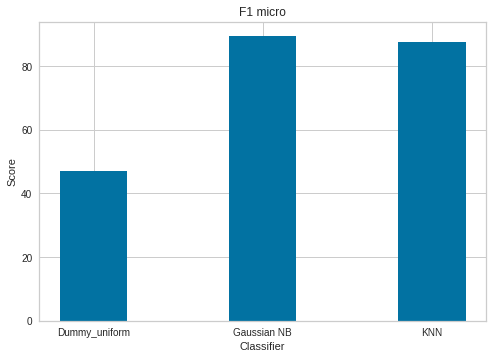

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x = ['Dummy_uniform','Gaussian NB','KNN',]
y=[100*f1_micro_dc_uniform,100*f1_micro_GNB,100*f1_micro_KNN]
plt.bar(x,y, align='center', width=0.4)
plt.xticks(x,x)
plt.title('F1 micro')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.show()

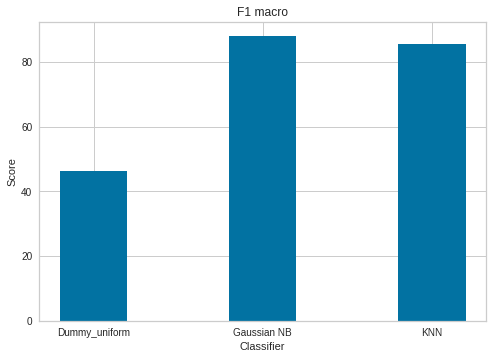

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x = ['Dummy_uniform','Gaussian NB','KNN',]
y=[100*f1_macro_dc_uniform,100*f1_macro_GNB,100*f1_macro_KNN]
plt.bar(x,y, align='center', width=0.4)
plt.xticks(x,x)
plt.title('F1 macro')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.show()

##Βελτιστοποίηση ταξινομητών

In [ ]:
param_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]} 

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True,  cv = 10, n_jobs = -1,scoring="f1_micro")
%time grid.fit(X_train, y_train)  # austira to train set!
print("Best parameters regarding f1_micro is = " +str(grid.best_params_))
print()
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True,  cv = 10, n_jobs = -1,scoring="f1_macro")
%time grid.fit(X_train, y_train)  # austira to train set!
print("Best parameters regarding f1_macro is = " +str(grid.best_params_))

CPU times: user 120 ms, sys: 5.62 ms, total: 126 ms
Wall time: 454 ms
Best parameters regarding f1_micro is = {'n_neighbors': 2}

CPU times: user 121 ms, sys: 3.25 ms, total: 124 ms
Wall time: 438 ms
Best parameters regarding f1_macro is = {'n_neighbors': 2}


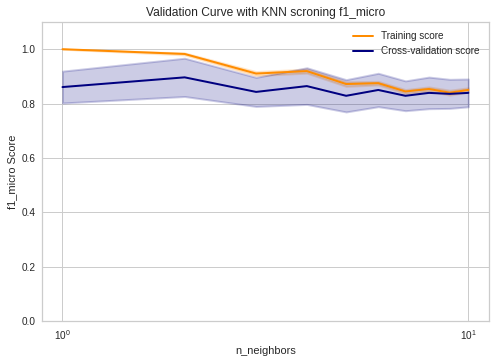

In [ ]:
param_range = [1,2,3,4,5,6,7,8,9,10]
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_train, y_train,  param_name="n_neighbors", param_range=param_range,
    scoring="f1_micro", n_jobs=-1,cv = 10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with KNN scroning f1_micro")
plt.xlabel("n_neighbors")
plt.ylabel("f1_micro Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

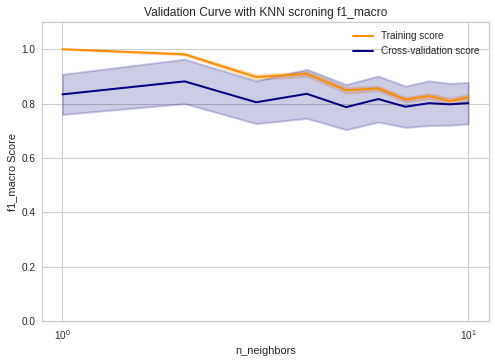

In [ ]:
param_range = [1,2,3,4,5,6,7,8,9,10]
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_train, y_train,  param_name="n_neighbors", param_range=param_range,
    scoring="f1_macro", n_jobs=-1,cv = 10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with KNN scroning f1_macro")
plt.xlabel("n_neighbors")
plt.ylabel("f1_macro Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
def plot_learning_curve(train_scores, test_scores, train_sizes,title):
    plt.figure()
    plt.grid()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    plt.legend(loc="best")
    return

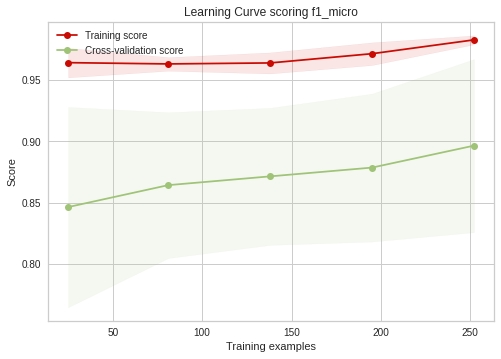

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=2), 
                                              X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 5), 
                                              cv = 10,n_jobs = -1,scoring="f1_micro")
plot_learning_curve(train_scores, test_scores, train_sizes,"Learning Curve scoring f1_micro")

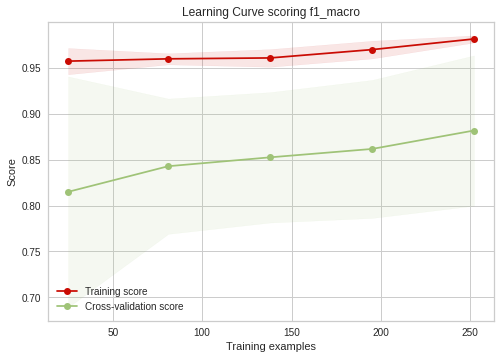

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=2), 
                                              X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 5), 
                                              cv = 10,n_jobs = -1,scoring="f1_macro")
plot_learning_curve(train_scores, test_scores, train_sizes,"Learning Curve scoring f1_macro")

Αρα ειναι underfited μοντέλο, λογικό αφού τα δεδομένα είναι πολύ λίγα.

Άρα ο καλύτερος είναι γαι ν=2

In [ ]:
clf_opt = KNeighborsClassifier(n_neighbors=2)
clf_opt .fit(X_train, y_train)


#KNN_predict = clf.predict(X_test)
KNN_predict_opt = cross_val_predict(clf_opt, np.concatenate((X_train,X_test), axis=0), 
                           np.concatenate((y_train,y_test), axis=0), cv=KFold(n_splits=10))
print("Predictions for KNN classifier:"+"\n"+" {}".format(KNN_predict ))
print()

KNN_micro_opt = cross_val_score(clf_opt, np.concatenate((X_train,X_test), axis=0), np.concatenate((y_train,y_test), axis=0), 
                         cv=KFold(n_splits=10), 
                         scoring="f1_micro")
KNN_macro_opt = cross_val_score(clf_opt, np.concatenate((X_train,X_test), axis=0), np.concatenate((y_train,y_test), axis=0), 
                         cv=KFold(n_splits=10), 
                         scoring="f1_macro")

print("KNN classifier CV f1_micro score = %f +-%f" % (100*np.mean(KNN_micro_opt), 100*np.std(KNN_micro_opt)))
print("KNN classifier CV f1_macro score = %f +-%f" % (100*np.mean(KNN_macro_opt), 100*np.std(KNN_macro_opt)))


Predictions for KNN classifier:
 ['g' 'g' 'g' 'b' 'b' 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g'
 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'b'
 'b' 'b' 'b' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'g'
 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'b' 'b' 'b' 'g' 'g' 'g' 'b' 'g' 'g' 'b' 'g'
 'b' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'b' 'b' 'g' 'g' 'b' 'g'
 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g'
 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'b'
 'g' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g'
 'b' 'g' 'g' 'b' 'g' 'b' 'g' 'g' 'b' 'b' 'g' 'g' 'b' 'b' 'g' 'g' 'g' 'g'
 'g' 'b' 'g' 'g' 'b' 'b' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'g' 'b' 'b' 'b'
 'g' 'b' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'b' 'g' 'b' 'b' 'g' 'b' 'g' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'g' 'g' 'g' 'g' 'b' 'g' 'g' 'b' 'g' 'g' 'g'
 'g' 'g' 'b' 'g' 'g' 'g' 'b' 'b' 'g' 'g' 'b' 'g' 'b' 'g' 'g' 'b' 'g' 'g'
 'g' 'g' 'b' 'g' '

97 29 8 217


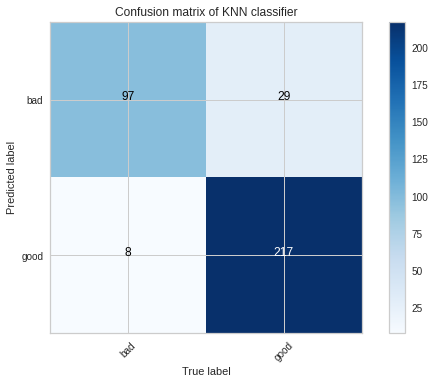

In [ ]:
cm = confusion_matrix(np.concatenate((y_train,y_test), axis=0), KNN_predict_opt)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
plot_confusion_matrix(cm, ['bad', 'good'],title='Confusion matrix of KNN classifier')

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(np.concatenate((y_train,y_test), axis=0), KNN_predict_opt, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_KNN_opt = list(precision_recall_fscore_support(np.concatenate((y_train,y_test), axis=0), KNN_predict_opt, average='micro'))
micro_KNN_opt.pop(3) # tou support
precision_micro_KNN_opt  = micro_KNN_opt [0]
recall_micro_KNN_opt  = micro_KNN_opt [1]
f1_micro_KNN_opt  = micro_KNN_opt [2]
print(micro_KNN_opt )

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_KNN_opt  = list(precision_recall_fscore_support(np.concatenate((y_train,y_test), axis=0), KNN_predict_opt, average='macro'))
macro_KNN_opt.pop(3) # tou support
precision_macro_KNN_opt = macro_KNN_opt [0]
recall_macro_KNN_opt  = macro_KNN_opt [1]
f1_macro_KNN_opt  = macro_KNN_opt [2]
print(macro_KNN_opt)
print()
print("All the details shown here:")
print()
print(classification_report(np.concatenate((y_train,y_test), axis=0),  KNN_predict_opt, target_names=['bad','good'] ) )

(array([0.92380952, 0.88211382]), array([0.76984127, 0.96444444]), array([0.83982684, 0.92144374]), array([126, 225])) 

[0.8945868945868946, 0.8945868945868946, 0.8945868945868946]
[0.9029616724738676, 0.8671428571428572, 0.8806352882786004]

All the details shown here:

              precision    recall  f1-score   support

         bad       0.92      0.77      0.84       126
        good       0.88      0.96      0.92       225

    accuracy                           0.89       351
   macro avg       0.90      0.87      0.88       351
weighted avg       0.90      0.89      0.89       351



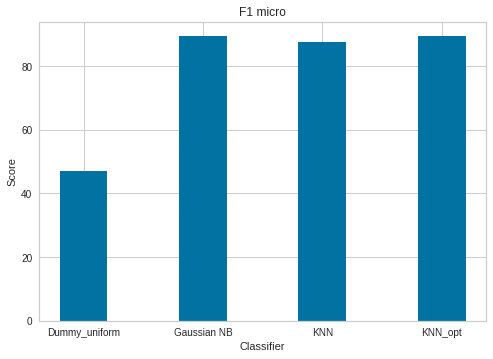

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x = ['Dummy_uniform','Gaussian NB','KNN','KNN_opt']
y=[100*f1_micro_dc_uniform,100*f1_micro_GNB,100*f1_micro_KNN,100*f1_micro_KNN_opt]
plt.bar(x,y, align='center', width=0.4)
plt.xticks(x,x)
plt.title('F1 micro')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.show()

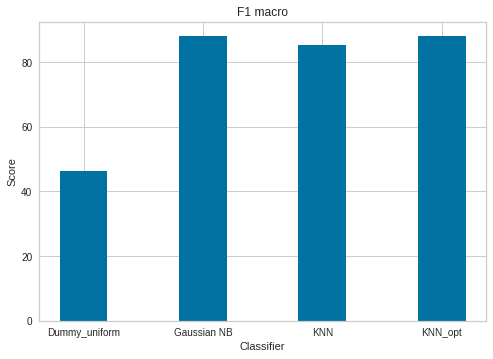

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x = ['Dummy_uniform','Gaussian NB','KNN','KNN_opt']
y=[100*f1_macro_dc_uniform,100*f1_macro_GNB,100*f1_macro_KNN,100*f1_macro_KNN_opt]
plt.bar(x,y, align='center', width=0.4)
plt.xticks(x,x)
plt.title('F1 macro')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.show()

#Μέρος 2ο

##Πληροφορίες Epileptic Seizure Recognition DataSet

Το αρχικό Data Set αποτελείται από 5 διαφορετικούς φακέλους, που ο καθένας περιέχει 100 αρχεία, με κάθε αρχείο να περιγράφει ένα άτομο. Κάθε αρχείο περιέχει μια καταγραφή εγκεφαλικής δραστηριότητας, 23.6 δευτερολέπτων. Η αντίστοιχη χρονική ακολουθία έχει δειγματοληπτηθεί σε 4097 σημεία. Κάθε σημείο αντιστοιχεί στην τιμή της ΕΕG καταγραφής (ηλεκτροεγκεφαλογράφημα) σε μία χρονική στιγμή. Οπότε έχουμε συνολικά 500 εξεταζόμενους που στον καθένα αντιστοιχίζονται 4097 σημεία δεδομένων που ελήφθησαν σε χρονική διάρκεια 23.5 sec.

To αρχικό αυτό Data Set χωρίστηκε και ανακατεύθηκε, ώστε κάθε 4097 δεδομένα να χωριστούν σε 23 κομμάτια, όπου κάθε κομμάτι περιέχει 178 σημεία για ένα δευτερόλεπτο και κάθε δεδομένο αντιστοιχεί στην τιμή του EEG μια δεδομένη χρονική στιγμή. Οπότε έχουμε 23*500 = 11500 κομμάτια πληροφορίας(γραμμή) και κάθε μία περιέχει 178 δεδομένα που αφορούν ένα δευτερόλεπτο(στήλες). Η τελευταία στήλη (179) αναπαριστά το label της κατάστασης {1,2,3,4,5} του ατόμου που περιγράφεται από ένα κομμάτι πληροφορίας. Συγκεκριμένα κάθε κλάση αντιστοιχεί στην εξής κατάσταση:

1. Επιληπτική δραστηριότητα.
2. Περιοχή με παρουσία όγκου και καταγραφή EEG από εκείνη την περιοχή
3. Παρουσία όγκου αλλά καταγραφή EEG από υγιή περιοχή.
4. Κλειστά μάτια κατά την καταγραφή.
5. Ανοιχτά μάτια κατά την καταγραφή.

Αν και έχουμε 5 κλάσεις, μόνο η κλάση 1 περιγράφει επιληπτικό φαινόμενο, ενώ οι 2,3,4,5 όχι. Όπως αναφέρεται, οι περισσότεροι ερευνητές πραγματοποιούν binary classification στο Data Set αυτό με κλάση "Epileptic Seizure" την κλάση 1 και "Non Epileptic Seizure" τις κλάσεις 2,3,4,5. Έτσι θα αντιμετωπίσουμε κι εμείς το εν λόγω Data Set οπότε πολλά βήματα της επεξεργασίας του θα γίνουν με ανάλογο τρόπο με το μικρό Data Set, Ionosphere Data.

*Το αρχείο έχει τη μορφή csv*

#Βήμα 1

>Θα εισάγουμε τα δεδομένα σε dataframes απευθείας από τα αρχεία που βρίσκονται αποθηκευμένα στο drive μας.

In [ ]:
df1 = pd.read_csv("/content/drive/My Drive/Neural_Networks/lab1/big/data.csv", sep=" ", header=None)

In [ ]:
df1

,0
0,",""X1"",""X2"",""X3"",""X4"",""X5"",""X6"",""X7"",""X8"",""X9"",..."
1,"X21.V1.791,135,190,229,223,192,125,55,-9,-33,-..."
2,"X15.V1.924,386,382,356,331,320,315,307,272,244..."
3,"X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-9..."
4,"X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,..."
...,...
11496,"X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45..."
11497,"X19.V1.354,-47,-11,28,77,141,211,246,240,193,1..."
11498,"X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,-1,-10,..."
11499,"X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,29,22,..."


Επομένως βλέπουμε ότι τα δεδομένα μας δεν είναι χωρισμένα σε κολόνες, όπως θα περιμέναμε, για να γίνεται πιο κατανοητή η αναπαράσταση του διανύσματος, οπότε θα κάνουμε κατάλληλη μετατροπή των δεδομένων διαχωρίζοντας τα χαρακτηριστικά σε στήλες (**ερώτημα 5**). Επίσης, από την παραπάνω μορφή, παρατηρούμε ότι  υπάρχει τόσο αρίθμηση γραμμών όσο επικεφαλίδες στα δείγματα (**ερώτημα 3**)

In [ ]:
mylist=[]
for i in range(0,11501):
  mylist.append(df1.values.tolist()[i][0].split(','))
'''
labels = []
for i in range(0,34):
  labels.append("Feature_"+str(i))
labels.append("Label")
'''

'\nlabels = []\nfor i in range(0,34):\n  labels.append("Feature_"+str(i))\nlabels.append("Label")\n'

In [ ]:
labels = []
for i in range(0,179):
  labels.append("X"+str(i))
labels.append("Label")

In [ ]:
#df = pd.DataFrame(mylist, columns = labels)
df = pd.DataFrame(mylist, columns = labels)
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,Label
0,,"""X1""","""X2""","""X3""","""X4""","""X5""","""X6""","""X7""","""X8""","""X9""","""X10""","""X11""","""X12""","""X13""","""X14""","""X15""","""X16""","""X17""","""X18""","""X19""","""X20""","""X21""","""X22""","""X23""","""X24""","""X25""","""X26""","""X27""","""X28""","""X29""","""X30""","""X31""","""X32""","""X33""","""X34""","""X35""","""X36""","""X37""","""X38""","""X39""",...,"""X140""","""X141""","""X142""","""X143""","""X144""","""X145""","""X146""","""X147""","""X148""","""X149""","""X150""","""X151""","""X152""","""X153""","""X154""","""X155""","""X156""","""X157""","""X158""","""X159""","""X160""","""X161""","""X162""","""X163""","""X164""","""X165""","""X166""","""X167""","""X168""","""X169""","""X170""","""X171""","""X172""","""X173""","""X174""","""X175""","""X176""","""X177""","""X178""","""y"""
1,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
2,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
3,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
4,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11496,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,-57,-64,-73,-79,-76,-70,-63,-57,-57,-50,-45,-34,-33,-32,-30,-24,-24,-18,-9,-2,0,2,-3,-5,-13,-23,-39,-53,-59,...,45,55,60,69,68,58,54,44,40,38,39,39,32,23,22,14,13,15,18,20,20,25,28,29,29,29,26,24,24,20,15,16,12,5,-1,-18,-37,-47,-48,2
11497,X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,78,8,-66,-132,-180,-210,-227,-225,-212,-192,-168,-144,-117,-88,-54,-21,6,29,46,60,76,92,110,128,152,171,150,91,21,...,69,58,38,16,25,75,165,260,343,406,456,471,461,412,319,175,-5,-171,-293,-357,-378,-370,-346,-316,-278,-241,-201,-162,-126,-94,-65,-33,-7,14,27,48,77,117,170,1
11498,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,-1,-10,14,44,77,61,42,32,29,22,26,35,81,66,50,57,91,121,111,73,38,23,35,21,11,-12,2,17,61,...,-90,-62,-38,-40,-21,-23,-11,-4,-9,-22,-42,-49,-48,-40,-40,-46,-43,-67,-67,-50,-18,-14,-39,-74,-86,-75,-68,-57,-78,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11499,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,29,22,6,1,-28,-37,-35,-35,-45,-64,-105,-140,-157,-157,-147,-153,-147,-126,-112,-83,-56,-41,-40,-38,-34,-47,-41,-40,-42,-49,...,-98,-77,-60,-73,-88,-97,-118,-108,-100,-97,-91,-109,-122,-134,-137,-107,-95,-67,-54,-40,-31,-19,7,22

Έτσι παρατηρούμε ότι τα features είναι διακριτά αριθμητικά και τα labels των class που ανήκουν τα δεδομένα είναι διατεταγμένα(αν θεωρήσουμε το είδος της κλάσης ως χαρακτηριστικό και λάβουμε υπόψιν ότι η σοβαρότητα της πάθησης αυξάνεται κατά κάποιο τρόπο όσο αυξάνεται το νούμερο που της αντιστοιχεί). Με την προηγούμενη ανάλυση βλέπουμε ότι έχουμε 11500 δείγματα και οι κολώνες 1-178 περιέχουν τα features (178 features)(**ερώτημα 2**) ενώ η τελευταία κολόνα δηλαδή η 180 περιέχει το όνομα τον αριθμό της κλάσης στην οποία ανήκει το κάθε δεδομένο(έχουμε 5 κλάσεις: 1,2,3,4,5)(**ερώτημα 4**).

Η πρώτη γραμμή(0) και η πρώτη κολώνα(0) έχουν πληροφορίες μη χρήσιμες για την ταξινόμηση, τις οποίες και αφαιρούμε παρακάτω.

Στο data set εν υπάρχουν απουσιάζουσες τιμές(**ερώτημα 6**)

In [ ]:
df.drop(labels="X0",axis=1,inplace=True)
df.drop(labels=0,axis=0,inplace=True)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,Label
1,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
2,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
3,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
4,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
5,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11496,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,-57,-64,-73,-79,-76,-70,-63,-57,-57,-50,-45,-34,-33,-32,-30,-24,-24,-18,-9,-2,0,2,-3,-5,-13,-23,-39,-53,-59,-63,...,45,55,60,69,68,58,54,44,40,38,39,39,32,23,22,14,13,15,18,20,20,25,28,29,29,29,26,24,24,20,15,16,12,5,-1,-18,-37,-47,-48,2
11497,-47,-11,28,77,141,211,246,240,193,136,78,8,-66,-132,-180,-210,-227,-225,-212,-192,-168,-144,-117,-88,-54,-21,6,29,46,60,76,92,110,128,152,171,150,91,21,-29,...,69,58,38,16,25,75,165,260,343,406,456,471,461,412,319,175,-5,-171,-293,-357,-378,-370,-346,-316,-278,-241,-201,-162,-126,-94,-65,-33,-7,14,27,48,77,117,170,1
11498,14,6,-13,-16,10,26,27,-9,4,14,-1,-10,14,44,77,61,42,32,29,22,26,35,81,66,50,57,91,121,111,73,38,23,35,21,11,-12,2,17,61,88,...,-90,-62,-38,-40,-21,-23,-11,-4,-9,-22,-42,-49,-48,-40,-40,-46,-43,-67,-67,-50,-18,-14,-39,-74,-86,-75,-68,-57,-78,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11499,-40,-25,-9,-12,-2,12,7,19,22,29,22,6,1,-28,-37,-35,-35,-45,-64,-105,-140,-157,-157,-147,-153,-147,-126,-112,-83,-56,-41,-40,-38,-34,-47,-41,-40,-42,-49,-56,...,-98,-77,-60,-73,-88,-97,-118,-108,-100,-97,-91,-109,-122,-134,-137,-107,-95,-67,-54,-40,-31,-19,7,22,46,68,87,97,105,114,121,135,148,143,116,86,68,59,55,3


##y

Με την παραπάνω μετατροπή έχουμε πλέον 11500 δείγματα που το καθένα περιγράφεται από 178 χαρακτηριστικά και στην τελευταία κολόνα έχουμε την κλάση.

In [ ]:
lala =df.values
print((lala).shape)
int(lala[11499][1])

(11500, 179)


41

In [ ]:
numpy_arr = df.values 
class_list=[]
for i in range(0,11499):
  class_list.append(int(numpy_arr[i][178]))

In [ ]:
y_df = pd.DataFrame(class_list,columns = ["Class"])
y_df

,Class
0,4
1,1
2,5
3,5
4,5
...,...
11494,3
11495,2
11496,1
11497,5


Παραπάνω βλέπουμε την στήλη με τις 5 κλάσεις. Τώρα θα κάνουμε το dataset binary όπως οι περισσότεροι ερευνητες (η κλάση 1 παραμένει 1 και αφορά την επιληπτική δραστηριότητα και η κλάσεις 2,3,4,5 αντιστοιχίζονται στην κλάση 0 που αφορά την μη επιληπτική δραστηριότητα).

In [ ]:
binary_class_list = []
for i in class_list:
  if (class_list[i]!=1):
    binary_class_list.append(0) # an den exei epilipsia
  else:
    binary_class_list.append(1) # an exei

In [ ]:
y_df = pd.DataFrame(binary_class_list,columns = ["Class"])
y_df

,Class
0,0
1,1
2,0
3,0
4,0
...,...
11494,0
11495,0
11496,1
11497,0


In [ ]:
zeros=0
ones=0
for i in binary_class_list:
  if (binary_class_list[i]==0):
    zeros+=1
  else:
    ones+=1


Παρακάτω μετράμε το ποσοστό των δειγμάτων που αφορούν επιληπτική φάση(κλάση 1) και αυτό που αφορά μη επιληπτική(κλάση 0). Παρατηρούμε ότι η αναλογία είναι 20-80% δηλαδή το Data Set είναι αρκετά μη ισορροπημένο(**ερώτημα 7**).

In [ ]:
zeros=0
ones=0
for i in binary_class_list:
  if (binary_class_list[i]==0):
    zeros+=1
  else:
    ones+=1
print("Percentage of data labeled as Epileptic seizure: {:.3f}".format(ones/11499))
print("Percentage of data labeled as not Epileptic seizure: {:.3f}".format(zeros/11499))

Percentage of data labeled as Epileptic seizure: 0.200
Percentage of data labeled as not Epileptic seizure: 0.800


Αναπαριστούμε γραφικά την αναλογία αυτή σε πλήθος δειγμάτων και ποσοστό.

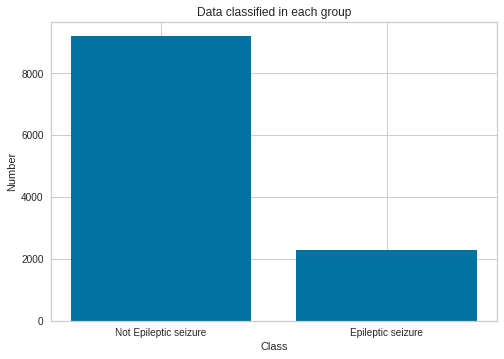

In [ ]:
priors = [zeros, ones]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x = ['Not Epileptic seizure', 'Epileptic seizure']
plt.bar(x, priors)
plt.grid()
plt.xticks(x,x)
plt.title('Data classified in each group')
plt.xlabel('Class')
plt.ylabel('Number')
plt.grid()
plt.show()

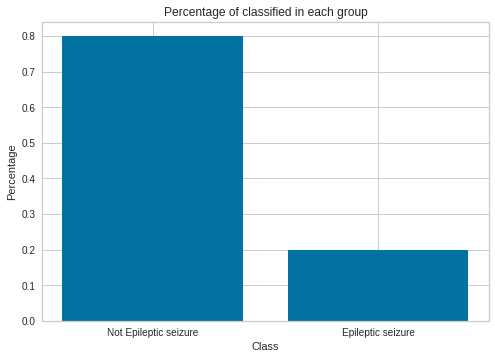

In [ ]:
priors = [zeros/11499, ones/11499]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x = ['Not Epileptic seizure', 'Epileptic seizure']
plt.bar(x, priors)
plt.grid()
plt.xticks(x,x)
plt.title('Percentage of classified in each group')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.grid()
plt.show()

## X

In [ ]:
numpy_arr = df.values 
class_list=[]
for i in range(0,11499):
  row_list=[]
  for j in range (0,178):
    row_list.append(int(numpy_arr[i][j]))
  class_list.append(row_list)

feature_names_list = []
for i in range(1,179):
  feature_names_list .append("X"+str(i))

In [ ]:
X_df = pd.DataFrame(class_list,columns = feature_names_list )
X_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,37,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11494,-39,-16,-13,-14,-68,-84,-92,-61,-89,-86,-86,-59,-11,-22,-39,-95,-139,-153,-135,-109,-85,-103,-108,-140,-149,-140,-95,-68,-32,-19,-39,-22,-21,9,16,20,6,-15,-20,-41,...,-82,-98,-103,-122,-129,-127,-112,-128,-99,-121,-124,-147,-116,-117,-96,-96,-79,-46,-50,-47,-60,-54,-25,-30,-27,-28,-45,-49,-60,-73,-88,-102,-75,-63,-44,-66,-49,-34,-31,-52
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,-57,-64,-73,-79,-76,-70,-63,-57,-57,-50,-45,-34,-33,-32,-30,-24,-24,-18,-9,-2,0,2,-3,-5,-13,-23,-39,-53,-59,-63,...,34,45,55,60,69,68,58,54,44,40,38,39,39,32,23,22,14,13,15,18,20,20,25,28,29,29,29,26,24,24,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,78,8,-66,-132,-180,-210,-227,-225,-212,-192,-168,-144,-117,-88,-54,-21,6,29,46,60,76,92,110,128,152,171,150,91,21,-29,...,68,69,58,38,16,25,75,165,260,343,406,456,471,461,412,319,175,-5,-171,-293,-357,-378,-370,-346,-316,-278,-241,-201,-162,-126,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,-1,-10,14,44,77,61,42,32,29,22,26,35,81,66,50,57,91,121,111,73,38,23,35,21,11,-12,2,17,61,88,...,-78,-90,-62,-38,-40,-21,-23,-11,-4,-9,-22,-42,-49,-48,-40,-40,-46,-43,-67,-67,-50,-18,-14,-39,-74,-86,-75,-68,-57,-78,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8


Παρακάτω κάνουμε στατιστική ανάλυση των features μέσω της describe() μεθόδου, έχοντας πρώτα αποκλείσει την κλάση από την αναπαράστασή τους.

In [ ]:
A = X_df.describe()
A

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
count,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.00000,11499.000000,...,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000
mean,-11.584920,-10.916080,-10.192973,-9.150100,-8.016871,-7.009479,-6.507348,-6.691451,-6.561266,-6.170971,-5.829116,-6.043656,-6.687625,-7.089051,-7.211062,-7.087660,-6.807375,-6.747630,-6.490564,-6.454996,-6.361945,-6.548048,-6.887816,-6.885555,-6.120706,-5.159927,-4.785634,-4.874859,-5.393339,-5.934690,-6.349335,-6.212888,-5.862162,-5.303679,-4.960257,-5.281764,-6.163666,-7.315245,-7.99513,-7.813375,...,-6.272719,-6.988521,-7.332812,-7.908253,-8.178015,-8.612227,-8.582225,-8.244543,-7.694930,-7.359075,-7.230107,-6.980346,-6.754500,-6.350552,-6.418297,-6.459257,-6.310549,-5.803461,-5.254805,-4.684146,-4.643708,-4.776850,-5.657970,-7.177407,-8.766241,-9.790504,-10.098704,-9.841378,-9.696061,-9.343682,-9.491521,-10.141491,-11.629185,-12.944256,-13.670232,-13.364901,-13.046526,-12.706061,-12.427255,-12.198452
std,165.633054,166.066125,163.530227,161.274278,161.003191,161.334457,161.473872,162.125507,162.040028,160.443098,160.477899,161.188049,165.078295,169.205715,170.649387,168.937689,164.653439,162.069402,162.577220,162.345445,162.828889,163.916002,165.850971,166.016130,164.722198,162.781286,162.909378,164.806997,165.398887,164.298242,163.172250,163.415153,163.568328,162.554663,160.820007,160.447541,162.888971,166.242328,166.32180,164.519115,...,168.024996,168.572193,168.668563,167.650372,167.421702,167.929689,168.280741,167.814808,166.746377,165.685537,167.138118,168.163599,167.466971,165.067805,164.254902,166.232332,168.149752,167.073620,166.453735,167.561160,169.424942,170.645128,170.823555,168.150980,166.823810,167.006116,167.763951,166.995995,167.068652,166.611539,165.240880,164.659413,166.156969,168.561367,168.563752,167.264476,164.248084,162.902885,162.893339,164.858910
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.000000,-1840.000000,-1867.000000,-1765.000000,-1803.000000,-1833.000000,-1867.000000,-1870.000000,-1839.000000,-1867.000000,-1856.000000,-1844.000000,-1717.000000,-1764.000000,-1856.000000,-1844.000000,-1866.000000,-1863.000000,-1866.000000,-1781.000000,-1860.000000,-1818.000000,-1867.000000,-1743.000000,-1517.000000,-1552.000000,-1720.000000,-1864.000000,-1814.000000,-1829.000000,-1851.000000,-1840.00000,-1673.000000,...,-1857.000000,-1867.000000,-1826.000000,-1866.000000,-1854.000000,-1789.000000,-1872.000000,-1866.000000,-1675.000000,-1778.000000,-1733.000000,-1862.000000,-1861.000000,-1857.000000,-1839.000000,-1860.000000,-1843.000000,-1863.000000,-1861.000000,-1845.000000,-1820.000000,-1864.000000,-1868.000000,-1855.000000,-1852.000000,-1870.000000,-1847.000000,-1578.000

Επειδή το μέγεθος είναι πολύ μεγάλο βλέπουμε αν υπάρχουν feature με μηδενικό std.

In [ ]:
std = A.values[2]
idiot_feature=[]
for i,val in enumerate(std):
  if (val==0):
    idiot_feature.append(i)
print(idiot_feature)

[]


Άρα δεν υπάρχουν feature με μηδενικό std

##split

Και στην συνέχεια διαχωρίζουμε training και testing (**ερώτημα 8**) δεδομένα σε ποσοστό 70%-30%, όπως μας ζητείται, άρα έχουμε 8049 δείγματα στο train set και 3450 στο test set.

In [ ]:
X = X_df.values
y = y_df.values.ravel()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=17)

In [ ]:
print("Training feature size {} with type {} and training labels size {} with type {} ".format(X_train.shape, type(X_train), y_train.shape,type(y_train)))

Training feature size (8049, 178) with type <class 'numpy.ndarray'> and training labels size (8049,) with type <class 'numpy.ndarray'> 


In [ ]:
print("Testing feature size {} with type {} and testing labels size {} with type {} ".format(X_test.shape, type(X_test), y_test.shape,type(y_test)))

Testing feature size (3450, 178) with type <class 'numpy.ndarray'> and testing labels size (3450,) with type <class 'numpy.ndarray'> 


Οπτικοποιούμε το Data Set στις δύο διαστάσεις με τη βοήθεια του PCA.

The pca shape is: (8049, 2)

The first component contains 5.61% of the total information and the second one contains 5.44%
In total the 2 components contains 11.05% of the total information



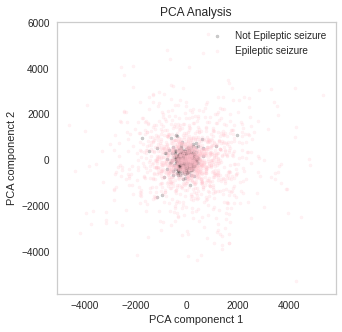

In [ ]:
pca = PCA(n_components=2)
pca_test  = pca.fit_transform(X_train)
print("The pca shape is: {}".format(pca_test.shape))
print()
print("The first component contains {:.2f}% of the total information and the second one contains {:.2f}%".format( (100*pca.explained_variance_ratio_[0]),(100*pca.explained_variance_ratio_[1]) ) )
print("In total the 2 components contains {:.2f}% of the total information".format((100*pca.explained_variance_ratio_[0])+(100*pca.explained_variance_ratio_[1])) )
print()

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel("PCA componenct 1")
ax.set_ylabel("PCA componenct 2")
ax.set_title("PCA Analysis")

classes = [0,1]
colors = ['black', 'pink']

for i, color in zip(classes, colors):
  index = np.where(y_train == i)
  first_component = []
  second_component = []
  for i in index[0]:
    first_component.append(pca_test [i][0])
    second_component.append(pca_test [i][1])
  ax.scatter(first_component, second_component, c = color, s = 10,alpha=0.2)
ax.legend(['Not Epileptic seizure', 'Epileptic seizure'])
ax.grid()

Μπορούμε να δούμε ότι το PCA μας κρατάει συνολικά περίπου το 11% της συνολικής πληροφορίας και η υπόλοιπη "χανεται" λόγο της μείωσης διαστατικότητας. Έτσι, μπορούμε να παρατηρήσουμε ότι τα δεδομένα που έχουν κατηγοριοποίηση στην κλάση 'Not Epileptic seizure' βρίσκονται κυρίως στη μέση.
Δηλαδή θα μπορούσαμε να κάναμε ένα πολυ απλό ταξινομητή ο οποίος θα έλεγε ότι αν μια μέτρηση είναι μακριά του κέντρου, τότε έχει 'Epileptic seizure', αν είναι όμως στο κέντρο δεν μπορούμε να καταλάβουμε καθώς εκεί βρίσκονταί τόσο Not Epileptic seizure και  Epileptic seizure.

Είναι ισοζυγισμένο;

In [ ]:
num_of_Not_Epileptic_seizure= len(np.where(y_train == 0)[0])
num_of_Epileptic_seizure= len(np.where(y_train == 1)[0])

print("Num of Not Epileptic seizure in training set = {}".format(num_of_Not_Epileptic_seizure))
print("Num of Epileptic seizure in training set = {}".format(num_of_Epileptic_seizure))
print("Νum_of_Not_Epileptic_seizure/num_of_Epileptic_seizure = {}".format(num_of_Not_Epileptic_seizure/num_of_Epileptic_seizure))

Num of Not Epileptic seizure in training set = 6450
Num of Epileptic seizure in training set = 1599
Νum_of_Not_Epileptic_seizure/num_of_Epileptic_seizure = 4.033771106941838


Άρα το training set είναι αρκετά μη ισοροπημένο, όπως προείπαμε για ολοόκληρο το dataset και θα προχωρήσουμε στην εξισορρόπηση του.

Επίσης είναι μη κανονικοποιημένο και επομένως θα το κανικοποιησουμε πρώτα.


In [ ]:
# standardization των features του training set
X_train_scaled = preprocessing.scale(X_train)
#print(X_train_scaled)
# μέση τιμη και απόκλιση των scaled χαρακτηριστικών
#print(X_train_scaled.mean(axis=0))
#print(X_train_scaled.std(axis=0))

# όριζουμε ένα αντικείμενο scaler και το κάνουμε fit στο train set
scaler = preprocessing.StandardScaler().fit(X_train)
# εφαρμόζουμε τον scaler στα δεδομένα test. ΠΡΟΣΟΧΗ μέθοδος transform, όχι fit!
X_test = scaler.transform(X_test)
#print(X_test_scaled)

# και τυπώνουμε τη μέση τιμ;h και απόκλιση του test set 
#print(X_test_scaled.mean(axis=0))
#print(X_test_scaled.std(axis=0))
print(X_train_scaled)

[[-3.90500865e-01 -3.36627160e-01 -3.49931666e-01 ... -1.60441001e-01
  -2.98577776e-01 -4.33946165e-01]
 [ 5.51896462e-01  6.06050264e-01  5.88321836e-01 ...  3.35182199e-01
   4.55715674e-01  6.72840319e-01]
 [ 7.73637010e-01  9.54963336e-01  1.05127587e+00 ... -5.32158400e-01
  -5.92936196e-01 -6.43338203e-01]
 ...
 [-1.99557616e-01 -2.14201520e-01 -2.27774840e-02 ... -1.85222161e-01
  -9.00738958e-02  2.78579897e-03]
 [ 2.31604560e-01  4.28533086e-01  5.75976395e-01 ... -4.94986660e-01
  -5.37743992e-01 -4.21980906e-01]
 [-8.33981961e-01 -7.77359462e-01 -6.52394965e-01 ...  8.92758298e-01
   2.39357527e+00  3.11375322e+00]]


In [ ]:
ros = RandomOverSampler(random_state=0)

X_train,y_train= ros.fit_sample(X_train_scaled,y_train)
#X_train,y_train= ros.fit_sample(X_train,y_train)

num_of_Not_Epileptic_seizure= len(np.where(y_train == 0)[0])
num_of_Epileptic_seizure= len(np.where(y_train == 1)[0])
print("Size of new training dataset: {}".format(y_train.shape))
print("Num of Not Epileptic seizure in training set = {}".format(num_of_Not_Epileptic_seizure))
print("Num of Epileptic seizure in training set = {}".format(num_of_Epileptic_seizure))
print("num_of_Epileptic_seizure/num_of_Not_Epileptic_seizure = {}".format(num_of_Epileptic_seizure/num_of_Not_Epileptic_seizure))

Size of new training dataset: (12900,)
Num of Not Epileptic seizure in training set = 6450
Num of Epileptic seizure in training set = 6450
num_of_Epileptic_seizure/num_of_Not_Epileptic_seizure = 1.0


In [ ]:
X_train.shape
x=[]
cnt=0
for i,val1 in enumerate(X_train):
  for j,val2 in enumerate(X_train):
    if (np.array_equal(val1,val2) and i!=j):
      x.append("("+str(i)+","+str(j)+")")
      cnt+=1
  if (cnt>3):break
print(x)

['(2,8589)', '(2,8846)', '(2,10899)', '(3,12439)']


Δεν κανουμε  σε αυτό το βήμα PCA και Variance Thresholding γιατί θεωρούνται υπερπαράμετροι.

Έχοντας αναλύσει τα ερωτήματα και παραπάνω, τα συγκεντρώνουμε περιληπτικά εδώ:


1.   Οι πληροφορίες για το data set δίνονται στην παράγραφο **Πληροφορίες Epileptic Seizure DataSet**
2.  Το πλήθος των δειγμάτων είναι 11500 και ο αριθμός των χαρακτηριστικών 178. Είναι διακριτά αριθμητικά χαρακτηριστικά και δεν υπάρχουν μη διατεταγμένα χαρακτηριστικά δεδομένου ότι η κλάση δεν είναι χαρακτηριστικό(αν την λάβουμε υπόψιν μπορούμε να θεωρήσουμε ότι είναι διατεταγμένο γιατί όσο αυξάνεται η αρίθμηση της κλάσης αυξάνεται κατά κάποιο τρόπο και η σοβαρότητα της κατάστασης).
3.  Υπάρχει και αρίθμηση γραμμών και επικεφαλίδες.
4.  Οι ετικέτες των κλάσεων είναι 1,2,3,4,5 και βρίσκονται στην 179 κολόνα(με αρίθμηση από το 0) κολόνα. Μετά από την επεξεργασία έχουμε δύο ετικέτες κλάσεων την 0(κλάσεις 2,3,4,5) και την 1(κλάση 1) ανάλογα με το αν έχουμε επιληπτικό ή όχι, άτομο. Επίσης αφαιρόντας τον κωδικό των γραμμών, οι στήλες γίνονται 179 σε πλήθος και οι ετικέτες βρίσκονται στην στήλη 178(με αρίθμηση από το 0).
5.  Διαβάσαμε το αρχείο, χωρίσαμε τα χαρακτηριστικά σε κολόνες, ονοματοδοτώντας την κάθε κολόνα που αντιστοιχεί σε κάθε χαρακτηριστικό και αφαιρώντας τις επικεφαλίδες και τους αριθμούς.
6.  Από την παραπάνω ανάλυση παρατηρήσαμε ότι δεν υπάρχουν απουσιάζουσες τιμές στο συγκεκριμένο data set
7.  Ο αριμός των κλάσεων είναι 2(μετά την μετατροπή σε binary, αρχικά ήταν 5) και το ποσοτό των 1(επιληπτικών) είναι 20% και των 0(μη επιληπτικών) 80%, θεωρώντας ως μη ισορροπημένο ένα dataset στο οποίο η μια κλάση είναι 1.5 φορά πιο συχνή από την άλλη (δηλαδή 60-40 αναλογία) προκύπτει ότι το εν λόγω data set είναι μη ισορροπημένο.
8.  Στο κομμάτι **split**, χωρίσαμε το data set σε training και testing δεδομένα, με αναλογία 70-30%, δηλαδή 8049 δεδομένα για training και 3450 για testing.

#Βήμα 2: Ταξινόνηση

Στο βήμα αυτό θα εφαρμόσουμε classification στο data set, χρησιμοποιώντας ως ταξινομητές τον Dummy Stratified, τον kNN, τον Multi-Layer Perceptron(MLP) και τον Support Vector Machines(SVM), χρησιμοποιώντας την default αρχικοποίησή τους.

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Predicted label')
    plt.xlabel('True label')
    plt.tight_layout()  
    plt.show()

Ακολουθούμε την συνήθη επεξεργασία στο βήμα αυτό, όπως και στο μικρό Data Set: fit, predict, confusion matrix, classification_report, f1_micro, f1_macro και heatmap. 

### Dummy stratified

Από τους Dummy ταξινομητές, τους οποίους υλοποιήσαμε όλους στο μικρό Data Set, επιλέγουμε εδώ τον Dummy Stratified, ο οποίος κάνει προβλέψεις διατηρώντας την κατανομή στο training set και μαζί με τον umiform, κάνει την λιγότερο "dummy" ταξινόμηση από τους dummy ταξινομητές. 

In [ ]:
clf = DummyClassifier(strategy="stratified")
clf.fit(X_train, y_train)
dc_stratified_predict = clf.predict(X_test)
print("Predictions for Dummy stratified Classifier:"+"\n"+" {}".format(dc_stratified_predict))

Predictions for Dummy stratified Classifier:
 [1 0 1 ... 1 0 0]


1439 1310 350 351


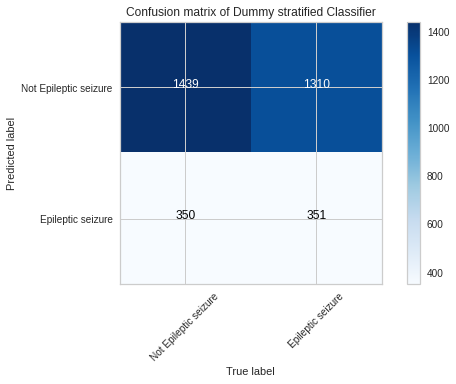

In [ ]:
cm = confusion_matrix(y_test, dc_stratified_predict)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
plot_confusion_matrix(cm, ['Not Epileptic seizure', 'Epileptic seizure'],title='Confusion matrix of Dummy stratified Classifier')

In [ ]:
clf.predict(X_test)
cnt=0
for i,val in enumerate(dc_stratified_predict):
  if (val==0):
    cnt+=1
print(cnt)

1789


In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, dc_stratified_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_dc_stratified = list(precision_recall_fscore_support(y_test, dc_stratified_predict, average='micro'))
micro_dc_stratified.pop(3) # tou support
precision_micro_dc_stratified = micro_dc_stratified[0]
recall_micro_dc_stratified = micro_dc_stratified[1]
f1_micro_dc_stratified = micro_dc_stratified[2]
print(micro_dc_stratified)

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_dc_stratified = list(precision_recall_fscore_support(y_test, dc_stratified_predict, average='macro'))
macro_dc_stratified.pop(3) # tou support
precision_macro_dc_stratified = macro_dc_stratified[0]
recall_macro_dc_stratified = macro_dc_stratified[1]
f1_macro_dc_stratified = macro_dc_stratified[2]
print(macro_dc_stratified)
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test,  dc_stratified_predict, target_names=['Not Epileptic seizure', 'Epileptic seizure'] ,output_dict=True)
print(pd.DataFrame(class_report).T)

(array([0.80435998, 0.21131848]), array([0.52346308, 0.50071327]), array([0.63420009, 0.29720576]), array([2749,  701])) 

[0.518840579710145, 0.518840579710145, 0.518840579710145]
[0.507839230241401, 0.512088172122245, 0.4657029229884513]

All the details shown here:

                       precision    recall  f1-score      support
Not Epileptic seizure   0.804360  0.523463  0.634200  2749.000000
Epileptic seizure       0.211318  0.500713  0.297206   701.000000
accuracy                0.518841  0.518841  0.518841     0.518841
macro avg               0.507839  0.512088  0.465703  3450.000000
weighted avg            0.683861  0.518841  0.565727  3450.000000


In [ ]:
print("Dummy stratified Classifier f1_micro score = {}".format(f1_micro_dc_stratified))
print("Dummy stratified Classifier  f1_macro score = {}".format(f1_macro_dc_stratified))

Dummy stratified Classifier f1_micro score = 0.518840579710145
Dummy stratified Classifier  f1_macro score = 0.4657029229884513


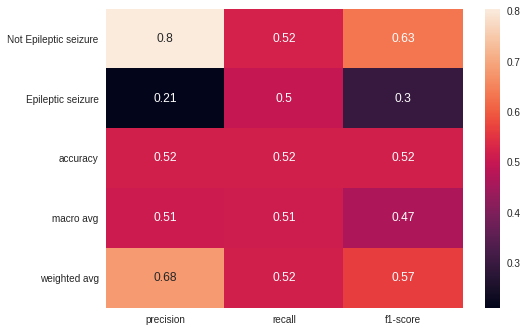

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

Από τα παραπάνω φαίνεται πως ο Dummy Stratified δεν δίνει καλά αποτελέσματα ταξινόμησης, όπως και περιμέναμε, καθώς είναι dummy αλγόριθμος ταξινόμησης.

###Gaussian NB

In [ ]:
clf = GaussianNB()
clf.fit(X_train,y_train)
GaussianNB_predict = clf.predict(X_test)
print("Predictions for KNN classifier:"+"\n"+" {}".format(GaussianNB_predict))

Predictions for KNN classifier:
 [0 1 0 ... 0 0 0]


2688 61 70 631


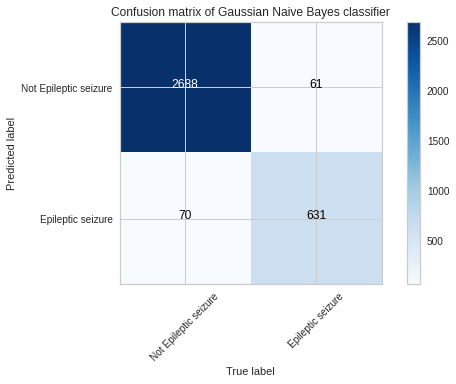

In [ ]:
cm = confusion_matrix(y_test,GaussianNB_predict)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
plot_confusion_matrix(cm, ['Not Epileptic seizure', 'Epileptic seizure'] ,title='Confusion matrix of Gaussian Naive Bayes classifier')

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, GaussianNB_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_GNB = list(precision_recall_fscore_support(y_test, GaussianNB_predict, average='micro'))
micro_GNB.pop(3) # tou support
precision_micro_GNB = micro_GNB[0]
recall_micro_GNB = micro_GNB[1]
f1_micro_GNB = micro_GNB[2]
print(micro_GNB)

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_GNB = list(precision_recall_fscore_support(y_test, GaussianNB_predict, average='macro'))
macro_GNB.pop(3) # tou support
precision_macro_GNB = macro_GNB[0]
recall_macro_GNB = macro_GNB[1]
f1_macro_GNB = macro_GNB[2]
print(macro_GNB)
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test,  GaussianNB_predict, target_names=['Not Epileptic seizure', 'Epileptic seizure'] ,output_dict=True)
print(pd.DataFrame(class_report).T)

(array([0.97461929, 0.91184971]), array([0.97781011, 0.90014265]), array([0.97621209, 0.90595836]), array([2749,  701])) 

[0.9620289855072464, 0.9620289855072464, 0.9620289855072464]
[0.9432345001613802, 0.9389763830603166, 0.941085228471862]

All the details shown here:

                       precision    recall  f1-score      support
Not Epileptic seizure   0.974619  0.977810  0.976212  2749.000000
Epileptic seizure       0.911850  0.900143  0.905958   701.000000
accuracy                0.962029  0.962029  0.962029     0.962029
macro avg               0.943235  0.938976  0.941085  3450.000000
weighted avg            0.961865  0.962029  0.961937  3450.000000


In [ ]:
print("Gaussian Naive Bayes classifier f1_micro score = {}".format(f1_micro_GNB))
print("Gaussian Naive Bayes classifier f1_macro score = {}".format(f1_macro_GNB))

Gaussian Naive Bayes classifier f1_micro score = 0.9620289855072464
Gaussian Naive Bayes classifier f1_macro score = 0.941085228471862


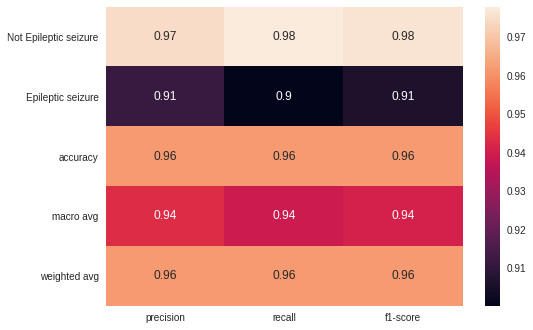

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

Από τα παραπάνω φαίνεται πως ο Gaussian Naive Bayes έχει πολύ καλή απόδοση στο συγκεκριμένο data set. Τυχούσες αστοχίες του οφείλονται και στο γεγονός ότι ο Gaussian θεωρεί ότι τα χαρακτηριστικά είναι ανεξάρτητα μεταξύ τους, το οποίο δεν μπορούμε να πούμε με ασφάλεια ότι ισχύει σε αυτό το Data Set, καθώς πρόκειται για τιμές καταγραφής ηλεκτροεγκεφαλογραφήματος σε διαφορετικές στιγμές που δεν μπορούμε να πούμε ότι μια τιμή σε μια συγκεκριμένη χρονική στιγμή δεν επηρεάζει καθόλου την επόμενη.

###KNN

Για τον kNN, τον οποίο και έχουμε αναλύσει στο προηγούμενο data set, χρησιμοποιούμε το default πλήθος γειτόνων αλλά καθώς αργότερα θα θεωρήσουμε ως υπερπαραμέτρους και το "weight" και "metric", χρήσιμο είναι να τις περιγράψουμε συνοπτικά:

*   weight: συνάρτηση βάρους που χρησιμοποιείται στο prediction. H default τιμή είναι η uniform, δηλαδή σε κάθε σημείο στη γειτονιά που δημιουργείται σε κάθε φάση, αποδίδεται το ίδιο βάρος.
*   metric: η μετρική αποστάσεων που χρησιμοποιείται. Η default τιμή είναι η minkowski(για p=1 ταυτίζεται με την manhattan και για p=2 με την euclidean).



In [ ]:
clf1 = KNeighborsClassifier(n_neighbors=5)
%time clf1.fit(X_train, y_train)
%time KNN_predict = clf1.predict(X_test)
print("Predictions for KNN classifier:"+"\n"+" {}".format(KNN_predict ))

CPU times: user 308 ms, sys: 0 ns, total: 308 ms
Wall time: 309 ms
CPU times: user 20.1 s, sys: 14.4 ms, total: 20.1 s
Wall time: 20.2 s
Predictions for KNN classifier:
 [0 1 0 ... 0 0 0]


2736 13 140 561


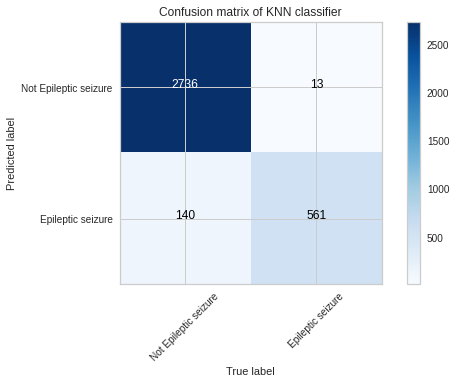

In [ ]:
cm = confusion_matrix(y_test, KNN_predict)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
plot_confusion_matrix(cm, ['Not Epileptic seizure', 'Epileptic seizure'] ,title='Confusion matrix of KNN classifier')

In [ ]:
clf1.predict(X_test)
cnt=0
for i,val in enumerate(KNN_predict):
  if (val==0):
    cnt+=1
print(cnt)

2876


In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, KNN_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_KNN = list(precision_recall_fscore_support(y_test, KNN_predict, average='micro'))
micro_KNN.pop(3) # tou support
precision_micro_KNN  = micro_KNN [0]
recall_micro_KNN  = micro_KNN [1]
f1_micro_KNN  = micro_KNN [2]
print(micro_KNN )

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_KNN  = list(precision_recall_fscore_support(y_test, KNN_predict, average='macro'))
macro_KNN .pop(3) # tou support
precision_macro_KNN  = macro_KNN [0]
recall_macro_KNN  = macro_KNN [1]
f1_macro_KNN  = macro_KNN [2]
print(macro_KNN )
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test,  KNN_predict, target_names=['Not Epileptic seizure', 'Epileptic seizure'],output_dict=True)
print(pd.DataFrame(class_report).T)

(array([0.95132128, 0.97735192]), array([0.99527101, 0.80028531]), array([0.9728, 0.88  ]), array([2749,  701])) 

[0.9556521739130435, 0.9556521739130435, 0.9556521739130435]
[0.964336597965622, 0.8977781571719246, 0.9263999999999999]

All the details shown here:

                       precision    recall  f1-score      support
Not Epileptic seizure   0.951321  0.995271  0.972800  2749.000000
Epileptic seizure       0.977352  0.800285  0.880000   701.000000
accuracy                0.955652  0.955652  0.955652     0.955652
macro avg               0.964337  0.897778  0.926400  3450.000000
weighted avg            0.956610  0.955652  0.953944  3450.000000


In [ ]:
print("KNN classifier f1_micro score = {}".format(f1_micro_KNN))
print("KNN classifier f1_macro score = {}".format(f1_macro_KNN))

KNN classifier f1_micro score = 0.9556521739130435
KNN classifier f1_macro score = 0.9263999999999999


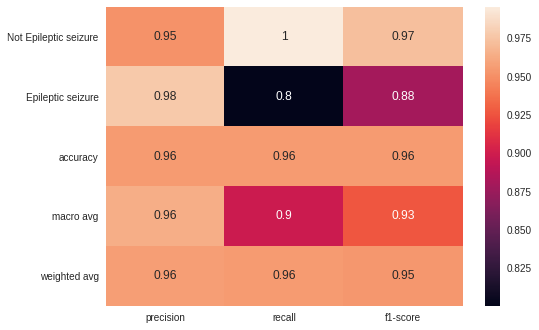

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

Παρατηρούμε ότι και εδώ έχουμε πολύ καλή απόδοση και αυτό είναι λογικό, αφού οι default τιμές είναι μελετημένες ώστε να παράγουν καλά αποτελέσματα στη γενική περίπτωση.

###SVM

Κάνουμε μια σύντομη ποιοτική περιγραφή του SVM.

Πρόκειται για έναν μη παραμετρικό, διαχωριστικό ταξινομητή που επιδιώκει να βρει μια ευθεία ή καμπύλη(σε δύο διαστάσεις) ή πολύπτυχο (manifold) σε περισσότερες τα οποία να διαχωρίζουν / διακρίνουν τις κατηγορίες μεταξύ τους. 

Πλεονεκτήματα:

*  Η εξάρτησή τους από σχετικά λίγα διανύσματα υποστήριξης σημαίνει ότι είναι πολύ συμπαγή μοντέλα και καταλαμβάνουν πολύ λίγη μνήμη.
*  Εφόσον εκπαιδευτεί το μοντέλο, η φάση πρόβλεψης είναι πολύ γρήγορη. 
* Επειδή επηρεάζονται μόνο από σημεία κοντά στο περιθώριο, λειτουργούν καλά με δεδομένα υψηλών διαστάσεων - ακόμη και δεδομένα με περισσότερες διαστάσεις από ότι δείγματα, κάτι που αποτελεί πρόκληση για άλλους αλγόριθμους.
* Η ενσωμάτωσή τους με μεθόδους πυρήνα τα καθιστά πολύ ευέλικτα, ικανά να προσαρμοστούν σε πολλούς τύπους δεδομένων.

Μειονεκτήματα:
* Η κλιμάκωση με τον αριθμό των δειγμάτων 𝑁 είναι στη χειρότερη $𝑂[𝑁^3]$ και $𝑂[𝑁^2]$
για αποτελεσματικές υλοποιήσεις. Για μεγάλο αριθμό δειγμάτων εκπαίδευσης, αυτό το υπολογιστικό κόστος μπορεί να είναι απαγορευτικό.
* Τα αποτελέσματα εξαρτώνται σε μεγάλο βαθμό από την κατάλληλη επιλογή για την παράμετρο μαλακώματος 𝐶. Αυτό πρέπει να γίνει μόνο με cross-validation ή οποία μπορεί να είναι ακριβή υπολογιστικά αν έχουμε πολλά δεδομένα.
* Τα αποτελέσματα δεν έχουν άμεση πιθανοτική ερμηνεία (κατά πόσο ένα δείγμα ανήκει σε μία κλάση).Σε κάποιες περιπτώσεις SVM αυτό μπορεί να εκτιμηθεί μέσω μιας εσωτερικής διασταυρούμενης επικύρωσης ( παράμετρος "probability" του "SVC"), αλλά αυτή η επιπλέον εκτίμηση είναι υπολογιστικά δαπανηρή.

Οι υπερπαράμετροι που εξετάζουμε  στο παρόν βήμα(default), είναι:

* kernel: Ο τύπος πυρήνα που χρησιμοποιείται από τον αλγόριθμο (συνάρτηση που ορίζει το εσωτερικό γινόμενο μεταξύ δύο διανυσμάτων  σε έναν άλλο διανυσματικό χώρο). Ο default είναι ο rbf(ακτινική συνάρτηση βάσης).

* C: παράμετρος softening(μεγάλο: σκληρό περιθώριο, μικρό: μαλακό περιθώριο). Το default είναι 1.

* gamma: συντελεστής kernel(default: scale)

* tol: tolerance stopping κριτηρίου (default: 0.001)

Αργότερα που θα κάνουμε tuning υπερπαραμέτρων, θεωρώντας τον τύπο πυρήνα ως υπερπαράμετρο, για linear πυρήνα θα θεωρήσουμε ως υπερπαραμέτρους τα loss, tol, C και για rbf, poly τα C, gamma, tol και το degree μόνο για τον poly.



In [ ]:
clf2  = SVC(C = 1, gamma = 'scale', kernel = 'rbf', tol = 1e-3)
%time clf2.fit(X_train, y_train)
%time SVC_predict = clf2.predict(X_test)
print("Predictions for KNN classifier:"+"\n"+" {}".format(SVC_predict ))

CPU times: user 8.5 s, sys: 75 ms, total: 8.57 s
Wall time: 8.6 s
CPU times: user 1.86 s, sys: 0 ns, total: 1.86 s
Wall time: 1.86 s
Predictions for KNN classifier:
 [0 1 0 ... 0 0 0]


2702 47 36 665


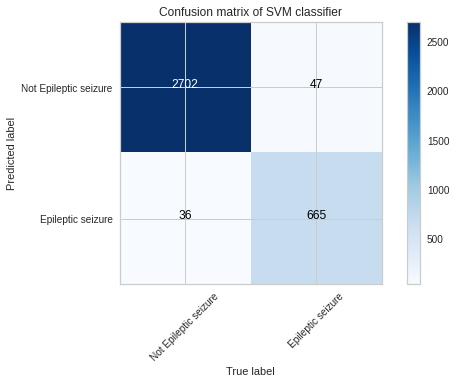

In [ ]:
cm = confusion_matrix(y_test, SVC_predict)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
plot_confusion_matrix(cm, ['Not Epileptic seizure', 'Epileptic seizure'] ,title='Confusion matrix of SVM classifier')

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, SVC_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_SVC = list(precision_recall_fscore_support(y_test, SVC_predict, average='micro'))
micro_SVC.pop(3) # tou support
precision_micro_SVC = micro_SVC[0]
recall_micro_SVC  = micro_SVC[1]
f1_micro_SVC  = micro_SVC[2]
print(micro_SVC)

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_SVC = list(precision_recall_fscore_support(y_test, SVC_predict, average='macro'))
macro_SVC.pop(3) # tou support
precision_macro_SVC  = macro_SVC[0]
recall_macro_SVC  = macro_SVC [1]
f1_macro_SVC  = macro_SVC [2]
print(macro_SVC )
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test,  SVC_predict, target_names=['Not Epileptic seizure', 'Epileptic seizure'],output_dict=True)
print(pd.DataFrame(class_report).T)

(array([0.98685172, 0.93398876]), array([0.98290287, 0.94864479]), array([0.98487334, 0.94125973]), array([2749,  701])) 

[0.9759420289855072, 0.9759420289855072, 0.9759420289855072]
[0.9604202403131951, 0.9657738334624599, 0.9630665340234803]

All the details shown here:

                       precision    recall  f1-score      support
Not Epileptic seizure   0.986852  0.982903  0.984873  2749.000000
Epileptic seizure       0.933989  0.948645  0.941260   701.000000
accuracy                0.975942  0.975942  0.975942     0.975942
macro avg               0.960420  0.965774  0.963067  3450.000000
weighted avg            0.976111  0.975942  0.976012  3450.000000


In [ ]:
print("SVC classifier f1_micro score = {}".format(f1_micro_SVC))
print("SVC classifier f1_macro score = {}".format(f1_macro_SVC))

SVC classifier f1_micro score = 0.9759420289855072
SVC classifier f1_macro score = 0.9630665340234803


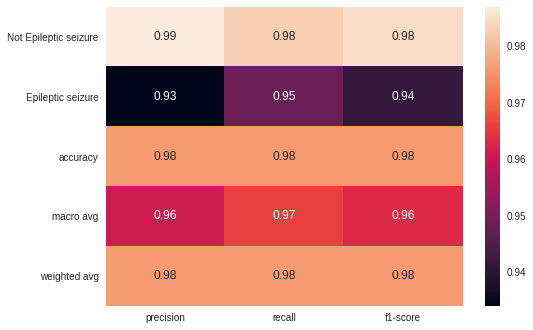

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

Από τα παραπάνω αποτελέσματα βλέπουμε ότι έχουμε μια πολύ καλή απόδοση.Αυτό οφείλεται στο γεγονός ότι χρησιμοποιούμε τς default υπερπαραμέτρους που είναι μελετημένες ώστε να δίνουν καλά αποτελέσματα στη γενική περίπτωση, στο ότι έχουμε binary classification πρόβλημα για τα οποία ο SVM έχει καλή απόδοση και ότι η υψηλή διαστατικότητα όπως αναφέραμε δεν τον εμποδίζει από το να αποδίδει ικανοποιητικά. Επιπλέον το γεγονός ότι χρησιμοποιήσαμε rbf πυρήνα που εξυπηρετεί ταξινομήσεις μη γραμμικών dataset, όπως φαίνεται να είναι το δικό μας, μας έδωσε ως αποτέμεσμα πολύ καλό αποτέλεσμα ως προς τις μετρικές ενδιαφέροντος.

###MLP

Κάνουμε μια σύντομη ποιοτική περιγραφή του MLP.

Πρόκειται για supervised learning αλγόριθμο που "μαθαίνει" μία συνάρτηση  $f:R^m \rightarrow R^o$ μέσω training στο dataset όπου $m$ είναι το πλήθος των διαστάσεων των δειγμάτων και $ο$ το πλήθος των διαστάσρων της εξόδου. Το input layer αποτελείται από ένα πλήθος νευρώνων που αναπαριστά τα δείγματα εισόδου {$x_{i}|x_{1},x_{2},..,x_{n}$}. Κάθε νευρώνας στο κρυφό layer μετασχηματίζει τις τιμές του προηγούμενου layer με μία έμβαρη γραμμική προσομοίωση $w_{1}x_{1} + w_{2}x_{2}+...+w_{m}x_{m}$, που ακολουθείται από μία γραμμική συνάρτηση ενεργοποίησης $g:R \rightarrow R$. To output layer λαμβάνει τις τιμές από το τελευταίο hidden layer και τις μετασχηματίζει σε output τιμές.

Πλεονεκτήματα:


*   Καλή εκπαίδευση σε μη γραμμικά μοντέλα
*   Καλή εκπαίδευση σε real-time.

Μειονεκτήματα:


*   Το MLP με hidden layers έχει μια μη κυρτή συνάρτηση κόστους με περισσότερα από ένα τοπικά ελάχιστα και απαιτεί καλή αρχικοποίηση βαρών.
*  Έχει πάρα πολλές υπερπαραμέτρους προς βελτιστοποίηση.
*  Είναι ευαίσθητο σε feature scaling.


Οι υπερπαράμετροι που εξετάζουμε στην άσκηση αυτή και στο παρόν βήμα χρησιμοποιούμε τους default, είναι:


* hidden_layer_sizes: πλήθος κρυφών layer(default 100)  
* activation: συνάρτηση ενεργοποίησης(default relu - rectified linear unit function)  
* solver: Optimizer βαρών. Ο default είναι ο adam(stochastic gradient-based optimizer).
*alpha: penalty parameter(default 0.0001)
*learning_rate: βήμα μάθησης(default constant)
*max_iter: πλήθος εποχών (default 200)







In [ ]:
clf3 = MLPClassifier(solver='adam', alpha=0.0001,
                    hidden_layer_sizes=(100,), max_iter=200, learning_rate = 'constant', activation = 'relu')
%time clf3.fit(X_train, y_train)
%time MLP_predict = clf3.predict(X_test)
print("Predictions for MLP classifier:"+"\n"+" {}".format(MLP_predict ))

CPU times: user 17.5 s, sys: 10.2 s, total: 27.8 s
Wall time: 14.1 s
CPU times: user 16 ms, sys: 5.07 ms, total: 21 ms
Wall time: 10.5 ms
Predictions for MLP classifier:
 [0 1 0 ... 0 0 0]


2725 24 70 631


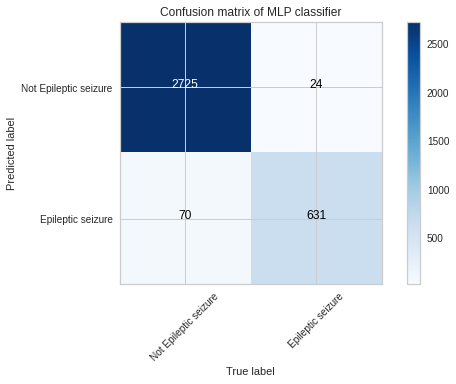

In [ ]:
cm = confusion_matrix(y_test, MLP_predict)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
plot_confusion_matrix(cm, ['Not Epileptic seizure', 'Epileptic seizure'] ,title='Confusion matrix of MLP classifier')

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, MLP_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_MLP = list(precision_recall_fscore_support(y_test, MLP_predict, average='micro'))
micro_MLP.pop(3) # tou support
precision_micro_MLP = micro_MLP[0]
recall_micro_MLP  = micro_MLP[1]
f1_micro_MLP  = micro_MLP[2]
print(micro_MLP)

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_MLP = list(precision_recall_fscore_support(y_test, MLP_predict, average='macro'))
macro_MLP.pop(3) # tou support
precision_macro_MLP  = macro_MLP[0]
recall_macro_MLP  = macro_MLP [1]
f1_macro_MLP  = macro_MLP [2]
print(macro_MLP)
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test,  MLP_predict, target_names=['Not Epileptic seizure', 'Epileptic seizure'],output_dict=True)
print(pd.DataFrame(class_report).T)

(array([0.97495528, 0.96335878]), array([0.99126955, 0.90014265]), array([0.98304473, 0.93067847]), array([2749,  701])) 

[0.9727536231884057, 0.9727536231884057, 0.9727536231884057]
[0.9691570279534064, 0.9457061029584614, 0.9568615995607146]

All the details shown here:

                       precision    recall  f1-score      support
Not Epileptic seizure   0.974955  0.991270  0.983045  2749.000000
Epileptic seizure       0.963359  0.900143  0.930678   701.000000
accuracy                0.972754  0.972754  0.972754     0.972754
macro avg               0.969157  0.945706  0.956862  3450.000000
weighted avg            0.972599  0.972754  0.972405  3450.000000


In [ ]:
print("MLP classifier f1_micro score = {}".format(f1_micro_MLP))
print("MLP classifier f1_macro score = {}".format(f1_macro_MLP))

MLP classifier f1_micro score = 0.9727536231884057
MLP classifier f1_macro score = 0.9568615995607146


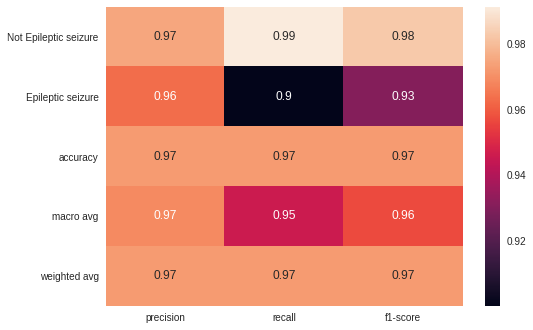

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

Παρατηρούμε ότι και ο MLP έχει πολύ καλή απόδοση καθώς χρησιμοποιούμε την default αρχικοποίησή του, δηλαδή τον adam ως optimizer, ο οποίος έχει αρκετά καλή απόδοση για μεγάλα data set, και ως πλήθος hidden layers το 100, δηλαδή πολλά κρυφά επίπεδα, τα οποία εξυπηρετούν στην ταξινόμηση μη γραμμικά διαχωρίσιμων data set και στην ύπαρξη πολλών διαστάσεων στα δείγματα, όπως συμβαίνει στη συγκεκριμένη περίπτωση.

### Σύγκριση ταξινομητών

Παρακάτω βλέπουμε την απόδοση των ταξινομητών Dummy Stratified,  Gaussian Naive Bayes, kNN, SVM και MLP default αρχικοποίησης ως προς τη μετρική f1_micro.

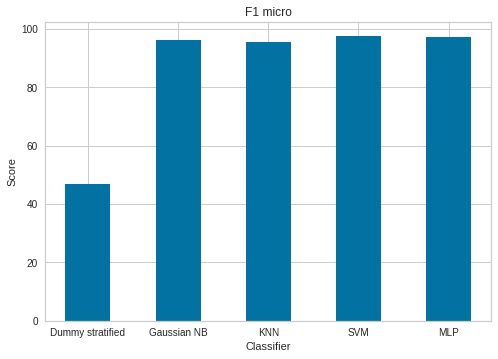

In [ ]:
fig = plt.figure()
x = ['Dummy stratified','Gaussian NB','KNN','SVM','MLP']
y=[100*f1_micro_dc_uniform,100*f1_micro_GNB,100*f1_micro_KNN,100*f1_micro_SVC,100*f1_micro_MLP]
plt.bar(x,y, align='center', width=0.5)
plt.xticks(x,x)
plt.title('F1 micro')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.show()

Παρακάτω βλέπουμε την απόδοση των ταξινομητών Dummy Stratified, Gaussian Naive Bayes, kNN, SVM και MLP default αρχικοποίησης ως προς τη μετρική f1_macro.

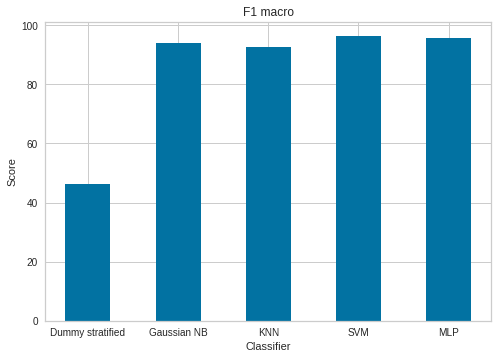

In [ ]:
fig = plt.figure()
x = ['Dummy stratified','Gaussian NB','KNN','SVM','MLP']
y=[100*f1_macro_dc_uniform,100*f1_macro_GNB,100*f1_macro_KNN,100*f1_macro_SVC,100*f1_macro_MLP]
plt.bar(x,y, align='center', width=0.5)
plt.xticks(x,x)
plt.title('F1 macro')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.show()

Από τα παραπάνω παρατηρούμε ότι πέραν του Dummy stratified που δεν κάνει τόσο σοφές προβλέψεις όπως γνωρίζουμε, οι υπόλοιποι έχουν πολύ καλές αποδόσεις τόσο ως προς τη μία μετρική όσο και ως προς την άλλη. Αυτό οφείλεται στο γεγονός ότι έχουμε εξισορροπήσει το data set το οποίο ήταν αρκετά μη ισορροπημένο.

Πριν περάσουμε σε λεπτομέρειες για κάθε ταξινομητή, αξίζει να αναφέρουμε ότι οι 4 "σοβαροί" ταξινομητές μας (Gaussian NB, KNN, SVM και MLP) έχουν μεγάλη απόδοση και ως προς το precision και recall. Αφού το Data Set μας περιέχει μετρήσεις για την ανίχνευση ασθένειας(νευρολογικής διαταραχής), οι μετρικές αυτές μας είναι ιδιαίτερα σημαντικές για την αξιολόγηση της απόδοσης. Σημειώνουμε βέβαια ότι ακόμα πιο σημαντικές είναι οι ποσότητες specificity και sensitivity, στην περίπτωση ιατρικών διαγνώσεων, αλλά δεν αποτελούν αντικείμενο εξέτασης στα πλαίσια της παρούσας άσκησης.

Παρατηρούμε ότι την καλύτερη απόδοση έχει ο SVM και ακολούθως ο MLP. Παρόλο που και οι δύο έχουν καλή απόδοση σε μεγάλα μη γραμμικά datasets υψηλής διαστατικότητας, η υπεροχή του SVM οφείλεται εν μέρει και στις λιγότερες υπερπαραμέτρους που χαρακτηρίζουν τον ταξινομητή. Επιπλέον , το γεγονός ότι έχουμε binary classification διευκολύνει τον SVM.

Ακολουθεί ο Gaussian NB που έχει και αυτός καλή απόδοση. Οι αποκλίσεις από τη μέση τιμή και την διασπορά είναι πολύ μικρές αφού τα δεδομένα είναι κανονικοποιημένα (τα έχουμε κανονικοποιήσει στο πρώστο βήμα) και ένας λόγος αστοχίας του Gaussian NB είναι οι μεγάλες αυτές αποκλίσεις, που εδώ δεν παρατηρούνται. Μπορούμε να θεωρήσουμε ότι αστοχίες οφείλονται και στο γεγονός ότι τα χαρακτηριστικά λογικά δεν είναι ανεξάρτητα μεταξύ τους.

Τέλος ο kNN, έχει και αυτός καλή απόδοση αλλά ακολουθεί τους άλλους αφού η υπερπαράμετρος k που είναι πολύ σημαντική για τον ταξινομητή δεν είναι βελτιστοποιημένο.

Ο Dummy Stratified, όπως προείπαμε και αναμέναμε δεν έχει ικανοποιητικά αποτελέσματα.


#Βημα 3: Βελτιστοποίηση ταξινομητών

Στο βήμα αυτό θα κάνουμε tuning υπερπαραμέτρων ώστε να βρούμε τους κατάλληλους συνδυασμούς που θα βελτιστοποιήσουν τους ταξινομητές μας. Αυτό γίνεται μέσω του Grid-search με 5-fold-cross validation, το οποίο είναι μια ακριβά υπολογιστική διαδικασία και επίπονη στην περίπτωση μεγάλου συνδυασμού υπερπαραμέτρων. Κάνουμε για κάθε ταξινομητή δύο gridsearch, ένα ως προς τη μετρική f1_micro και ένα ως προς την f1_macro και προφανώς ανάλογα με τη μετρική μπορεί να βγει άλλος συνδυασμός βέλτιστων υπερπαραμέτρων.  


Αρχικά τυπώνουμε το variance των δεδομένων και παρατηρούμε ότι οι τιμές της διασποράς είναι πολύ κοντινές. Τo variance thresholding μπορεί να θεωρηθεί ως υπερπαράμετρος, την οποία αρχικά εισάγαμε ως μέρος της αρχιτεκτονικής του pipeline αλλά παρατηρήσαμε πως πάντα επιλεγόταν threshold κάτω από το min των τιμών, δηλαδή τα αποτελέσματα είναι χειρότερα κάνοντας variance thresholding. Καθώς αποτελεί μια μη χρήσιμη υπερπαράμετρο στο συγκεκριμένο πρόβλημα που απλά μας φορτώνει με περιττό υπολογιστικό κόστος, την αφαιρέσαμε.


Γενικά, όπως επισημαίνεται για να αποφύγουμε (σε ένα μικρό βέβαια βαθμό) την ακρίβεια του gridsearch μπορούμε να κάνουμε random sampling στα δεδομένα και να πάρουμε ένα μεγάλο πεδίο ορισμού για τις υπερπαραμέτρους και να κάνουμε gridserach, στενεύοντας μετά το πεδίο ορισμού ανάλογα με τις καλύτερες υπερπαραμέτρους και να επαναλάβουμε τη διαδικασία για όλο το data set. Καθώς αυτό ενέχει τον κίνδυνο να μη λάβουμε υπόψην μας σημαντική πληροφορία του data set, στο πρώτο βήμα προτιμήσαμε την εναλλακτική οδό να επιλέγουμε τις δημοφιλείς υπερπαραμέτρους και τιμές κοντά στις default και όπου παρουσιάζεται ανάγκη να μετακινούμε το πεδίο ορισμού στις περιπτώσεις που οι καλύτερες υπερπαράμετροι είναι στο άκρο του πεδίου.

In [ ]:
train_variance = X_train.var(axis=0)
print(train_variance)
print(np.max(train_variance))

[2.26300686 2.28507383 2.27680904 2.25907826 2.26374052 2.28483999
 2.29667453 2.29275437 2.26224664 2.25446192 2.26280437 2.27857857
 2.29472259 2.30689911 2.31591411 2.34016749 2.32384684 2.26687474
 2.24987569 2.26262377 2.26103582 2.22450007 2.21124712 2.20735666
 2.21533893 2.23166316 2.27100457 2.28282505 2.28749552 2.27240083
 2.26329326 2.25666774 2.25366644 2.261487   2.28230994 2.30924193
 2.32203091 2.33909333 2.33741963 2.30323445 2.24351909 2.1906493
 2.20163209 2.26362579 2.31411836 2.311407   2.29087044 2.24923517
 2.22636235 2.21134086 2.19751847 2.21840877 2.2192063  2.20812082
 2.19847458 2.20980061 2.2521778  2.30159049 2.32159512 2.32385881
 2.32681387 2.32937844 2.30553833 2.28102157 2.27227425 2.26371824
 2.25800417 2.24124191 2.22566177 2.22687891 2.28610505 2.34814969
 2.33278288 2.28008197 2.2579932  2.27412055 2.29224108 2.28704872
 2.25784358 2.22057006 2.18145081 2.17893349 2.17316009 2.15203131
 2.17207844 2.20163532 2.20824731 2.22371237 2.22245829 2.22660

###kNN

Το PCA είναι μία υπερπαράμετρος που πρέπει να λάβουμε υπόψην μας στο grid search και αποτελεί μέρος της αρχιτεκτονικής του pipeline. Για τον kNN, αφού πήραμε στο πεδίο ορισμού τις τιμές 50,100,150 (έχουμε διάσταση 178), μετακινήσαμε το πεδίο προς τα κάτω όπως μας έδειξε το πρώτο gridsearch, και προέκυψε το ακόλουθο αποτέλεσμα.

In [ ]:
n_components = [30, 40, 50]
weights =  ['uniform','distance'] 
metric = ['minkowski','manhattan','mahalanobis']
k = [1,2,3,4,5] 
clf = KNeighborsClassifier()

pipe = Pipeline(steps=[('pca', pca), ('kNN', clf)], memory = 'tmp')
estimator = GridSearchCV(pipe, dict( pca__n_components=n_components, kNN__n_neighbors = k, kNN__weights = weights, kNN__metric = metric), refit = True, cv=5, scoring='f1_micro', verbose = 10, n_jobs=-1)
%time estimator.fit(X_train, y_train)
print("Best parameters regarding f1_micro is = " +str(estimator.best_params_))
print()

pipe = Pipeline(steps=[('pca', pca), ('kNN', clf)], memory = 'tmp')
estimator = GridSearchCV(pipe, dict( pca__n_components=n_components, kNN__n_neighbors = k, kNN__weights = weights, kNN__metric = metric), refit = True, cv=5, scoring='f1_macro', verbose = 10, n_jobs=-1)
%time estimator.fit(X_train, y_train)
print("Best parameters regarding f1_macro is = " +str(estimator.best_params_))

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  3

CPU times: user 2.37 s, sys: 278 ms, total: 2.64 s
Wall time: 8min 31s
Best parameters regarding f1_micro is = {'kNN__metric': 'minkowski', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'pca__n_components': 40}

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  3

CPU times: user 1.84 s, sys: 116 ms, total: 1.96 s
Wall time: 8min 8s
Best parameters regarding f1_macro is = {'kNN__metric': 'minkowski', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'pca__n_components': 40}


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  8.1min finished


Παρατηρούμε ότι παρότι τα fits ήταν αρκετά, ο συνολικός χρόνος δεν ήταν πολύ μεγάλος. Επίσης παρατηρούμε ότι και ως προς τις δύο μετρικές, καλύτερος συνδυασμός υπερπαραμέτρων, βρέθηκε ο ίδιος.

In [ ]:
%time KNN_predict = estimator.predict(X_test)
print("Predictions for KNN optimal classifier:"+"\n"+" {}".format(KNN_predict))

CPU times: user 3.69 s, sys: 90.1 ms, total: 3.78 s
Wall time: 3.69 s
Predictions for KNN optimal classifier:
 [0 0 0 ... 0 0 0]


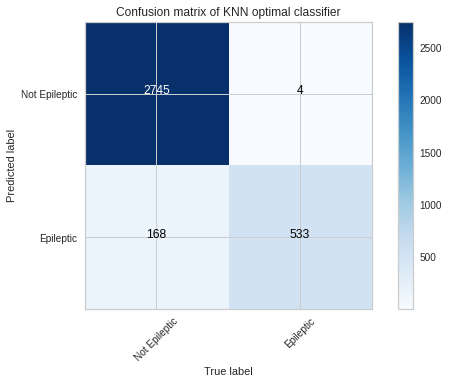

In [ ]:
cm = confusion_matrix(y_test, KNN_predict)
plot_confusion_matrix(cm, ['Not Epileptic', 'Epileptic'],title='Confusion matrix of KNN optimal classifier')

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, KNN_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_KNN_opt = list(precision_recall_fscore_support(y_test, KNN_predict, average='micro'))
micro_KNN_opt.pop(3) # tou support
precision_micro_KNN_opt  = micro_KNN_opt[0]
recall_micro_KNN_opt  = micro_KNN_opt [1]
f1_micro_KNN_opt  = micro_KNN_opt[2]
print(micro_KNN_opt )

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_KNN_opt = list(precision_recall_fscore_support(y_test, KNN_predict, average='macro'))
macro_KNN_opt.pop(3) # tou support
precision_macro_KNN_opt  = macro_KNN_opt[0]
recall_macro_KNN_opt = macro_KNN_opt[1]
f1_macro_KNN_opt = macro_KNN_opt[2]
print(macro_KNN_opt)
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test,  KNN_predict, target_names=['Not Epileptic seizure', 'Epileptic seizure'],output_dict=True)
print(pd.DataFrame(class_report).T)

(array([0.9423275 , 0.99255121]), array([0.99854493, 0.76034237]), array([0.96962204, 0.86106624]), array([2749,  701])) 

[0.9501449275362319, 0.9501449275362319, 0.9501449275362319]
[0.96743935392682, 0.8794436467365385, 0.915344138772841]

All the details shown here:

                       precision    recall  f1-score      support
Not Epileptic seizure   0.942327  0.998545  0.969622  2749.000000
Epileptic seizure       0.992551  0.760342  0.861066   701.000000
accuracy                0.950145  0.950145  0.950145     0.950145
macro avg               0.967439  0.879444  0.915344  3450.000000
weighted avg            0.952532  0.950145  0.947565  3450.000000


In [ ]:
print("KNN classifier f1_micro score = {}".format(f1_micro_KNN_opt))
print("KNN classifier f1_macro score = {}".format(f1_macro_KNN_opt))

KNN classifier f1_micro score = 0.9501449275362319
KNN classifier f1_macro score = 0.915344138772841


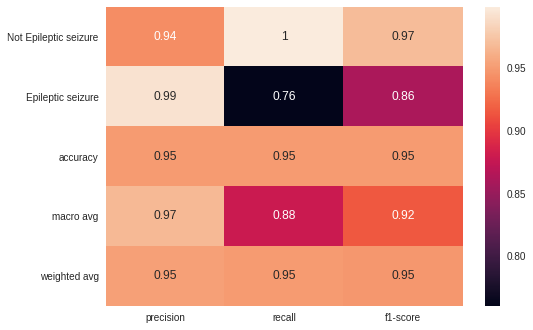

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

Βλέπουμε επίσης ότι ο kNN με gridesarch έδωσε συγκρίσιμα αποτελέσματα με την default αρχικοποίησή του στο προηγούμενο βήμα και ελάχιστα χειρότερα. (κατά 0.1% περίπου). Πρέπει να λάβουμε σοβαρά υπόψην για το Gridsearch το εξής, το οποίο προφανώς ισχύει και για τους άλλους ταξινομητές που βλέπουμε παρακάτω:

**To grid search, χρησιμοποιεί μόνο το training set για τη βελτιστοιποίηση των υπερπαραμέτρων. Οπότε όταν κάνουμε προβλέψεις για το test set, χρησιμοποιώντας τον συνδυασμό αυτό, μπορεί να μην επιτύχουμε την ψηλότερη απόδοση, αλλά μπορούμε να αναμένουμε ότι θα είμαστε αρκετά κοντά σε αυτή**


###SVM

Στην περίπτωση του SVM, εξετάζουμε ως τύπο kernel και τον Linear. Όμως όπως έχουμε καταλάβει τα δεδομένα μας δεν είναι γραμμικά διαχωρίσιμα οπότε δεν αναμένουμε πολύ καλά αποτελέσματα από τον γραμμικό πυρήνα, όπως και όντως συμβαίνει.

####Linear

In [ ]:
n_components = [50,100,150]
loss = ['hinge','squared_hinge'] 
tol = [0.001, 0.0001]
C = [0.5, 1, 1.5]
clf = LinearSVC()

pipe = Pipeline(steps=[('pca', pca), ('linearsvc', clf)], memory = 'tmp')
estimator1 = GridSearchCV(pipe, dict( pca__n_components=n_components, linearsvc__loss = loss, linearsvc__tol = tol, linearsvc__C = C), refit = True, cv=5, scoring='f1_micro', verbose = 10, n_jobs=-1)
%time estimator1.fit(X_train, y_train)
print("Best parameters regarding f1_micro is = " +str(estimator1.best_params_))
print()

pipe = Pipeline(steps=[('pca', pca), ('linearsvc', clf)], memory = 'tmp')
estimator2 = GridSearchCV(pipe, dict( pca__n_components=n_components, linearsvc__loss = loss, linearsvc__tol = tol, linearsvc__C = C), refit = True, cv=5, scoring='f1_macro', verbose = 10, n_jobs=-1)
%time estimator2.fit(X_train, y_train)
print("Best parameters regarding f1_macro is = " +str(estimator2.best_params_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   43.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  8

CPU times: user 9.11 s, sys: 363 ms, total: 9.48 s
Wall time: 10min 58s
Best parameters regarding f1_micro is = {'linearsvc__C': 0.5, 'linearsvc__loss': 'squared_hinge', 'linearsvc__tol': 0.001, 'pca__n_components': 100}

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  9.1min
[Paralle

CPU times: user 11.3 s, sys: 211 ms, total: 11.5 s
Wall time: 10min 45s
Best parameters regarding f1_macro is = {'linearsvc__C': 0.5, 'linearsvc__loss': 'squared_hinge', 'linearsvc__tol': 0.001, 'pca__n_components': 150}


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Ο SVM είναι γρήγορος αλγόριθμος και όπως βλέπουμε ο χρόνος του grid search δεν είναι μεγάλος, αλλά δεν έχουμε και τόσους πολλούς συνδυασμούς υπερπαραμέτρων(180 fits).

In [ ]:
%time LinearSVC_predict = estimator1.predict(X_test)
print("Predictions for Linear SVM optimal classifier:"+"\n"+" {}".format(LinearSVC_predict))

CPU times: user 14.4 ms, sys: 2.09 ms, total: 16.5 ms
Wall time: 12.8 ms
Predictions for Linear SVM optimal classifier:
 [0 1 0 ... 0 1 0]


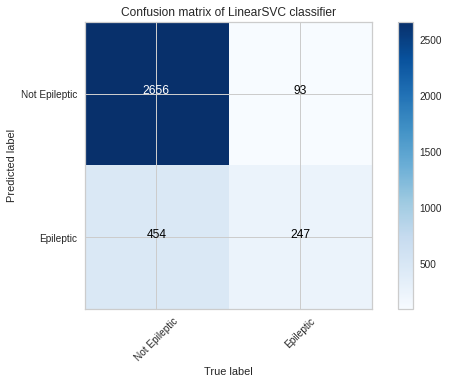

In [ ]:
cm = confusion_matrix(y_test, LinearSVC_predict)
plot_confusion_matrix(cm, ['Not Epileptic', 'Epileptic'],title='Confusion matrix of LinearSVC classifier')

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, LinearSVC_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_LinearSVC_opt = list(precision_recall_fscore_support(y_test, LinearSVC_predict, average='micro'))
micro_LinearSVC_opt.pop(3) # tou support
precision_micro_LinearSVC_opt  = micro_LinearSVC_opt[0]
recall_micro_LinearSVC_opt  = micro_LinearSVC_opt [1]
f1_micro_LinearSVC_opt  = micro_LinearSVC_opt[2]
print(micro_LinearSVC_opt )

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_LinearSVC_opt = list(precision_recall_fscore_support(y_test, LinearSVC_predict, average='macro'))
macro_LinearSVC_opt.pop(3) # tou support
precision_macro_LinearSVC_opt  = macro_LinearSVC_opt[0]
recall_macro_LinearSVC_opt = macro_LinearSVC_opt[1]
f1_macro_LinearSVC_opt = macro_LinearSVC_opt[2]
print(macro_LinearSVC_opt)
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test, LinearSVC_predict, target_names=['Not Epileptic seizure', 'Epileptic seizure'],output_dict=True)
print(pd.DataFrame(class_report).T)

(array([0.85401929, 0.72647059]), array([0.96616952, 0.35235378]), array([0.90663936, 0.47454371]), array([2749,  701])) 

[0.8414492753623188, 0.8414492753623188, 0.8414492753623188]
[0.7902449404198979, 0.6592616482507709, 0.6905915331126822]

All the details shown here:

                       precision    recall  f1-score      support
Not Epileptic seizure   0.854019  0.966170  0.906639  2749.000000
Epileptic seizure       0.726471  0.352354  0.474544   701.000000
accuracy                0.841449  0.841449  0.841449     0.841449
macro avg               0.790245  0.659262  0.690592  3450.000000
weighted avg            0.828103  0.841449  0.818843  3450.000000


In [ ]:
print("LinearSVC classifier f1_micro score = {}".format(f1_micro_LinearSVC_opt))
print("LinearSVC classifier f1_macro score = {}".format(f1_macro_LinearSVC_opt))

LinearSVC classifier f1_micro score = 0.8414492753623188
LinearSVC classifier f1_macro score = 0.6905915331126822


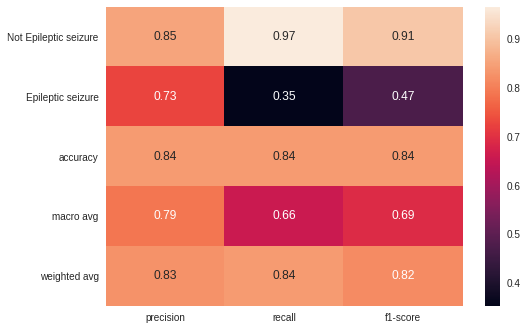

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

In [ ]:
%time LinearSVC_predict = estimator2.predict(X_test)
print("Predictions for Linear SVM optimal classifier:"+"\n"+" {}".format(LinearSVC_predict))

CPU times: user 19.1 ms, sys: 3.01 ms, total: 22.2 ms
Wall time: 22.3 ms
Predictions for Linear SVM optimal classifier:
 [0 1 0 ... 0 0 0]


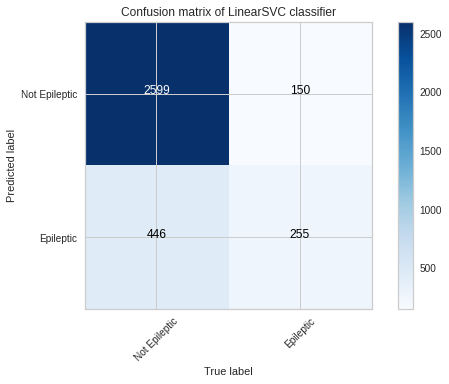

In [ ]:
cm = confusion_matrix(y_test, LinearSVC_predict)
plot_confusion_matrix(cm, ['Not Epileptic', 'Epileptic'],title='Confusion matrix of LinearSVC classifier')

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, LinearSVC_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_LinearSVC_opt = list(precision_recall_fscore_support(y_test, LinearSVC_predict, average='micro'))
micro_LinearSVC_opt.pop(3) # tou support
precision_micro_LinearSVC_opt  = micro_LinearSVC_opt[0]
recall_micro_LinearSVC_opt  = micro_LinearSVC_opt [1]
f1_micro_LinearSVC_opt  = micro_LinearSVC_opt[2]
print(micro_LinearSVC_opt )

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_LinearSVC_opt = list(precision_recall_fscore_support(y_test, LinearSVC_predict, average='macro'))
macro_LinearSVC_opt.pop(3) # tou support
precision_macro_LinearSVC_opt  = macro_LinearSVC_opt[0]
recall_macro_LinearSVC_opt = macro_LinearSVC_opt[1]
f1_macro_LinearSVC_opt = macro_LinearSVC_opt[2]
print(macro_LinearSVC_opt)
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test, LinearSVC_predict, target_names=['Not Epileptic seizure', 'Epileptic seizure'],output_dict=True)
print(pd.DataFrame(class_report).T)

(array([0.85353038, 0.62962963]), array([0.9454347 , 0.36376605]), array([0.89713497, 0.46112116]), array([2749,  701])) 

[0.8272463768115942, 0.8272463768115942, 0.8272463768115942]
[0.7415800036489693, 0.6546003760153478, 0.6791280622655724]

All the details shown here:

                       precision    recall  f1-score      support
Not Epileptic seizure   0.853530  0.945435  0.897135  2749.000000
Epileptic seizure       0.629630  0.363766  0.461121   701.000000
accuracy                0.827246  0.827246  0.827246     0.827246
macro avg               0.741580  0.654600  0.679128  3450.000000
weighted avg            0.808036  0.827246  0.808542  3450.000000


In [ ]:
print("LinearSVC classifier f1_micro score = {}".format(f1_micro_LinearSVC_opt))
print("LinearSVC classifier f1_macro score = {}".format(f1_macro_LinearSVC_opt))

LinearSVC classifier f1_micro score = 0.8272463768115942
LinearSVC classifier f1_macro score = 0.6791280622655724


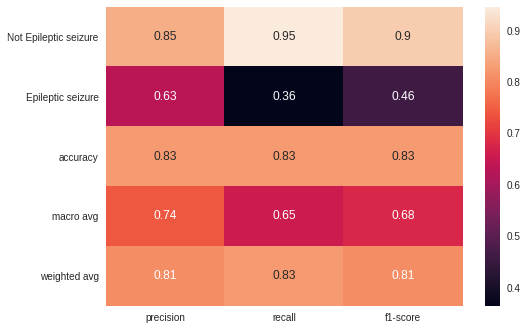

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

####Poly, Rbf

Οι πυρήνες poly και RBF έχουν περισσότερο νόημα σε αυτή την περίπτωση καθώς τα δεδομένα είναι μη γραμμικά. Αρχικά έχουμε βάλει στο pipeline και το PCA, αφιαρώντας το όμως παρατηρήσαμε ότι έχουμε καλύτερη απόδοση, όπως φαίνεται και παρακάτω.

In [ ]:
n_components = [50, 150]
gamma = ['auto','scale']
kernel = ['poly','rbf']
degree = [3, 5] 
tol = [0.001, 0.0001]
C = [0.7, 1.2]
clf = SVC()

pipe = Pipeline(steps=[('pca', pca), ('SVC', clf)], memory = 'tmp')
estimator1 = GridSearchCV(pipe, dict( pca__n_components=n_components, SVC__kernel = kernel, SVC__tol = tol, SVC__C = C, SVC__degree = degree, SVC__gamma = gamma), refit = True, cv=5, scoring='f1_micro', verbose = 10, n_jobs=-1)
%time estimator1.fit(X_train, y_train)
print("Best parameters regarding f1_micro is = " +str(estimator1.best_params_))
print()

pipe = Pipeline(steps=[('pca', pca), ('SVC', clf)], memory = 'tmp')
estimator2 = GridSearchCV(pipe, dict( pca__n_components=n_components, SVC__kernel = kernel, SVC__tol = tol, SVC__C = C, SVC__degree = degree, SVC__gamma = gamma), refit = True, cv=5, scoring='f1_macro', verbose = 10, n_jobs=-1)
%time estimator2.fit(X_train, y_train)
print("Best parameters regarding f1_macro is = " +str(estimator2.best_params_))

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   17.1s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 

CPU times: user 7.77 s, sys: 413 ms, total: 8.19 s
Wall time: 31min 17s
Best parameters regarding f1_micro is = {'SVC__C': 1.2, 'SVC__degree': 5, 'SVC__gamma': 'auto', 'SVC__kernel': 'poly', 'SVC__tol': 0.001, 'pca__n_components': 50}

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 15

CPU times: user 7.52 s, sys: 152 ms, total: 7.67 s
Wall time: 31min 39s
Best parameters regarding f1_macro is = {'SVC__C': 1.2, 'SVC__degree': 5, 'SVC__gamma': 'auto', 'SVC__kernel': 'poly', 'SVC__tol': 0.001, 'pca__n_components': 50}


Οι χρόνος είναι μεγαλύτερος από την περίπτωση του linear καθώς έχουμε περισσότερες υπερπαραμέτρους για βελτιστοποίση.

In [ ]:
%time SVC_predict = estimator1.predict(X_test)
print("Predictions for Linear SVM optimal classifier:"+"\n"+" {}".format(SVC_predict))

CPU times: user 684 ms, sys: 95 ms, total: 779 ms
Wall time: 670 ms
Predictions for Linear SVM optimal classifier:
 [0 0 0 ... 0 0 0]


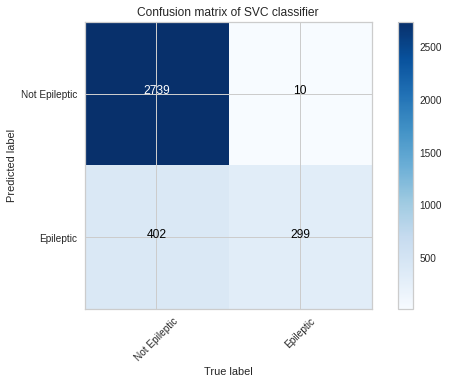

In [ ]:
cm = confusion_matrix(y_test, SVC_predict)
plot_confusion_matrix(cm, ['Not Epileptic', 'Epileptic'],title='Confusion matrix of SVC classifier')

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, SVC_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_SVC_opt = list(precision_recall_fscore_support(y_test, SVC_predict, average='micro'))
micro_SVC_opt.pop(3) # tou support
precision_micro_SVC_opt  = micro_SVC_opt[0]
recall_micro_SVC_opt  = micro_SVC_opt [1]
f1_micro_SVC1_opt  = micro_SVC_opt[2]
print(micro_SVC_opt )

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_SVC_opt = list(precision_recall_fscore_support(y_test, SVC_predict, average='macro'))
macro_SVC_opt.pop(3) # tou support
precision_macro_SVC_opt  = macro_SVC_opt[0]
recall_macro_SVC_opt = macro_SVC_opt[1]
f1_macro_SVC1_opt = macro_SVC_opt[2]
print(macro_SVC_opt)
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test, SVC_predict, target_names=['Not Epileptic seizure', 'Epileptic seizure'],output_dict=True)
print(pd.DataFrame(class_report).T)

(array([0.87201528, 0.96763754]), array([0.99636231, 0.42653352]), array([0.93005093, 0.59207921]), array([2749,  701])) 

[0.8805797101449275, 0.8805797101449275, 0.8805797101449275]
[0.9198264111052383, 0.7114479185531868, 0.7610650708534351]

All the details shown here:

                       precision    recall  f1-score     support
Not Epileptic seizure   0.872015  0.996362  0.930051  2749.00000
Epileptic seizure       0.967638  0.426534  0.592079   701.00000
accuracy                0.880580  0.880580  0.880580     0.88058
macro avg               0.919826  0.711448  0.761065  3450.00000
weighted avg            0.891445  0.880580  0.861379  3450.00000


In [ ]:
print("SVC classifier f1_micro score = {}".format(f1_micro_SVC1_opt))
print("SVC classifier f1_macro score = {}".format(f1_macro_SVC1_opt))

SVC classifier f1_micro score = 0.8805797101449275
SVC classifier f1_macro score = 0.7610650708534351


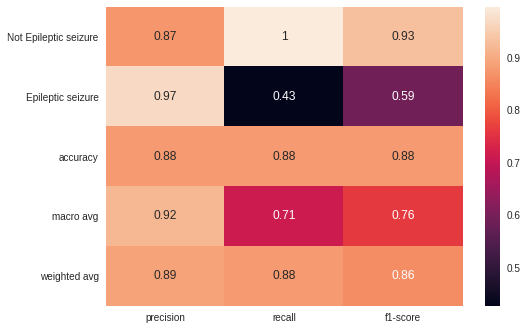

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

In [ ]:
%time SVC_predict = estimator2.predict(X_test)
print("Predictions for SVM optimal classifier:"+"\n"+" {}".format(SVC_predict))

CPU times: user 697 ms, sys: 90.1 ms, total: 787 ms
Wall time: 698 ms
Predictions for SVM optimal classifier:
 [0 0 0 ... 0 0 0]


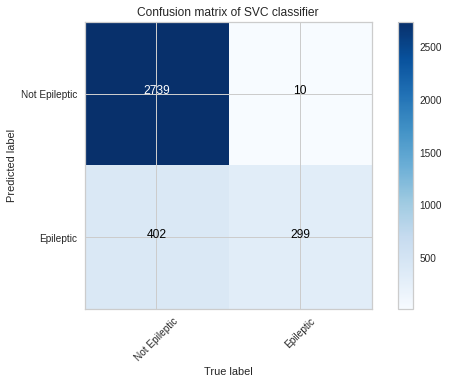

In [ ]:
cm = confusion_matrix(y_test, SVC_predict)
plot_confusion_matrix(cm, ['Not Epileptic', 'Epileptic'],title='Confusion matrix of SVC classifier')

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, SVC_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_SVC_opt = list(precision_recall_fscore_support(y_test,SVC_predict, average='micro'))
micro_SVC_opt.pop(3) # tou support
precision_micro_SVC_opt  = micro_SVC_opt[0]
recall_micro_SVC_opt  = micro_SVC_opt [1]
f1_micro_SVC2_opt  = micro_SVC_opt[2]
print(micro_SVC_opt )

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_SVC_opt = list(precision_recall_fscore_support(y_test, SVC_predict, average='macro'))
macro_SVC_opt.pop(3) # tou support
precision_macro_SVC_opt  = macro_SVC_opt[0]
recall_macro_SVC_opt = macro_SVC_opt[1]
f1_macro_SVC2_opt = macro_SVC_opt[2]
print(macro_SVC_opt)
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test, SVC_predict, target_names=['Not Epileptic seizure', 'Epileptic seizure'],output_dict=True)
print(pd.DataFrame(class_report).T)

(array([0.87201528, 0.96763754]), array([0.99636231, 0.42653352]), array([0.93005093, 0.59207921]), array([2749,  701])) 

[0.8805797101449275, 0.8805797101449275, 0.8805797101449275]
[0.9198264111052383, 0.7114479185531868, 0.7610650708534351]

All the details shown here:

                       precision    recall  f1-score     support
Not Epileptic seizure   0.872015  0.996362  0.930051  2749.00000
Epileptic seizure       0.967638  0.426534  0.592079   701.00000
accuracy                0.880580  0.880580  0.880580     0.88058
macro avg               0.919826  0.711448  0.761065  3450.00000
weighted avg            0.891445  0.880580  0.861379  3450.00000


In [ ]:
print("SVC classifier f1_micro score = {}".format(f1_micro_SVC2_opt))
print("SVC classifier f1_macro score = {}".format(f1_macro_SVC2_opt))

SVC classifier f1_micro score = 0.8805797101449275
SVC classifier f1_macro score = 0.7610650708534351


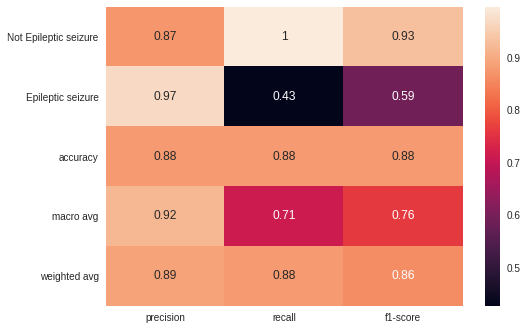

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

####Poly, Rbf χωρίς PCA

Η αφαίρεση του PCA από το pipeline, οδηγεί σε καλύτερα αποτελέσματα, το οποίο σημαίνει ότι η μείωση της διαστατικότητας για το παρόν πρόβλημα και τον παρόντα ταξινομητή, δεν βοηθά.

In [ ]:
gamma = ['auto','scale']
kernel = ['poly','rbf']
degree = [3, 5] 
tol = [0.001, 0.0001]
C = [0.7, 1.2]
clf = SVC()

pipe = Pipeline(steps=[ ('SVC', clf)], memory = 'tmp')
estimator1 = GridSearchCV(pipe, dict(  SVC__kernel = kernel, SVC__tol = tol, SVC__C = C, SVC__degree = degree, SVC__gamma = gamma), refit = True, cv=5, scoring='f1_micro', verbose = 10, n_jobs=-1)
%time estimator1.fit(X_train, y_train)
print("Best parameters regarding f1_micro is = " +str(estimator1.best_params_))
print()

pipe = Pipeline(steps=[('SVC', clf)], memory = 'tmp')
estimator2 = GridSearchCV(pipe, dict( SVC__kernel = kernel, SVC__tol = tol, SVC__C = C, SVC__degree = degree, SVC__gamma = gamma), refit = True, cv=5, scoring='f1_macro', verbose = 10, n_jobs=-1)
%time estimator2.fit(X_train, y_train)
print("Best parameters regarding f1_macro is = " +str(estimator2.best_params_))

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 22

CPU times: user 7.36 s, sys: 79.9 ms, total: 7.44 s
Wall time: 25min 58s
Best parameters regarding f1_micro is = {'SVC__C': 1.2, 'SVC__degree': 3, 'SVC__gamma': 'auto', 'SVC__kernel': 'rbf', 'SVC__tol': 0.001}

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 23

CPU times: user 7.38 s, sys: 56 ms, total: 7.44 s
Wall time: 26min 12s
Best parameters regarding f1_macro is = {'SVC__C': 1.2, 'SVC__degree': 3, 'SVC__gamma': 'auto', 'SVC__kernel': 'rbf', 'SVC__tol': 0.001}


´Εχουμε κι εδώ έναν καλό χρόνο δεδομένου του πλήθους των συνδυασμών. Παρατηρούμε επίσης ότι ο συνδυασμός υπερπαραμέτρων είναι ίδιος και ως προς τις δύο μετρικές.

In [ ]:
%time SVC_predict = estimator1.predict(X_test)
print("Predictions for Linear SVM optimal classifier:"+"\n"+" {}".format(SVC_predict))

CPU times: user 1.46 s, sys: 0 ns, total: 1.46 s
Wall time: 1.47 s
Predictions for Linear SVM optimal classifier:
 [0 1 0 ... 0 0 0]


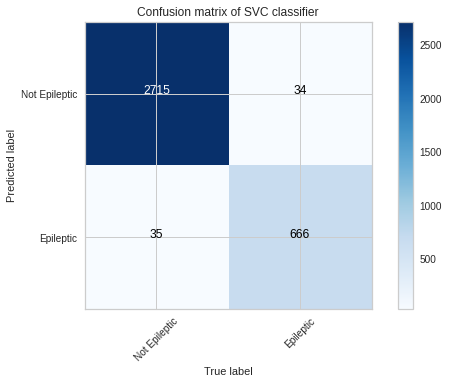

In [ ]:
cm = confusion_matrix(y_test, SVC_predict)
plot_confusion_matrix(cm, ['Not Epileptic', 'Epileptic'],title='Confusion matrix of SVC classifier')

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, SVC_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_SVC_opt = list(precision_recall_fscore_support(y_test, SVC_predict, average='micro'))
micro_SVC_opt.pop(3) # tou support
precision_micro_SVC_opt  = micro_SVC_opt[0]
recall_micro_SVC_opt  = micro_SVC_opt [1]
f1_micro_SVC3_opt  = micro_SVC_opt[2]
print(micro_SVC_opt )

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_SVC_opt = list(precision_recall_fscore_support(y_test, SVC_predict, average='macro'))
macro_SVC_opt.pop(3) # tou support
precision_macro_SVC_opt  = macro_SVC_opt[0]
recall_macro_SVC_opt = macro_SVC_opt[1]
f1_macro_SVC3_opt = macro_SVC_opt[2]
print(macro_SVC_opt)
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test, SVC_predict, target_names=['Not Epileptic seizure', 'Epileptic seizure'],output_dict=True)
print(pd.DataFrame(class_report).T)

(array([0.98727273, 0.95142857]), array([0.98763187, 0.95007133]), array([0.98745226, 0.95074946]), array([2749,  701])) 

[0.98, 0.98, 0.98]
[0.9693506493506494, 0.9688515964046581, 0.9691008643580515]

All the details shown here:

                       precision    recall  f1-score  support
Not Epileptic seizure   0.987273  0.987632  0.987452  2749.00
Epileptic seizure       0.951429  0.950071  0.950749   701.00
accuracy                0.980000  0.980000  0.980000     0.98
macro avg               0.969351  0.968852  0.969101  3450.00
weighted avg            0.979990  0.980000  0.979995  3450.00


In [ ]:
print("SVC classifier f1_micro score = {}".format(f1_micro_SVC3_opt))
print("SVC classifier f1_macro score = {}".format(f1_macro_SVC3_opt))

SVC classifier f1_micro score = 0.98
SVC classifier f1_macro score = 0.9691008643580515


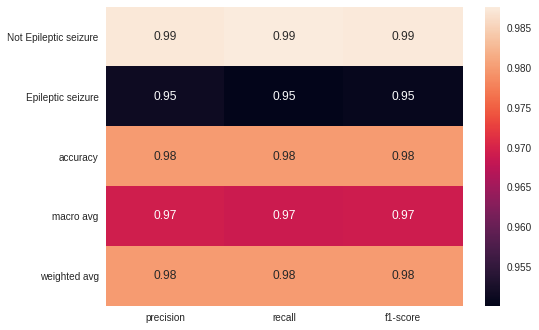

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

In [ ]:
%time SVC_predict = estimator2.predict(X_test)
print("Predictions for SVM optimal classifier:"+"\n"+" {}".format(SVC_predict))

CPU times: user 1.46 s, sys: 119 µs, total: 1.46 s
Wall time: 1.48 s
Predictions for SVM optimal classifier:
 [0 1 0 ... 0 0 0]


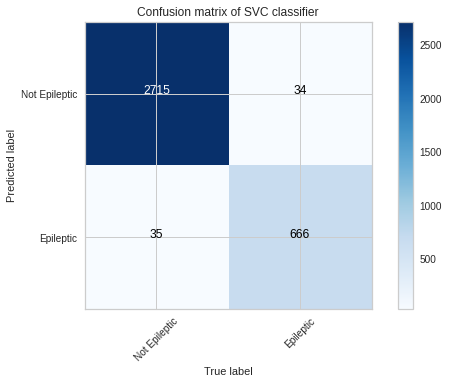

In [ ]:
cm = confusion_matrix(y_test, SVC_predict)
plot_confusion_matrix(cm, ['Not Epileptic', 'Epileptic'],title='Confusion matrix of SVC classifier')

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, SVC_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_SVC_opt = list(precision_recall_fscore_support(y_test,SVC_predict, average='micro'))
micro_SVC_opt.pop(3) # tou support
precision_micro_SVC_opt  = micro_SVC_opt[0]
recall_micro_SVC_opt  = micro_SVC_opt [1]
f1_micro_SVC4_opt  = micro_SVC_opt[2]
print(micro_SVC_opt )

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_SVC_opt = list(precision_recall_fscore_support(y_test, SVC_predict, average='macro'))
macro_SVC_opt.pop(3) # tou support
precision_macro_SVC_opt  = macro_SVC_opt[0]
recall_macro_SVC_opt = macro_SVC_opt[1]
f1_macro_SVC4_opt = macro_SVC_opt[2]
print(macro_SVC_opt)
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test, SVC_predict, target_names=['Not Epileptic seizure', 'Epileptic seizure'],output_dict=True)
print(pd.DataFrame(class_report).T)

(array([0.98727273, 0.95142857]), array([0.98763187, 0.95007133]), array([0.98745226, 0.95074946]), array([2749,  701])) 

[0.98, 0.98, 0.98]
[0.9693506493506494, 0.9688515964046581, 0.9691008643580515]

All the details shown here:

                       precision    recall  f1-score  support
Not Epileptic seizure   0.987273  0.987632  0.987452  2749.00
Epileptic seizure       0.951429  0.950071  0.950749   701.00
accuracy                0.980000  0.980000  0.980000     0.98
macro avg               0.969351  0.968852  0.969101  3450.00
weighted avg            0.979990  0.980000  0.979995  3450.00


In [ ]:
print("SVC classifier f1_micro score = {}".format(f1_micro_SVC4_opt))
print("SVC classifier f1_macro score = {}".format(f1_macro_SVC4_opt))

SVC classifier f1_micro score = 0.98
SVC classifier f1_macro score = 0.9691008643580515


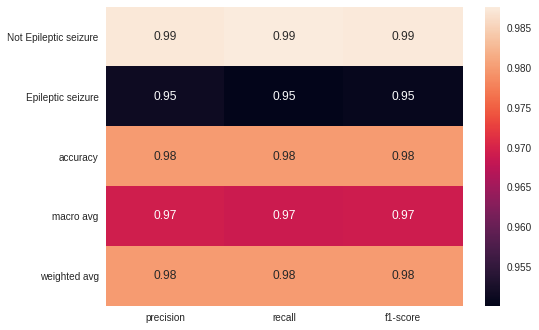

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

Τα αποτελέσματα συγκριτικά με τη default αρχικοποίηση είναι συγκρίσιμα καθώς επιλέχθησαν είτε οι default τιμές, είτε τιμές κοντά στις default. Είναι όμως ελαφρώς καλύτερα το οποίο σημαίνει ότι το grid search ήταν επιτυχές.

###MLP

Και σε αυτή την περίπτωση παρουσιάζουμε τον ταξινομητή με και χωρίς PCA. Κάνοντας ένα grid search με πλήθος διαστάσεων 50,100 και 150 και για τις δύο μετρικές προέκυψε καλύτερη παράμετρος το 150 οπότε παρουσιάζουμε παρακάτω το grid search με τιμές κοντά στο 150. Επειδή όμως οι τιμές αυτές είναι πολύ κοντά στην αρχική διάσταση του προβλήματος, παρουσιάζουμε το grid search και χωρίς PCA. Παρατηρούμε ότι με PCA με πεδίο ορισμού τις τιμές που προείπαμε, τα αποτελέσματα είναι ελαφρώς καλύτερα, αλλά συγκρίσιμα.

Αξίζει να αναφέρουμε ότι δεν συμπεριλαμβάνουμε τον lbfgs solver στο πεδίο ορισμού, καθώς γνωρίζουμε ότι συγκλίνει για πολύ μεγαλύτερο πλήθος εποχών, σε σχέση με τους άλλους και είναι κατάλληλος για μικρά data sets (και εμείς έχουμε μεγάλο).

In [ ]:
n_components = [150, 160, 170]
hidden_layer_sizes = [(1,)]
solver = ['adam','sgd']
max_iter = [250, 300] 
learning_rate = ['constant','adaptive']
alpha = [0.0001,0.00001]
activation = ['tanh', 'relu']
clf = MLPClassifier()

pipe = Pipeline(steps=[('pca', pca), ('MLP', clf)], memory = 'tmp')
estimator1 = GridSearchCV(pipe, dict(pca__n_components=n_components, MLP__hidden_layer_sizes =  hidden_layer_sizes, MLP__solver = solver, MLP__max_iter = max_iter, MLP__learning_rate = learning_rate, MLP__alpha = alpha, MLP__activation = activation),refit = True, cv=5, scoring='f1_micro', verbose = 10, n_jobs=-1)
%time estimator1.fit(X_train, y_train)
print("Best parameters regarding f1_micro is = " +str(estimator1.best_params_))
print()

pipe = Pipeline(steps=[('pca', pca), ('MLP', clf)], memory = 'tmp')
estimator2 = GridSearchCV(pipe, dict(pca__n_components=n_components, MLP__hidden_layer_sizes =  hidden_layer_sizes, MLP__solver = solver, MLP__max_iter = max_iter, MLP__learning_rate = learning_rate, MLP__alpha = alpha, MLP__activation = activation),refit = True, cv=5, scoring='f1_macro', verbose = 10, n_jobs=-1)
%time estimator2.fit(X_train, y_train)
print("Best parameters regarding f1_macro is = " +str(estimator2.best_params_))

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 17

CPU times: user 17.8 s, sys: 11.1 s, total: 28.9 s
Wall time: 49min 8s
Best parameters regarding f1_micro is = {'MLP__activation': 'tanh', 'MLP__alpha': 0.0001, 'MLP__hidden_layer_sizes': (1,), 'MLP__learning_rate': 'adaptive', 'MLP__max_iter': 250, 'MLP__solver': 'adam', 'pca__n_components': 170}

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 17

CPU times: user 17.3 s, sys: 10.7 s, total: 28 s
Wall time: 48min 30s
Best parameters regarding f1_macro is = {'MLP__activation': 'tanh', 'MLP__alpha': 1e-05, 'MLP__hidden_layer_sizes': (1,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 250, 'MLP__solver': 'adam', 'pca__n_components': 150}


Ο χρόνος είναι αρκετά μεγαλύτερος σε σύγκριση με τους υπόλοιους, αλλά έχουμε περισσότερους συνδυασμούς υπερπαραμέτρων. Παρατηρούμε επίσης ότι δεν επιλέχθηκε ο ίδιος συνδυασμός βέλτιστων υπερπαραμέτρων ως προς κάθε μετρική.

In [ ]:
%time MLP_predict =estimator1.predict(X_test)
print("Predictions for KNN classifier:"+"\n"+" {}".format(MLP_predict))

CPU times: user 27.2 ms, sys: 22.9 ms, total: 50.1 ms
Wall time: 29 ms
Predictions for KNN classifier:
 [0 0 0 ... 0 0 0]


2691 58 442 259


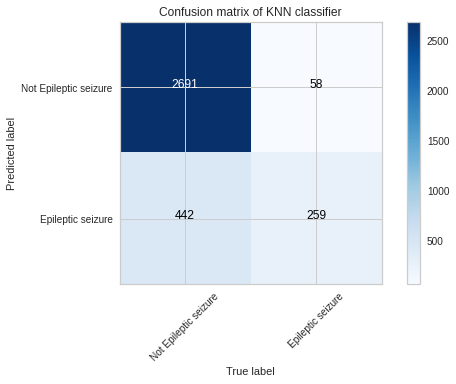

In [ ]:
cm = confusion_matrix(y_test, MLP_predict)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
plot_confusion_matrix(cm, ['Not Epileptic seizure', 'Epileptic seizure'] ,title='Confusion matrix of KNN classifier')

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, MLP_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_MLP_opt = list(precision_recall_fscore_support(y_test, MLP_predict, average='micro'))
micro_MLP_opt.pop(3) # tou support
precision_micro_MLP_opt = micro_MLP_opt[0]
recall_micro_MLP_opt  = micro_MLP_opt[1]
f1_micro_MLP1_opt  = micro_MLP_opt[2]
print(micro_MLP_opt)

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_MLP_opt = list(precision_recall_fscore_support(y_test, MLP_predict, average='macro'))
macro_MLP_opt.pop(3) # tou support
precision_macro_MLP_opt  = macro_MLP_opt[0]
recall_macro_MLP_opt  = macro_MLP_opt [1]
f1_macro_MLP1_opt  = macro_MLP_opt [2]
print(macro_MLP_opt)
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test,  MLP_predict, target_names=['Not Epileptic seizure', 'Epileptic seizure'],output_dict=True)
print(pd.DataFrame(class_report).T)

(array([0.85892116, 0.8170347 ]), array([0.97890142, 0.36947218]), array([0.9149949 , 0.50884086]), array([2749,  701])) 

[0.855072463768116, 0.855072463768116, 0.855072463768116]
[0.8379779310705917, 0.6741868006469997, 0.7119178820670302]

All the details shown here:

                       precision    recall  f1-score      support
Not Epileptic seizure   0.858921  0.978901  0.914995  2749.000000
Epileptic seizure       0.817035  0.369472  0.508841   701.000000
accuracy                0.855072  0.855072  0.855072     0.855072
macro avg               0.837978  0.674187  0.711918  3450.000000
weighted avg            0.850410  0.855072  0.832469  3450.000000


In [ ]:
print("MLP classifier f1_micro score = {}".format(f1_micro_MLP1_opt))
print("MLP classifier f1_macro score = {}".format(f1_macro_MLP1_opt))

MLP classifier f1_micro score = 0.855072463768116
MLP classifier f1_macro score = 0.7119178820670302


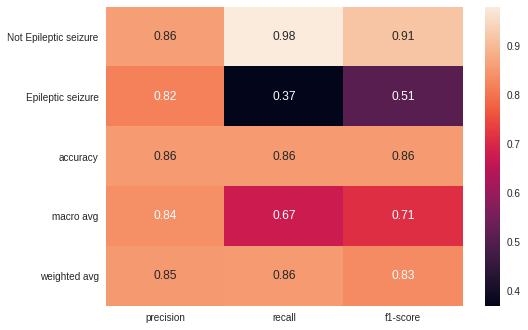

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

In [ ]:
%time MLP_predict =estimator2.predict(X_test)
print("Predictions for KNN classifier:"+"\n"+" {}".format(MLP_predict))

CPU times: user 20.5 ms, sys: 4.9 ms, total: 25.4 ms
Wall time: 22.7 ms
Predictions for KNN classifier:
 [0 0 0 ... 0 0 0]


2667 82 422 279


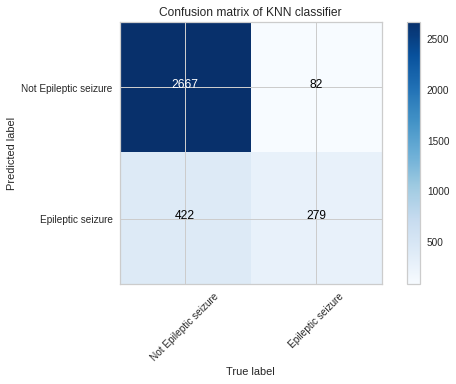

In [ ]:
cm = confusion_matrix(y_test, MLP_predict)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
plot_confusion_matrix(cm, ['Not Epileptic seizure', 'Epileptic seizure'] ,title='Confusion matrix of KNN classifier')

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, MLP_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_MLP_opt = list(precision_recall_fscore_support(y_test, MLP_predict, average='micro'))
micro_MLP_opt.pop(3) # tou support
precision_micro_MLP_opt = micro_MLP_opt[0]
recall_micro_MLP_opt  = micro_MLP_opt[1]
f1_micro_MLP2_opt  = micro_MLP_opt[2]
print(micro_MLP_opt)

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_MLP_opt = list(precision_recall_fscore_support(y_test, MLP_predict, average='macro'))
macro_MLP_opt.pop(3) # tou support
precision_macro_MLP_opt  = macro_MLP_opt[0]
recall_macro_MLP_opt  = macro_MLP_opt [1]
f1_macro_MLP2_opt  = macro_MLP_opt [2]
print(macro_MLP_opt)
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test,  MLP_predict, target_names=['Not Epileptic seizure', 'Epileptic seizure'],output_dict=True)
print(pd.DataFrame(class_report).T)

(array([0.86338621, 0.77285319]), array([0.97017097, 0.39800285]), array([0.91366906, 0.52542373]), array([2749,  701])) 

[0.8539130434782609, 0.8539130434782609, 0.8539130434782609]
[0.8181196973623679, 0.6840869121646621, 0.7195463967808803]

All the details shown here:

                       precision    recall  f1-score      support
Not Epileptic seizure   0.863386  0.970171  0.913669  2749.000000
Epileptic seizure       0.772853  0.398003  0.525424   701.000000
accuracy                0.853913  0.853913  0.853913     0.853913
macro avg               0.818120  0.684087  0.719546  3450.000000
weighted avg            0.844991  0.853913  0.834782  3450.000000


In [ ]:
print("MLP classifier f1_micro score = {}".format(f1_micro_MLP2_opt))
print("MLP classifier f1_macro score = {}".format(f1_macro_MLP2_opt))

MLP classifier f1_micro score = 0.8539130434782609
MLP classifier f1_macro score = 0.7195463967808803


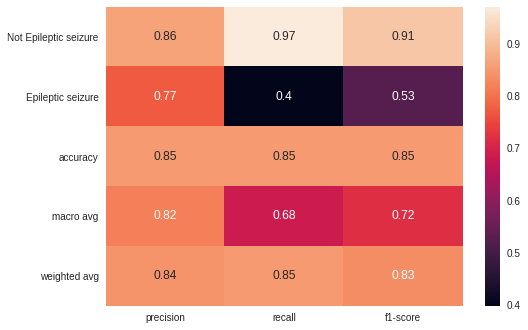

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

Ως καλύτερος ταξινομητής επιλέγεται ο adam. O sgd μπορεί να αποδίδει καλύτερα στις περιπτώσεις που το learning rate ρυθμίζεται κατόπιν πιο εξειδικευμένης μελέτης.Βλέπουμε από τα παραπάνω ότι συγκριτικά με τον MLP της default αρχικοποίησης, έχουμε αρκετά χειρότερα αποτελέσματα. Αυτό οφείλεται στο γεγονός ότι η άσκηση ζητούσε να χρησιμοποιήσουμε μόνο ένα hidden layer για την βελτιστοποίηση και το default είναι 100. Το πλήθος όμως των hidden layers είναι πολύ σημαντικό για την ταξινόμηση μη γραμμικά διαχωρίσιμων δεδομένων.

####MLP χωρίς PCA

>ειδαμε οτι κάποιες φορές δεν συγκλίνει με max interations=200. 

In [ ]:
hidden_layer_sizes = [(1,)]
solver = ['adam','sgd']
max_iter = [250, 300] 
learning_rate = ['constant','adaptive']
alpha = [0.0001,0.00001]
activation = ['tanh', 'relu']
clf = MLPClassifier()

pipe = Pipeline(steps=[('MLP', clf)], memory = 'tmp')
estimator1 = GridSearchCV(pipe, dict( MLP__hidden_layer_sizes =  hidden_layer_sizes, MLP__solver = solver, MLP__max_iter = max_iter, MLP__learning_rate = learning_rate, MLP__alpha = alpha, MLP__activation = activation),refit = True, cv=5, scoring='f1_micro', verbose = 10, n_jobs=-1)
%time estimator1.fit(X_train, y_train)
print("Best parameters regarding f1_micro is = " +str(estimator1.best_params_))
print()

hidden_layer_sizes = [(1,)]
solver = ['adam','sgd']
max_iter = [250, 300] 
learning_rate = ['constant','adaptive']
alpha = [0.0001,0.00001]
activation = ['tanh', 'relu']
clf = MLPClassifier()

pipe = Pipeline(steps=[('MLP', clf)], memory = 'tmp')
estimator2 = GridSearchCV(pipe, dict( MLP__hidden_layer_sizes =  hidden_layer_sizes, MLP__solver = solver, MLP__max_iter = max_iter, MLP__learning_rate = learning_rate, MLP__alpha = alpha, MLP__activation = activation),refit = True, cv=5, scoring='f1_macro', verbose = 10, n_jobs=-1)
%time estimator2.fit(X_train, y_train)
print("Best parameters regarding f1_macro is = " +str(estimator2.best_params_))

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 10

CPU times: user 11.9 s, sys: 8.13 s, total: 20 s
Wall time: 11min 39s
Best parameters regarding f1_micro is = {'MLP__activation': 'tanh', 'MLP__alpha': 1e-05, 'MLP__hidden_layer_sizes': (1,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 250, 'MLP__solver': 'adam'}

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 10

CPU times: user 11.7 s, sys: 8.19 s, total: 19.9 s
Wall time: 11min 34s
Best parameters regarding f1_macro is = {'MLP__activation': 'tanh', 'MLP__alpha': 0.0001, 'MLP__hidden_layer_sizes': (1,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 250, 'MLP__solver': 'adam'}


In [ ]:
%time MLP_predict =estimator1.predict(X_test)
print("Predictions for KNN classifier:"+"\n"+" {}".format(MLP_predict))

CPU times: user 3.29 ms, sys: 2.05 ms, total: 5.34 ms
Wall time: 4.85 ms
Predictions for KNN classifier:
 [0 0 0 ... 0 0 0]


2665 84 463 238


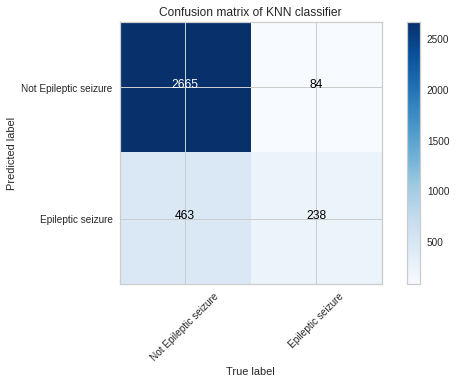

In [ ]:
cm = confusion_matrix(y_test, MLP_predict)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
plot_confusion_matrix(cm, ['Not Epileptic seizure', 'Epileptic seizure'] ,title='Confusion matrix of KNN classifier')

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, MLP_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_MLP_opt = list(precision_recall_fscore_support(y_test, MLP_predict, average='micro'))
micro_MLP_opt.pop(3) # tou support
precision_micro_MLP_opt = micro_MLP_opt[0]
recall_micro_MLP_opt  = micro_MLP_opt[1]
f1_micro_MLP3_opt  = micro_MLP_opt[2]
print(micro_MLP_opt)

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_MLP_opt = list(precision_recall_fscore_support(y_test, MLP_predict, average='macro'))
macro_MLP_opt.pop(3) # tou support
precision_macro_MLP_opt  = macro_MLP_opt[0]
recall_macro_MLP_opt  = macro_MLP_opt [1]
f1_macro_MLP3_opt  = macro_MLP_opt [2]
print(macro_MLP_opt)
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test,  MLP_predict, target_names=['Not Epileptic seizure', 'Epileptic seizure'],output_dict=True)
print(pd.DataFrame(class_report).T)

(array([0.8519821 , 0.73913043]), array([0.96944343, 0.33951498]), array([0.9069253 , 0.46529814]), array([2749,  701])) 

[0.8414492753623188, 0.8414492753623188, 0.8414492753623188]
[0.7955562659846547, 0.6544792062889943, 0.6861117223711701]

All the details shown here:

                       precision    recall  f1-score      support
Not Epileptic seizure   0.851982  0.969443  0.906925  2749.000000
Epileptic seizure       0.739130  0.339515  0.465298   701.000000
accuracy                0.841449  0.841449  0.841449     0.841449
macro avg               0.795556  0.654479  0.686112  3450.000000
weighted avg            0.829052  0.841449  0.817192  3450.000000


In [ ]:
print("MLP classifier f1_micro score = {}".format(f1_micro_MLP3_opt))
print("MLP classifier f1_macro score = {}".format(f1_macro_MLP3_opt))

MLP classifier f1_micro score = 0.8414492753623188
MLP classifier f1_macro score = 0.6861117223711701


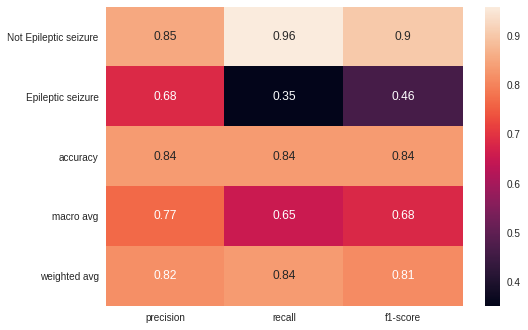

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

In [ ]:
%time MLP_predict =estimator2.predict(X_test)
print("Predictions for KNN classifier:"+"\n"+" {}".format(MLP_predict))

CPU times: user 3.47 ms, sys: 2.93 ms, total: 6.4 ms
Wall time: 8.18 ms
Predictions for KNN classifier:
 [0 0 0 ... 0 0 0]


2635 114 455 246


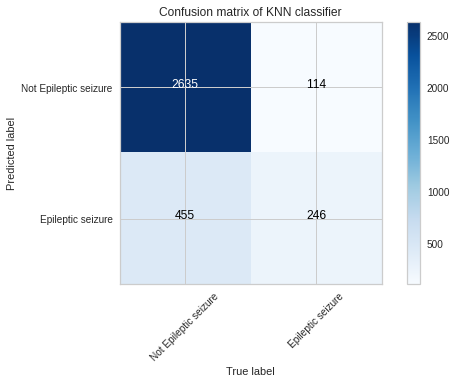

In [ ]:
cm = confusion_matrix(y_test, MLP_predict)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
plot_confusion_matrix(cm, ['Not Epileptic seizure', 'Epileptic seizure'] ,title='Confusion matrix of KNN classifier')

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, MLP_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_MLP_opt = list(precision_recall_fscore_support(y_test, MLP_predict, average='micro'))
micro_MLP_opt.pop(3) # tou support
precision_micro_MLP_opt = micro_MLP_opt[0]
recall_micro_MLP_opt  = micro_MLP_opt[1]
f1_micro_MLP4_opt  = micro_MLP_opt[2]
print(micro_MLP_opt)

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_MLP_opt = list(precision_recall_fscore_support(y_test, MLP_predict, average='macro'))
macro_MLP_opt.pop(3) # tou support
precision_macro_MLP_opt  = macro_MLP_opt[0]
recall_macro_MLP_opt  = macro_MLP_opt [1]
f1_macro_MLP4_opt  = macro_MLP_opt [2]
print(macro_MLP_opt)
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test,  MLP_predict, target_names=['Not Epileptic seizure', 'Epileptic seizure'],output_dict=True)
print(pd.DataFrame(class_report).T)

(array([0.85275081, 0.68333333]), array([0.95853037, 0.35092725]), array([0.90255181, 0.46371348]), array([2749,  701])) 

[0.835072463768116, 0.835072463768116, 0.835072463768116]
[0.768042071197411, 0.654728810736001, 0.6831326423336598]

All the details shown here:

                       precision    recall  f1-score      support
Not Epileptic seizure   0.852751  0.958530  0.902552  2749.000000
Epileptic seizure       0.683333  0.350927  0.463713   701.000000
accuracy                0.835072  0.835072  0.835072     0.835072
macro avg               0.768042  0.654729  0.683133  3450.000000
weighted avg            0.818327  0.835072  0.813385  3450.000000


In [ ]:
print("MLP classifier f1_micro score = {}".format(f1_micro_MLP4_opt))
print("MLP classifier f1_macro score = {}".format(f1_macro_MLP4_opt))

MLP classifier f1_micro score = 0.835072463768116
MLP classifier f1_macro score = 0.6831326423336598


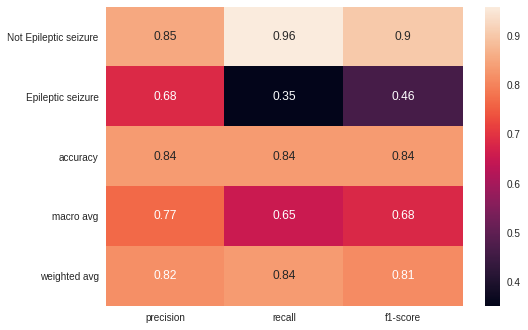

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

Ως προς τους Dummy και Gaussian μπορούμε να θεωρήσουμε ως μοναδική υπερπαράμετρο το PCA, κάνοντας  5-fold cross validation με grid search. Μετατοπίζοντας το πεδίο ορισμού για το PCA προς τα κάτω, όπως υπέδειξε το πρώτο grid search που κάναμε, βλέπουμε ότι και οι δύο ταξιμονητές προτιμούν λίγες διαστάσεις.
Επίσης παρατηρούμε ότι η μέθοδος αυτή βελτίωσε κατά πολύ την απόδοση του Dummy Stratified, ενώ μείωσε ελάχιστα την απόδοση του Gaussian.

###Dummy stratified

In [ ]:
n_components = [10,20,30,40,50]
clf = DummyClassifier(strategy="stratified")

pipe = Pipeline(steps=[('pca', pca), ('Dummy', clf)], memory = 'tmp')
estimator1 = GridSearchCV(pipe, dict(pca__n_components=n_components),refit = True, cv=5, scoring='f1_micro', verbose = 10, n_jobs=-1)
%time estimator1.fit(X_train, y_train)
print("Best parameters regarding f1_micro is = " +str(estimator1.best_params_))
print()

pipe = Pipeline(steps=[('pca', pca), ('Dummy', clf)], memory = 'tmp')
estimator2 = GridSearchCV(pipe, dict(pca__n_components=n_components),refit = True, cv=5, scoring='f1_macro', verbose = 10, n_jobs=-1)
%time estimator2.fit(X_train, y_train)
print("Best parameters regarding f1_macro is = " +str(estimator2.best_params_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.5s finished


CPU times: user 414 ms, sys: 17.9 ms, total: 432 ms
Wall time: 2.63 s
Best parameters regarding f1_micro is = {'pca__n_components': 50}

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0770s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1861s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.8s finished


CPU times: user 471 ms, sys: 119 ms, total: 591 ms
Wall time: 1.18 s
Best parameters regarding f1_macro is = {'pca__n_components': 20}


In [ ]:
%time dc_stratified_predict = estimator.predict(X_test)
print("Predictions for KNN optimal classifier:"+"\n"+" {}".format(dc_stratified_predict))

CPU times: user 3.71 s, sys: 99.3 ms, total: 3.81 s
Wall time: 3.71 s
Predictions for KNN optimal classifier:
 [0 0 0 ... 0 0 0]


2745 4 168 533


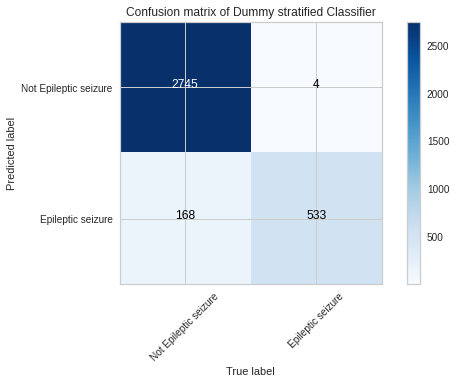

In [ ]:
cm = confusion_matrix(y_test, dc_stratified_predict)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
plot_confusion_matrix(cm, ['Not Epileptic seizure', 'Epileptic seizure'],title='Confusion matrix of Dummy stratified Classifier')

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, dc_stratified_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_dc_stratified_opt = list(precision_recall_fscore_support(y_test, dc_stratified_predict, average='micro'))
micro_dc_stratified_opt.pop(3) # tou support
precision_micro_dc_stratified_opt = micro_dc_stratified_opt[0]
recall_micro_dc_stratified_opt = micro_dc_stratified_opt[1]
f1_micro_dc_stratified_opt = micro_dc_stratified_opt[2]
print(micro_dc_stratified_opt)

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_dc_stratified_opt = list(precision_recall_fscore_support(y_test, dc_stratified_predict, average='macro'))
macro_dc_stratified_opt.pop(3) # tou support
precision_macro_dc_stratified_opt = macro_dc_stratified_opt[0]
recall_macro_dc_stratified_opt = macro_dc_stratified_opt[1]
f1_macro_dc_stratified_opt = macro_dc_stratified_opt[2]
print(macro_dc_stratified_opt)
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test,  dc_stratified_predict, target_names=['Not Epileptic seizure', 'Epileptic seizure'] ,output_dict=True)
print(pd.DataFrame(class_report).T)

(array([0.9423275 , 0.99255121]), array([0.99854493, 0.76034237]), array([0.96962204, 0.86106624]), array([2749,  701])) 

[0.9501449275362319, 0.9501449275362319, 0.9501449275362319]
[0.96743935392682, 0.8794436467365385, 0.915344138772841]

All the details shown here:

                       precision    recall  f1-score      support
Not Epileptic seizure   0.942327  0.998545  0.969622  2749.000000
Epileptic seizure       0.992551  0.760342  0.861066   701.000000
accuracy                0.950145  0.950145  0.950145     0.950145
macro avg               0.967439  0.879444  0.915344  3450.000000
weighted avg            0.952532  0.950145  0.947565  3450.000000


In [ ]:
print("Dummy stratified Classifier f1_micro score = {}".format(f1_micro_dc_stratified_opt))
print("Dummy stratified Classifier f1_macro score = {}".format(f1_macro_dc_stratified_opt))

Dummy stratified Classifier f1_micro score = 0.9501449275362319
Dummy stratified Classifier f1_macro score = 0.915344138772841


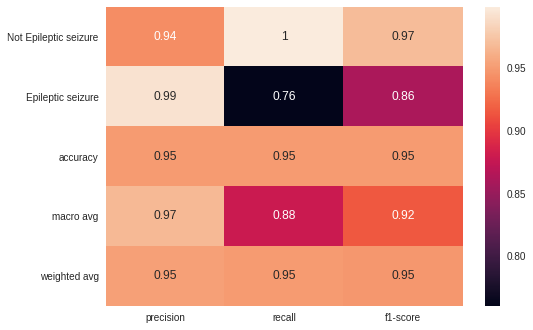

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

###Gaussian NB

In [ ]:
n_components = [10,20,30,40,50]
clf = GaussianNB()

pipe = Pipeline(steps=[('pca', pca), ('GNB', clf)], memory = 'tmp')
estimator1 = GridSearchCV(pipe, dict(pca__n_components=n_components),refit = True, cv=5, scoring='f1_micro', verbose = 10, n_jobs=-1)
%time estimator1.fit(X_train, y_train)
print("Best parameters regarding f1_micro is = " +str(estimator1.best_params_))
print()

pipe = Pipeline(steps=[('pca', pca), ('GNB', clf)], memory = 'tmp')
estimator2 = GridSearchCV(pipe, dict(pca__n_components=n_components),refit = True, cv=5, scoring='f1_macro', verbose = 10, n_jobs=-1)
%time estimator2.fit(X_train, y_train)
print("Best parameters regarding f1_macro is = " +str(estimator2.best_params_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1007s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    0.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.0s finished


CPU times: user 136 ms, sys: 31.1 ms, total: 167 ms
Wall time: 1.12 s
Best parameters regarding f1_micro is = {'pca__n_components': 20}

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0857s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1970s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s


CPU times: user 132 ms, sys: 11.2 ms, total: 143 ms
Wall time: 1.11 s
Best parameters regarding f1_macro is = {'pca__n_components': 20}


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.0s finished


In [ ]:
%time GaussianNB_predict = estimator.predict(X_test)
print("Predictions for KNN optimal classifier:"+"\n"+" {}".format(GaussianNB_predict))

CPU times: user 3.66 s, sys: 93 ms, total: 3.76 s
Wall time: 3.67 s
Predictions for KNN optimal classifier:
 [0 0 0 ... 0 0 0]


2745 4 168 533


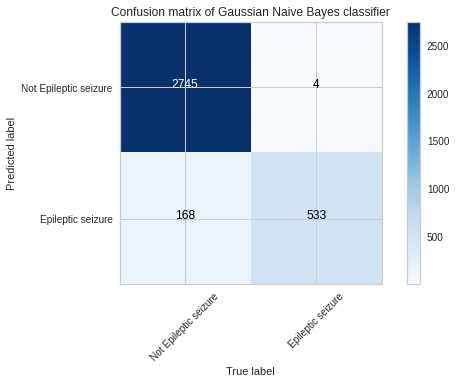

In [ ]:
cm = confusion_matrix(y_test,GaussianNB_predict)
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
plot_confusion_matrix(cm, ['Not Epileptic seizure', 'Epileptic seizure'] ,title='Confusion matrix of Gaussian Naive Bayes classifier')

In [ ]:
# εκτυπώνουμε 4 πίνακες, precision, recall, F1 και support. Support είναι ο συνολικός αριθμός προβλέψεων σε κάθε κλάση
# το πρώτο στοιχείο του κάθε πίνακα είναι η κλάση bad, το δεύτερο η good
print(precision_recall_fscore_support(y_test, GaussianNB_predict, average=None), "\n")

# εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων) τα δείγματα (average = micro).
micro_GNB_opt = list(precision_recall_fscore_support(y_test, GaussianNB_predict, average='micro'))
micro_GNB_opt.pop(3) # tou support
precision_micro_GNB_opt = micro_GNB_opt[0]
recall_micro_GNB_opt = micro_GNB_opt[1]
f1_micro_GNB_opt = micro_GNB_opt[2]
print(micro_GNB_opt)

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_GNB_opt = list(precision_recall_fscore_support(y_test, GaussianNB_predict, average='macro'))
macro_GNB_opt.pop(3) # tou support
precision_macro_GNB_opt = macro_GNB_opt[0]
recall_macro_GNB_opt = macro_GNB_opt[1]
f1_macro_GNB_opt = macro_GNB_opt[2]
print(macro_GNB_opt)
print()
print("All the details shown here:")
print()
class_report = classification_report(y_test,  GaussianNB_predict, target_names=['Not Epileptic seizure', 'Epileptic seizure'] ,output_dict=True)
print(pd.DataFrame(class_report).T)

(array([0.9423275 , 0.99255121]), array([0.99854493, 0.76034237]), array([0.96962204, 0.86106624]), array([2749,  701])) 

[0.9501449275362319, 0.9501449275362319, 0.9501449275362319]
[0.96743935392682, 0.8794436467365385, 0.915344138772841]

All the details shown here:

                       precision    recall  f1-score      support
Not Epileptic seizure   0.942327  0.998545  0.969622  2749.000000
Epileptic seizure       0.992551  0.760342  0.861066   701.000000
accuracy                0.950145  0.950145  0.950145     0.950145
macro avg               0.967439  0.879444  0.915344  3450.000000
weighted avg            0.952532  0.950145  0.947565  3450.000000


In [ ]:
print("Gaussian Naive Bayes classifier f1_micro score = {}".format(f1_micro_GNB_opt))
print("Gaussian Naive Bayes classifier f1_macro score = {}".format(f1_macro_GNB_opt))

Gaussian Naive Bayes classifier f1_micro score = 0.9501449275362319
Gaussian Naive Bayes classifier f1_macro score = 0.915344138772841


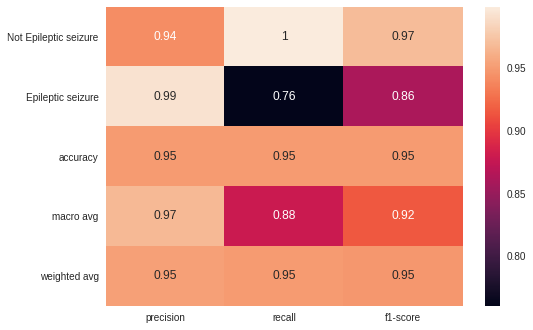

In [ ]:
# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True);
#sns.heatmap(pd.DataFrame(class_report).T, annot=True);

###Σύγκριση Ταξινομητών

Παρακάτω βλέπουμε τις γραφικές απεικονίσεις της απόδοσης των 5 ταξινομητών με grid search και 5-fold cross validation και για τις δύο μετρικές. Λεπτομέρειες σύγκρισης ταξινομητών, σχόλια για χρόνους και παρατηρήσεις, με και χωρίς grid search, αναφέραμε αναλυτικά και παραπάνω, ενδιάμεσα του κώδικα αλλά αναφέρουμε ως συγκεντρωτικό συμπέρασμα ότι πάλι ο SVM έχει την καλύτερη απόδοση και ο Gaussian και kNN διατηρούν τις αποδόσεις τους με ελάχιστες αποκλίσες.
Σημαντική αύξηση παρουσιάζει ο Dummy Stratified, ενώ αρκετά χειρότερη απόδοση σε σχέση με την default αρχικοποίηση έχει ο MLP (που είναι και ο χειρότερος από όλους σε αυτό το βήμα), το οποίο όπως αναλύσαμε και παραπάνω οφείλεται στο γεγονός ότι ζητείται να χρησιμοποιήσουμε μόνο ένα hidden layer στη βελτιστοποίηση, γεγονός που δυσκολεύει την ταξινόμηση non-linear δεδομένων.

Κλείνοντας, ως προς τους χρόνους, όπως παρατηρήσαμε και παραπάνω, εξαιρώντας τον Gaussian και τον Stratified που ουσιαστικά δεν έχουν υπερπαραμέτρους (πέραν του PCA)οπότε είναι πολύ γρήγοροι, τον λιγότερο χρόνο έκανε ο kNN, έπειτα ο SVM και τέλος ο MLP. Αυτό, προφανώς εξαρτάται από το πλήθος των υπερπαραμέτρων, το μέγεθος του πεδίου ορισμού τους και της πολυπλοκότητας του κάθε αλγορίθμου.
Το πλήθος των folds προφανώς επηρεάζει το χρόνο σε όλες τις περιπτώσεις. 

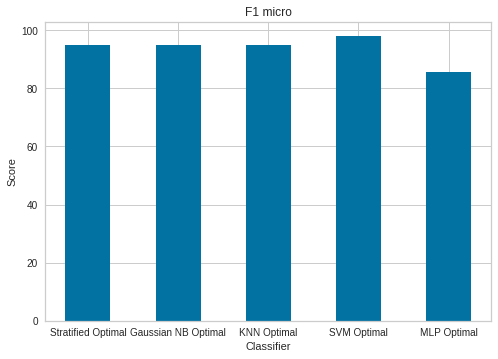

In [ ]:
fig = plt.figure()
x = ['Stratified Optimal','Gaussian NB Optimal','KNN Optimal','SVM Optimal','MLP Optimal']
y=[100*f1_micro_dc_stratified_opt,100*f1_micro_GNB_opt,100*f1_micro_KNN_opt,100*f1_micro_SVC3_opt,100*f1_micro_MLP1_opt]
plt.bar(x,y, align='center', width=0.5)
plt.xticks(x,x)
plt.title('F1 micro')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.show()

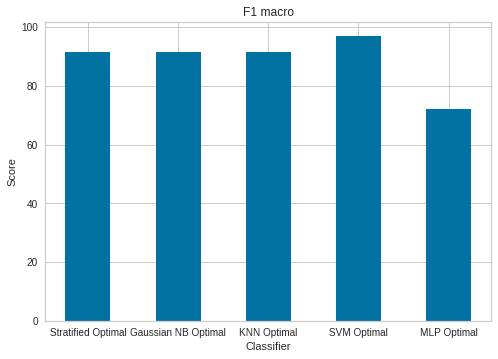

In [ ]:
fig = plt.figure()
x = ['Stratified Optimal','Gaussian NB Optimal','KNN Optimal','SVM Optimal','MLP Optimal']
y=[100*f1_macro_dc_stratified_opt,100*f1_macro_GNB_opt,100*f1_macro_KNN_opt,100*f1_macro_SVC4_opt,100*f1_macro_MLP2_opt]
plt.bar(x,y, align='center', width=0.5)
plt.xticks(x,x)
plt.title('F1 macro')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.show()